# Overview

This notebook contains my solutions for **<a href="https://adventofcode.com/2024" target="_blank">Advent of Code 2024</a>**.

A few notes...
- The source for this notebook source lives in my GitHub repo, <a href="https://github.com/derailed-dash/Advent-of-Code/blob/master/src/AoC_2024/Dazbo's_Advent_of_Code_2024.ipynb" target="_blank">here</a>.
- You can run this Notebook wherever you like. For example, you could...
  - Run it locally, in your own Jupyter environment.
  - Run it in a cloud-based Jupyter environment, with no setup required on your part!  For example, with **Google Colab**: <br><br><a href="https://colab.research.google.com/github/derailed-dash/Advent-of-Code/blob/master/src/AoC_2024/Dazbo's_Advent_of_Code_2024.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Google Colab"/></a><br>
  - For more ways to run Jupyter Notebooks, check out [my guide](https://medium.com/python-in-plain-english/five-ways-to-run-jupyter-labs-and-notebooks-23209f71e5c0).
- **To run the notebook, execute the cells in the [Setup](#Setup) section, as described below. Then you can run the code for any given day.**
- Be mindful that the first time you run this notebook, you will need to **obtain your AoC session key** and store it, if you have not done so already. This allows the notebook to automatically retrieve your input data. (See the guidance in the **[Get Access to Your AoC Data](#Get-Access-to-Your-AoC-Data)** section for details.)
- Use the navigation menu on the left to jump to any particular day.
- All of my AoC solutions are documented in my <a href="https://aoc.just2good.co.uk/" target="_blank">AoC Python Walkthrough site</a>.

# Setup

You need to run all cells in this section, before running any particular day solution.

## Packages and Imports

### Core Imports

In [1]:
# Python core imports
from __future__ import annotations
import subprocess
from concurrent.futures import ProcessPoolExecutor
import ast
import copy
import heapq
import logging
import math
import operator
import os
import platform
import re
from collections import Counter, deque, defaultdict
from dataclasses import asdict, dataclass, field
from enum import Enum, auto
from functools import cache, lru_cache, reduce
from itertools import combinations, count, cycle, permutations, product, groupby
from getpass import getpass
from numbers import Number
from pathlib import Path
from typing import NamedTuple, ClassVar, Iterator, Iterable

### Install Packages

Here we use `pip` or `conda` to install the packages used by my solutions in this event. After installing the packages, you may need to restart your Jupyter kernel in order for the packages to be detected and remove any linting errors.

### Using Conda

You don't have to use Conda! But it has some advantages. If you want to use Conda to manage packages and don't have it installed, you can [Install Miniconda](https://docs.anaconda.com/miniconda/install/#quick-command-line-install), and then:

```bash
# Create and activate a conda environment
conda create --name aoc-conda-env
conda activate aoc-conda-env

# Install some base packages
conda install python jupyter jupyterlab ipykernel ipython ipywidgets pexpect pygments
```

Now reload this notebook and set its kernel to the `aoc-conda-env` you just created. And you're good to go!

In [2]:
def is_connected():
    """Check for an active internet connection."""
    try:
        subprocess.run(['ping', '-c', '1', '8.8.8.8'], check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        return True
    except subprocess.CalledProcessError:
        return False
    
def is_conda_available():
    try:
        # Check if conda is installed
        result = subprocess.run(['conda', '--version'], check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        print(result.stdout.decode().strip())  # Print the conda version
        return True
    except FileNotFoundError:
        return False

### Install External Dependencies

Install required OS packages. These cannot be installed with pip. BUT they _can_ be installed with Conda. So we only need to install using a shell command if we're not using Conda.

- [ffmpeg](https://ffmpeg.org/): in order to render video output, i.e. for visualisations.
- graphviz: for visualising graphs

In Linux, you may need to install packages manually, as the notebook will often not have necessary permissions to install dependenct packages. E.g.

```bash
sudo apt install ffmpeg
```

In [3]:
def run_command(command):
    """Run a shell command and print its output in real-time."""
    process = subprocess.Popen(
        command, 
        shell=True, 
        stdout=subprocess.PIPE, 
        stderr=subprocess.PIPE
    )
    
    # Read and print the output line by line
    if process.stdout is not None:
        for line in iter(process.stdout.readline, b''):
            print(line.decode().strip())
        process.stdout.close()
        
    process.wait()
    
def install_software(appname: str):
    os_name = platform.system()
    print(f"Installing {appname} on {os_name}...")
    
    # Mapping operating systems to their respective installation commands
    command_map = {
        "Windows": f"winget install {appname} --silent --no-upgrade",
        "Linux": f"sudo apt -qq -y install {appname}",
        "Darwin": f"brew install {appname}"
    }
    command = command_map.get(os_name)
    if command:
        run_command(command)
    else:
        print(f"Unsupported operating system: {os_name}")

def check_installed(app_exec: str) -> bool:    
    appname, *arg = app_exec.split()
    arg = " ".join(arg)
    print(f"Checking if {appname} is installed")
    
    try:
        output = subprocess.check_output([appname, arg], stderr=subprocess.STDOUT)
        print(f"{appname} version: {output.decode().strip()}")
        print(f"{appname} is already installed.")
        return True
    except (subprocess.CalledProcessError, FileNotFoundError):
        print(f"{appname} is not installed or absent from path.")
        
    return False

apps = [ ("ffmpeg", "ffmpeg -version"),
         ("graphviz", "dot --version") ]

if is_connected():
    for app_install, app_exec in apps:
        if not check_installed(app_exec):
            if not is_conda_available():
                # No Conda, so install manually
                install_software(app_install)

Checking if ffmpeg is installed
ffmpeg version: ffmpeg version 7.0.1 Copyright (c) 2000-2024 the FFmpeg developers
built with gcc 12.3.0 (conda-forge gcc 12.3.0-7)
configuration: --prefix=/home/darren/miniconda3/envs/aoc-conda-env --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1716729489913/_build_env/bin/x86_64-conda-linux-gnu-cc --cxx=/home/conda/feedstock_root/build_artifacts/ffmpeg_1716729489913/_build_env/bin/x86_64-conda-linux-gnu-c++ --nm=/home/conda/feedstock_root/build_artifacts/ffmpeg_1716729489913/_build_env/bin/x86_64-conda-linux-gnu-nm --ar=/home/conda/feedstock_root/build_artifacts/ffmpeg_1716729489913/_build_env/bin/x86_64-conda-linux-gnu-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libharfbuzz --enable-libfontconfig --enable-libopenh264 --enable-libdav1d --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-libass --enable-pthreads --enable-vaapi --enable-libopenvino --enable-gpl --enable

In [4]:
if is_connected():
    # Install packages with Conda that are often problematic with pip
    if is_conda_available():
        print("Installing with Conda...")
        %conda install -y -c conda-forge -c default \
                jupyterlab-lsp ipykernel ipywidgets \
                matplotlib pandas networkx sympy scipy \
                colorama python-dotenv tqdm \
                python-graphviz ffmpeg # Conda-only installs
    else:
        print("Conda not installed. Installing with pip...")
        %pip install --upgrade --no-cache-dir \
                jupyterlab-lsp ipykernel ipywidgets \
                matplotlib pandas networkx sympy scipy \
                colorama python-dotenv tqdm \
                python-graphviz
    
    print("Installing with pip...")
    %pip install dazbo-commons # Pip-only installs
else:
    print("Poor connectivity. Run when you're connected.")

conda 24.11.2
Installing with Conda...
Channels:
 - conda-forge
 - default
 - defaults
Platform: linux-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Installing with pip...
Note: you may need to restart the kernel to use updated packages.


### 3rd Party Imports

In [5]:
import dazbo_commons as dc  # my own utility library, which includes things like coloured logging
import graphviz
import requests
import sympy
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle, Polygon
import networkx as nx
import numpy as np
import pandas as pd
from colorama import Fore, Back, Style
from dotenv import load_dotenv
from IPython.core.display import Markdown
from IPython.display import display, Video, Image
from tqdm.notebook import tqdm

## Optional Restart

If you've just installed any new packages, now would be a good time to restart the kernel!

## Logging and Output

Set up a new logger that uses `ColouredFormatter`, such that we have coloured logging.  The log colour depends on the logging level.

In [6]:
# Setup logger
YEAR = 2024
APP_NAME = "aoc" + str(YEAR)
logger = dc.retrieve_console_logger(APP_NAME)
logger.setLevel(logging.DEBUG)
logger.info("Logger initialised.")
logger.debug("Debugging enabled")

12:27:19.995:aoc2024 - INF: Logger initialised.
12:27:19.996:aoc2024 - DBG: Debugging enabled


## Load Helpers and Useful Classes

Now we load a bunch of helper functions and classes.

### Locations

Where any input and output files get stored.

<img src="https://aoc.just2good.co.uk/assets/images/notebook-content-screenshot.png" width="320" />

### Retrieve the Input Data

This works by using your unique session cookie to retrieve your input data. E.g. from a URL like:

`https://adventofcode.com/2024/day/1/input`

You can find your session cookie by opening developer tools in your browser, and finding it here:

<img src="https://aoc.just2good.co.uk/assets/images/session_cookie.png" width="420" />

In [7]:
##################################################################
# Retrieving input data
##################################################################

def write_puzzle_input_file(year: int, day, locations: dc.Locations):
    """ Use session key to obtain user's unique data for this year and day.
    Only retrieve if the input file does not already exist.
    Return True if successful.
    Requires env: AOC_SESSION_COOKIE, which can be set from the .env.
    """
    if os.path.exists(locations.input_file):
        logger.debug("%s already exists", os.path.basename(locations.input_file))
        return os.path.basename(locations.input_file)

    session_cookie = os.getenv('AOC_SESSION_COOKIE')
    if not session_cookie:
        raise ValueError("Could not retrieve session cookie.")

    logger.info('Session cookie retrieved: %s...%s', session_cookie[0:6], session_cookie[-6:])

    # Create input folder, if it doesn't exist
    if not locations.input_dir.exists():
        locations.input_dir.mkdir(parents=True, exist_ok=True)

    url = f"https://adventofcode.com/{year}/day/{day}/input"
    
    # Don't think we need to set a user-agent
    # headers = {
    #     "User-Agent": 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'
    # }
    cookies = { 
        "session": session_cookie
    }
    response = requests.get(url, cookies=cookies, timeout=5)

    data = ""
    if response.status_code == 200:
        data = response.text

        with open(locations.input_file, 'w') as file:
            logger.debug("Writing input file %s", os.path.basename(locations.input_file))
            file.write(data)
            return data
    else:
        raise ValueError(f"Unable to retrieve input data.\n" +
                         f"HTTP response: {response.status_code}\n" +
                         f"{response.reason}: {response.content.decode('utf-8').strip()}")
        
def show_day_link(day):
    day_link = f"#### See [Day {day}](https://adventofcode.com/{YEAR}/day/{day})."
    display(Markdown(day_link))


### Testing

A really simple function for testing that our solution produces the expected test output. If the `validate()` call fails, then execution will stop.

In [8]:
def validate(test, answer):
    """
    Args:
        test: the answer given by our solution
        answer: the expected answer, e.g. from instructions
    """
    if test != answer:
        raise AssertionError(f"{test} != {answer}")

### Useful Helper Classes

In [9]:
#################################################################
# POINTS, VECTORS AND GRIDS
#################################################################

Point = NamedTuple("Point", [("x", Number), ("y", Number)])

Point.__add__ = lambda self, other: Point(self.x + other.x, self.y + other.y)
Point.__sub__ = lambda self, other: Point(self.x - other.x, self.y - other.y)
Point.__mul__ = lambda self, scalar: Point(self.x * scalar, self.y * scalar)
Point.__rmul__ = lambda self, scalar: self * scalar # for when int comes first

def yield_neighbours(self, include_diagonals=True, include_self=False):
    """ Generator to yield neighbouring Points """

    deltas: list
    if not include_diagonals:
        deltas = [vector.value for vector in Vectors if abs(vector.value.x) != abs(vector.value.y)]
    else:
        deltas = [vector.value for vector in Vectors]

    if include_self:
        deltas.append(Point(0, 0))

    for delta in deltas:
        yield self + delta

def valid_neighbours(self, include_diagonals=True, include_self=False) -> list[Point]:
    return list(yield_neighbours(self, include_diagonals, include_self))

def get_specific_neighbours(self, directions) -> list[Point]:
    return [self + vector.value for vector in list(directions)]

def manhattan_distance(a_point: Point):
    return abs(a_point.x) + abs(a_point.y)

def manhattan_distance_from(self, other):
    diff = self - other
    return manhattan_distance(diff)

Point.yield_neighbours = yield_neighbours
Point.neighbours = valid_neighbours
Point.get_specific_neighbours = get_specific_neighbours
Point.manhattan_distance = staticmethod(manhattan_distance)
Point.manhattan_distance_from = manhattan_distance_from
Point.__repr__ = lambda self: f"P({self.x},{self.y})" 

class Vectors(Enum):
    """ Enumeration of 8 directions.
    Note: y axis increments in the North direction, i.e. N = (0, 1) """
    N = Point(0, 1)
    NE = Point(1, 1)
    E = Point(1, 0)
    SE = Point(1, -1)
    S = Point(0, -1)
    SW = Point(-1, -1)
    W = Point(-1, 0)
    NW = Point(-1, 1)

    @property
    def y_inverted(self):
        """ Return vector, but with y-axis inverted. I.e. N = (0, -1) """
        x, y = self.value
        return Point(x, -y)

class VectorDicts():
    """ Contains constants for Vectors """
    ARROWS = {
        '^': Vectors.N.value,
        '>': Vectors.E.value,
        'v': Vectors.S.value,
        '<': Vectors.W.value
    }

    DIRS = {
        'U': Vectors.N.value,
        'R': Vectors.E.value,
        'D': Vectors.S.value,
        'L': Vectors.W.value
    }

    NINE_BOX: dict[str, tuple[int, int]] = {
        # x, y vector for adjacent locations
        'tr': (1, 1),
        'mr': (1, 0),
        'br': (1, -1),
        'bm': (0, -1),
        'bl': (-1, -1),
        'ml': (-1, 0),
        'tl': (-1, 1),
        'tm': (0, 1)
    }

class Grid():
    """ 2D grid of point values. """
    def __init__(self, grid_array: list) -> None:
        self._array = [list(row) for row in grid_array.copy()]
        self._width = len(self._array[0])
        self._height = len(self._array)
        
        self._all_points = [Point(x,y) for y in range(self._height) for x in range(self._width)]

    def value_at_point(self, point: Point):
        """ The value at this point """
        return self._array[point.y][point.x]

    def set_value_at_point(self, point: Point, value):
        self._array[point.y][point.x] = value

    def find_points_with_value(self, value) -> list[Point]:
        """ Return the list of points that have the specified value """
        return [point for point in self._all_points if self.value_at_point(point) == value]
        
    def valid_location(self, point: Point) -> bool:
        """ Check if a location is within the grid """
        if (0 <= point.x < self._width and  0 <= point.y < self._height):
            return True

        return False

    @property
    def width(self):
        """ Array width (cols) """
        return self._width

    @property
    def height(self):
        """ Array height (rows) """
        return self._height

    def all_points(self) -> list[Point]:
        return self._all_points

    @property
    def cols(self):
        """ Return the grid as columns """
        return list(zip(*self._array))

    def rows_as_str(self):
        """ Return the grid """
        return ["".join(str(char) for char in row) for row in self._array]

    def cols_as_str(self):
        """ Render columns as str. Returns: list of str """
        return ["".join(str(char) for char in col) for col in self.cols]

    def __repr__(self) -> str:
        return f"Grid(size={self.width}*{self.height})"

    def __str__(self) -> str:
        return "\n".join("".join(map(str, row)) for row in self._array)


### Useful Helper Functions

In [10]:
#################################################################
# CONSOLE STUFF
#################################################################

def cls():
    """ Clear console """
    os.system('cls' if os.name=='nt' else 'clear')

#################################################################
# USEFUL FUNCTIONS
#################################################################

def binary_search(target, low:int, high:int, func, *func_args, reverse_search=False):
    """ Generic binary search function that takes a target to find,
    low and high values to start with, and a function to run, plus its args.
    Implicitly returns None if the search is exceeded. """

    res = None  # just set it to something that isn't the target
    candidate = 0  # initialise; we'll set it to the mid point in a second

    while low < high:  # search exceeded
        candidate = int((low+high) // 2)  # pick mid-point of our low and high
        res = func(candidate, *func_args) # run our function, whatever it is
        logger.debug("%d -> %d", candidate, res)
        if res == target:
            return candidate  # solution found

        comp = operator.lt if not reverse_search else operator.gt
        if comp(res, target):
            low = candidate
        else:
            high = candidate

def merge_intervals(intervals: list[list]) -> list[list]:
    """ Takes intervals in the form [[a, b][c, d][d, e]...]
    Intervals can overlap.  Compresses to minimum number of non-overlapping intervals. """
    intervals.sort()
    stack = []
    stack.append(intervals[0])

    for interval in intervals[1:]:
        # Check for overlapping interval
        if stack[-1][0] <= interval[0] <= stack[-1][-1]:
            stack[-1][-1] = max(stack[-1][-1], interval[-1])
        else:
            stack.append(interval)

    return stack

@cache
def get_factors(num: int) -> set[int]:
    """ Gets the factors for a given number. Returns a set[int] of factors.
        # E.g. when num=8, factors will be 1, 2, 4, 8 """
    factors = set()

    # Iterate from 1 to sqrt of 8,
    # since a larger factor of num must be a multiple of a smaller factor already checked
    for i in range(1, int(num**0.5) + 1):  # e.g. with num=8, this is range(1, 3)
        if num % i == 0: # if it is a factor, then dividing num by it will yield no remainder
            factors.add(i)  # e.g. 1, 2
            factors.add(num//i)  # i.e. 8//1 = 8, 8//2 = 4

    return factors

def to_base_n(number: int, base: int):
    """ Convert any integer number into a base-n string representation of that number.
    E.g. to_base_n(38, 5) = 123

    Args:
        number (int): The number to convert
        base (int): The base to apply

    Returns:
        [str]: The string representation of the number
    """
    ret_str = ""
    curr_num = number
    while curr_num:
        ret_str = str(curr_num % base) + ret_str
        curr_num //= base

    return ret_str if number > 0 else "0"


# Env Clear

Only run the next cell if you want to manually clear your session key.

In [ ]:
del os.environ['AOC_SESSION_COOKIE']

# Days

Here you'll find a template to build a solution for a given day, and then the solutions for all days in this event.

To copy the template day, select all the cells in the `Day n` template, add a new cell at the end, and then paste the cells there.

---
## Day 1: Historian Hysteria

Comparing, sorting and zipping lists.

In [ ]:
DAY = "1" # replace with actual number (without leading digit)
show_day_link(DAY)

In [ ]:
d_name = "d" + str(DAY).zfill(2) # e.g. d01
script_name = "aoc" + str(YEAR) + d_name # e.g. aoc2024d01
locations = dc.get_locations(d_name)
logger.setLevel(logging.DEBUG)

# Retrieve input and store in local file
try:
    write_puzzle_input_file(YEAR, DAY, locations)
    with open(locations.input_file, mode="rt") as f:
        input_data = f.read().splitlines()

    logger.info("Input data:\n%s", dc.top_and_tail(input_data))
except ValueError as e:
    logger.error(e)

### Day 1 Part 1

We're told: historically significant locations are listed by a unique number called the location ID. The Historians have split into two groups, and each group has created their own list of locations.

Our puzzle input is the two lists; i.e. presented as two columns of numbers. We need to reconcile the differences. E.g.

```text
3   4
4   3
2   5
1   3
3   9
3   3
```

Goal:

- Pair the smallest number in the two lists, and measure the difference.
- Then the second smallest number from each list, and so on.
- Return the sum of differences.

**What is the total distance between your lists?**

#### Solution Approach

1. Build two lists by splitting each line into two numbers. We can easily do this by [reading each line](https://aoc.just2good.co.uk/python/reading_files), and calling the `split()` function, which automatically splits on the whitespace between the numbers. For each row, we now end up with two numbers, but returned as string values. So we use [map()](https://aoc.just2good.co.uk/python/map-filter-reduce) to turn the strings into integer types. Now we have a pair of integer numbers for each line, which we wrap in a tuple and return in a [list comprehension](https://aoc.just2good.co.uk/python/comprehensions). I.e. one list containing tuples, which are each a pair of integers. Finally, we use the [zip()](https://aoc.just2good.co.uk/python/zip) function to turn the list of tuples pairs into a pair of lists: one list for left column, and one list for the right column.
1. Sort the two lists, such that the smallest number in each column comes first, and so on.
1. Find the absolute difference between each pair of numbers, and sum these differences.

In [15]:
@cache
def process_data(data) -> tuple[list[int], list[int]]:
    items = [tuple(map(int, line.split())) for line in data] # returns list of tuples, e.g. [(3, 5), ...]
    list1, list2 = zip(*items) # list of all lefts, plus list of all rights
    return sorted(list1), sorted(list2)

def solve_part1(data) -> int:
    list1, list2 = process_data(tuple(data))
    
    diff = 0
    for item1, item2 in zip(list1, list2):
        diff += abs(item2 - item1)
        
    return diff

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
3   4
4   3
2   5
1   3
3   9
3   3
""")
sample_answers = [11]

for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part1(curr_input.splitlines()), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

soln = solve_part1(input_data)
logger.info(f"Part 1 soln={soln}")

### Day 1 Part 2

Figure out exactly how often each number from the left list appears in the right list. Calculate a total similarity score by adding up each number in the left list after multiplying it by the number of times that number appears in the right list.

**What is their similarity score?**

#### Solution Approach

1. For each item in list1, count how many times it appears in list2.
1. Add the product of the item and the count to our score.


In [17]:
def solve_part2(data):
    list1, list2 = process_data(tuple(data))
    
    score = 0
    for item in list1:
        item_count = list2.count(item)
        score += item * item_count
        
    return score

In [ ]:
%%time

sample_answers = [31]

for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part2(curr_input.splitlines()), curr_ans) # test with sample data
    logger.info("Test passed")    

logger.info("Tests passed!")

soln = solve_part2(input_data)
logger.info(f"Part 2 soln={soln}")

---
## Day 2: Red-Nosed Reports

Comparing the diffs between values in a list. And using Python `all`.

In [ ]:
DAY = "2" # replace with actual number (without leading digit)
show_day_link(DAY)

In [ ]:
d_name = "d" + str(DAY).zfill(2) # e.g. d01
script_name = "aoc" + str(YEAR) + d_name # e.g. aoc2024d01
locations = dc.get_locations(d_name)
logger.setLevel(logging.DEBUG)

# Retrieve input and store in local file
try:
    write_puzzle_input_file(YEAR, DAY, locations)
    with open(locations.input_file, mode="rt") as f:
        input_data = f.read().splitlines()

    logger.info("Input data:\n%s", dc.top_and_tail(input_data))
except ValueError as e:
    logger.error(e)

### Day 2 Part 1

Our data is a set of reports. Each line is one report. Each report contains a list of numbers called levels. Like this:

```text
7 6 4 2 1
1 2 7 8 9
9 7 6 2 1
1 3 2 4 5
8 6 4 4 1
1 3 6 7 9
```

Reports are safe if:

- The levels are either all increasing or all decreasing
- And any two adjacent levels must differ by at least 1 and at most 3.

**How many reports are safe?**

#### Solution Approach

- Split each record into a list of int values, called `levels`.
- Create `is_safe()` function which:
  - Creates a list of difference values - called `diffs` - by subtracting `levels` with offset 1 from `levels`.
  - Then, use the `all` iterator operator function to check if our condition is true for every diff in `diffs`.
  - The condition is: that every diff is positive and `<=MAX_DIFF` \
    OR every diff is negative and `>=MAX_DIFF`.

In [164]:
def is_safe(levels: list[int], max_diff: int) -> bool:
    """ Determine if a record - i.e. a list of levels - is safe.
    Do this by determining the differences between each level in the record.
    Check if the differences are all positive and within the max, 
    or all negative and within the max. """
    
    # Create pairs of levels from successive levels
    # For each pair, substract second from first to get the difference
    diffs = [first-second for first, second in zip(levels, levels[1:])]
    
    return (all(0 < diff <= max_diff for diff in diffs) or 
            all(-max_diff <= diff < 0 for diff in diffs))

def solve_part1(data):
    safe_count = 0
    for report in data:
        levels = list(map(int, report.split()))
        if is_safe(levels, 3):
            safe_count += 1
    
    return safe_count

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
7 6 4 2 1
1 2 7 8 9
9 7 6 2 1
1 3 2 4 5
8 6 4 4 1
1 3 6 7 9""")
sample_answers = [2]

for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part1(curr_input.splitlines()), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

soln = solve_part1(input_data)
logger.info(f"Part 1 soln={soln}")

### Day 2 Part 2

We now have a _Problem Dampener_, which means we can tolerate a single bad level in any given record.

So we must try removing levels from records, and then testing if the report is safe.

**How many reports are now safe?**

#### Solution Approach

Same as before, but this time we will iterate through the index values of each record, and remove that level from the record. I.e.

- Loop through each index value for the record.
- For the current index value, concatenate the levels up to this index with the levels after this index. Thus, we always end up with a list that is one shorter than the original list. (Note that trimming off the first or last level will never make a safe record _unsafe_.)
- Pass shortened list to our `is_safe()` function.
- If the shortened record is safe, then we can add this record to our counter and move on to the next record.

In [166]:
def solve_part2(data):
    safe_count = 0
    for report in data:
        levels = list(map(int, report.split()))

        # Slice out one level at a time, and check if the new record is safe
        for idx in range(len(levels)):
            # Take levels up this idx, and concatenate with levels AFTER this idx
            trimmed_levels = levels[:idx] + levels[idx+1:]
            if is_safe(trimmed_levels, 3):
                safe_count += 1
                break
    
    return safe_count

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
7 6 4 2 1
1 2 7 8 9
9 7 6 2 1
1 3 2 4 5
8 6 4 4 1
1 3 6 7 9""")
sample_answers = [4]

for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part2(curr_input.splitlines()), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("Tests passed!")

soln = solve_part2(input_data)
logger.info(f"Part 2 soln={soln}")

---
## Day 3: Mull It Over

Examing instructions in a long line, using regex with capture groups.

In [ ]:
DAY = "3" # replace with actual number (without leading digit)
show_day_link(DAY)

In [ ]:
d_name = "d" + str(DAY).zfill(2) # e.g. d01
script_name = "aoc" + str(YEAR) + d_name # e.g. aoc2024d01
locations = dc.get_locations(d_name)
logger.setLevel(logging.DEBUG)

# Retrieve input and store in local file
try:
    write_puzzle_input_file(YEAR, DAY, locations)
    with open(locations.input_file, mode="rt") as f:
        input_data = f.read()

    logger.info("Input data:\n%s", dc.top_and_tail(input_data))
except ValueError as e:
    logger.error(e)

### Day 3 Part 1

A shop computer is trying to run a program, but its memory - the puzzle input - is corrupted.

Here is an example:

```text
xmul(2,4)%&mul[3,7]!@^do_not_mul(5,5)+mul(32,64]then(mul(11,8)mul(8,5))
```

It should be doing instructions like:

- `mul(X,Y)` where `X` and `Y` are 1-3 digit numbers.

Our instructions:

- There are many invalid characters which should be ignored.
- If an invalid character is part of a `mul()` instruction, then the whole instruction does nothing.
- Scan the corrupted memory for uncorrupted mul instructions.

**What do you get if you add up all of the results of the multiplications?**

#### Solution Approach

We can just use [regex](https://aoc.just2good.co.uk/python/regex).

- Use a regex pattern to identify substrings that match the required input format.
- Use the regex `finditer()` to retrieve all non-overlapping matches.
- The `matches.groups()` retrieves the captured groups, i.e. the digits themselves. We identify capture groups by placing each digit in brackets in the pattern string.
- Then, multiply the two digits together, as required.

In [170]:
def solve_part1(data):
    # match all "mul(x,y)"
    matches = re.finditer(r"mul\((\d{1,3}),(\d{1,3})\)", data)
    
    ans = 0
    for match in matches:
        val_x, val_y = match.groups()
        ans += int(val_x)*int(val_y)
        
    return ans


In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""xmul(2,4)%&mul[3,7]!@^do_not_mul(5,5)+mul(32,64]then(mul(11,8)mul(8,5))""")
sample_answers = [161]

for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part1(curr_input), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

soln = solve_part1(input_data)
logger.info(f"Part 1 soln={soln}")

### Day 3 Part 2

Now we also want to handle intact conditional statements. We need to handle:

- `do()` which enables future `mul` instructions
- `don't()` which disables future `mul` instructions.

We start enabled.

**What is the sum of just the enabled multiplications?**

#### Solution Approach

- Okay, we start `enabled`.
- Whilst `enabled==True`, everything up to the next `don't()` should be parsed for `mul()` instructions.
- When we hit a `don't()`, we set `enabled=False`.
- Now, everything up to the next `do()` should be ignored.
- When we hit a `do()`, we set `enabled=True` again.

I'm shocked... This worked first time with no bugs!!

In [172]:
def solve_part2(data: str):
    # match all "mul(x,y)"
    matcher = re.compile(r"mul\((\d{1,3}),(\d{1,3})\)")
    
    remaining_program = data
    enabled = True # We start enabled
    ans = 0
    while remaining_program:
        if enabled:
            # split into the part before the next "don't()", and everything afterwards
            this_part, _, remaining_program = remaining_program.partition(r"don't()")
        
            for match in matcher.finditer(this_part):
                val_x, val_y = match.groups()
                ans += int(val_x)*int(val_y)
            
            enabled = False
        else:
            # split into the part before the next "do()", and everything afterwards
            this_part, _, remaining_program = remaining_program.partition(r"do()")
            enabled = True
        
    return ans

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""xmul(2,4)&mul[3,7]!^don't()_mul(5,5)+mul(32,64](mul(11,8)undo()?mul(8,5))""")
sample_answers = [48]

for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part2(curr_input), curr_ans) # test with sample data
    logger.info("Test passed")    

logger.info("Tests passed!")

soln = solve_part2(input_data)
logger.info(f"Part 2 soln={soln}")

---
## Day 4: Ceres Search

Word search.

In [ ]:
DAY = "4" # replace with actual number (without leading digit)
show_day_link(DAY)

In [ ]:
d_name = "d" + str(DAY).zfill(2) # e.g. d01
script_name = "aoc" + str(YEAR) + d_name # e.g. aoc2024d01
locations = dc.get_locations(d_name)
logger.setLevel(logging.DEBUG)

# Retrieve input and store in local file
try:
    write_puzzle_input_file(YEAR, DAY, locations)
    with open(locations.input_file, mode="rt") as f:
        input_data = f.read().splitlines()

    logger.info("Input data:\n%s", dc.top_and_tail(input_data))
except ValueError as e:
    logger.error(e)

### Day 4 Part 1

We have a word search! We need to find every instance of the word `XMAS`. The string can be found horizontally, vertically, diagonally, and in forward/reverse directions.

#### Solution Approach

- Create a dictionary to count how many times a given character is part of a matched word. Why did I do this?
  - Firstly, we can use this dictionary to determine if any given character in the grid has been matched in a word. This makes it easy to print a grid that only shows matched characters. Useful for debugging!
  - Secondly, I thought Part 2 might be asking where we have characters that are matched more than once, i.e. where words cross. This dict would have made it super easy for me to determine that. Alas, my guess was wrong!
- Now move through each location in the grid, and stop whenever we find the `X` of `XMAS`.
- Having identified the starting `X`, now iterate through all 8 possible directions.
- For each direction, first determine if the full word can fit in the grid, i.e. that we don't get cut off by a grid edge.
- If the word can fit, we then move one char at a time in the current direction, and test if the characters match the remaining characters in our word. 
- If all characters match, then we've matched the word and we can increment that `matches` counter.  But also, increment the counts for each character in this word.
- Now, render a visualisation of the grid, showing a `.` whenever the count at this location is 0, else show the character at this location.#
- Finally, return the total number of `matches`.


In [23]:
def solve_part1(data):
    match_word = "XMAS"
    matched_posn_counts = defaultdict(int) # increment whenever this index is in a matched word

    grid_width = len(data[0])
    grid_height = len(data)

    matches = 0

    # Iterate through all positions in the grid
    for row_idx in range(grid_height):
        for col_idx in range(grid_width):
            # Find the X (first char)
            if data[row_idx][col_idx] == match_word[0]:
                # Now we want to expand in all directions
                for direction in Vectors: # Loop through all directions

                    # Check if the full word can be within the grid bounds
                    chars_left = len(match_word)-1
                    if not (0 <= (col_idx + chars_left*direction.value[0]) < grid_width):
                        continue # try next direction
                    if not (0 <= (row_idx + chars_left*direction.value[1]) < grid_height):
                        continue # try next direction

                    found_word = True

                    # Test remaining letters in this direction
                    for steps, char in enumerate(match_word[1:], start=1):
                        new_row_idx = row_idx + steps*direction.value[1]
                        new_col_idx = col_idx + steps*direction.value[0]
                        if data[new_row_idx][new_col_idx] != char:
                            found_word = False
                            break

                    if found_word:
                        # Mark these all word locations as matched
                        for steps, char in enumerate(match_word):
                            new_row_idx = row_idx + steps*direction.value[1]
                            new_col_idx = col_idx + steps*direction.value[0]
                            matched_posn_counts[(new_col_idx, new_row_idx)] += 1
                        
                        matches += 1
    
    grid_rows = []
    for row_idx in range(grid_height):
        row_str = ""
        for col_idx in range(grid_width):
            row_str += data[row_idx][col_idx] if matched_posn_counts[(col_idx, row_idx)] > 0 else "."
        
        grid_rows.append(row_str)
    
    grid_vis = "\n".join(grid_rows)
    logger.info(f"\n{grid_vis}")

    return matches
    

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
MMMSXXMASM
MSAMXMSMSA
AMXSXMAAMM
MSAMASMSMX
XMASAMXAMM
XXAMMXXAMA
SMSMSASXSS
SAXAMASAAA
MAMMMXMMMM
MXMXAXMASX""")
sample_answers = [18]

for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part1(curr_input.splitlines()), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

soln = solve_part1(input_data)
logger.info(f"Part 1 soln={soln}")


### Day 4 Part 2

Quite different for part 2! Now we need to find any any X shape that contains "MAS" twice. E.g. a configuration like this:

```text
M.S
.A.
M.S
```

Observations:

- The centre character will always be `A`.
- The `M` and `S` characters each need to appear twice in the X.
- The `MAS` must be spelled diagonally. So if `M` is in one corner, then `S` will be in the opposite corner.

#### Solution Approach

- Set up a moveable X grid, by storing a list of vectors that represent the corners: NE, SE, SW, NW.
- Move the X through every possible location in the grid. We'll start by matching the `A` at the centre of the grid. For this reason, we should start at position `(1, 1)`, we will we will always stop one row / column before any given edge.
- Having matched an `A`, determine the coordinates of the four corners.
- Check that the four corners contain each remaining character (i.e. `M` or `S`) twice. If so, this location is a candidate.
- If we've found a candidate, determine the char in the top-right corner. Then determine if the char in the bottom-left corner is the _other_ end character in our word. If it is, then we've got a match. Why? Because if we've verified this diagonal, then by previously verifying the character counts, we know that the other diagonal is also satisfied.

And that's it! It's really quick too!

In [178]:
def solve_part2(data):
    match_word = "MAS"
    center = match_word[1] # `A`
    ends = match_word[0] + match_word[-1] # `MS`

    grid_width = len(data[0])
    grid_height = len(data)

    matches = 0

    corner_vecs = [Vectors.NE.value,
                   Vectors.SE.value,
                   Vectors.SW.value,
                   Vectors.NW.value]

    # Traverse the grid, but always inset by 1
    for row_num in range(1, grid_height-1):
        for col_num in range(1, grid_width-1):
            current_centre = data[row_num][col_num]
            # Does middle of the X contain the A of "MAS"?
            if current_centre == center:
                corners = [(col_num+dx, row_num+dy) for dx, dy in corner_vecs]
                corner_chars = [data[y][x] for x, y in corners]

                # Check that each end char appears in the X exactly twice
                if all(corner_chars.count(char) == 2 for char in ends):
                    # if top right char is the opposite end char to bottom left char, we're matched
                    tr_char = data[corners[0][1]][corners[0][0]]
                    bl_char = data[corners[2][1]][corners[2][0]]
                    tr_match_idx = ends.index(tr_char)
                    if bl_char == ends[(len(ends)-tr_match_idx)-1]:
                        matches += 1

    return matches

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
MMMSXXMASM
MSAMXMSMSA
AMXSXMAAMM
MSAMASMSMX
XMASAMXAMM
XXAMMXXAMA
SMSMSASXSS
SAXAMASAAA
MAMMMXMMMM
MXMXAXMASX""")
sample_answers = [9]

for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part2(curr_input.splitlines()), curr_ans) # test with sample data
    logger.info("Test passed")    

logger.info("Tests passed!")

soln = solve_part2(input_data)
logger.info(f"Part 2 soln={soln}")

---
## Day 5: Print Queue

Ordered rules checking using `defaultdict(list)` and set intersections.

In [ ]:
DAY = "5" # replace with actual number (without leading digit)
show_day_link(DAY)

In [ ]:
d_name = "d" + str(DAY).zfill(2) # e.g. d01
script_name = "aoc" + str(YEAR) + d_name # e.g. aoc2024d01
locations = dc.get_locations(d_name)
logger.setLevel(logging.DEBUG)

# Retrieve input and store in local file
try:
    write_puzzle_input_file(YEAR, DAY, locations)
    with open(locations.input_file, mode="rt") as f:
        input_data = f.read()

    logger.info("Input data:\n%s", dc.top_and_tail(input_data))
except ValueError as e:
    logger.error(e)

### Day 5 Part 1

Out input is in two blocks:

1. The page order rules - one rule per line. These are pairs of rules, e.g. `47|53`. This means that `if` an update contains *both* of these page numbers, then page `47` must be printed at some point *before* `53`.
1. The specified page numbers required in a particular update - one update set per line.

The sample input:

```text
47|53
97|13
97|61
97|47
75|29
61|13
75|53
29|13
97|29
53|29
61|53
97|53
61|29
47|13
75|47
97|75
47|61
75|61
47|29
75|13
53|13

75,47,61,53,29
97,61,53,29,13
75,29,13
75,97,47,61,53
61,13,29
97,13,75,29,47
```

**What is the sum of middle page numbers from only the updates are correctly ordered?**

#### Observations

Rules for a given update:

- For any page number N, there must NOT be a rule `B|N` for any `B` that comes AFTER it.
- For any page number N, there must NOT be a rule `N|A` for any `A` that comes BEFORE it.

Notes:

- The rules appear to be a complete set, meaning that there wil be a rule for _every_ possible pair of pages. Or, to put it another way: if `A|B` and `B|C`, then there will always be a rule `A|C`. This rule will be provided; we do not have to derive it implicitly.
- A given update does necessarily include every page and therefore does not need to include every rule.

#### Solution Approach

- For some reason, I just felt like a class would be a neater way to manage our rules and updates, so I've gone with a `PageOrdering` class.
- This includes a `_process_data()` method, which takes in the puzzle data and:
  - Splits into two blocks - the first block for the rules and the second block for the updates.
  - For the rules, I create `required_before` and `required_after` [defaultdicts](https://aoc.just2good.co.uk/python/defaultdict), of type list.
  - Every time we find a number on the left of the rule, we add the number on the right to the corresponding `required_after` list.
  - Every time we find a number on the right of the rule, we add the number on the left to the corresponding `required_before` list.
  - For the updates, I turn each line into a list of int values.
- Next, the `_is_correctly_ordered(update)` method. This is the heart of the Part 1 solution. We:
  - Iterate through each position for a given update.
  - For a given position we build up a set of all the pages that were found before it, and all the pages found after it.
  - Now get the set of all pages that are required before our page, and the set of all pages that are required after our page.
  - Finally, we can just use the [set](https://aoc.just2good.co.uk/python/sets) `intersect()` (shorthand of `&`) to determine if any of the pages found before are required after, and if any of the pages found after are required before. In either case, our update is NOT correctly ordered.
- Then implement `get_updates_correctly_ordered()`, which loops through each update and checks it using the method above.
- Finally, we'll create `sum_middles()` which takes a list of updates, and adds up the middle value from each one.

That's it!

In [182]:
class PageOrdering():
    
    def __init__(self, data: str) -> None:
        
        required_after, required_before, updates = self._process_data(data)
        self._required_after = required_after
        self._required_before = required_before
        self._updates = updates
    
    @property
    def updates(self):
        return self._updates

    def _process_data(self, data: str):
        """ Parse input data to determine rules and updates """
        required_after = defaultdict(set)
        required_before = defaultdict(set)
        updates = [] 
        
        # split into blocks.
        rules_block, updates_block = data.split("\n\n") 
        
        # build two-way adjacency dictionary
        for rule in rules_block.splitlines():
            x, y = list(map(int, rule.split("|")))
            required_after[x].add(y)
            required_before[y].add(x)
        
        # Turn updates block into list of lists
        updates = [[int(x) for x in update_line.split(",")] for update_line in updates_block.splitlines()]
        
        return required_after, required_before, updates
    
    @staticmethod
    def sum_middles(updates: list[list[int]]) -> int:
        """ Get the sum of the middle values from the supplied updates """
        sum_of_middle_pages = 0
        for update in updates:
            middle = update[(len(update)//2)]
            sum_of_middle_pages += middle
            
        return sum_of_middle_pages
    
    def get_updates_correctly_ordered(self) -> list[list[int]]:
        """ Return all the updates that are correctly ordered """
        return [update for update in self._updates if self._is_correctly_ordered(update)]
    
    def get_updates_incorrectly_ordered(self) -> list[list[int]]:
        """ Return all the updates that are incorrectly ordered """
        return [update for update in self._updates if not self._is_correctly_ordered(update)]
    
    def fix_incorrect_update(self, update: list[int]) -> list[int]:
        """ Sort an incorrectly sorted update into the correct order, using the rules """
        
        bad_update = set(update) # Turn our list into a set, so we can intersect later
        required_posn_for_page = dict() # { page_num1: posn1; page_num2: posn2, ...}
        
        for page in update: # iterate through all pages in the update
            # Using the rules, determine the set of all pages that must be before this page
            # Then intersect with the pages that are in our update
            # The length of the intersect describes how many pages in THIS update must be before this page
            # This gives us the location that this page SHOULD be in this update
            required_before_page = self._required_before[page] & bad_update
            required_posn_for_page[page] = len(required_before_page)
        
        # Sort our dict based on the lengths and return just the page numbers
        return [page for (page, posn) in sorted(required_posn_for_page.items(), 
                key=lambda item: item[1])]
        
    def _is_correctly_ordered(self, update: list[int]):
        """ Determine if the update is correctly ordered by checking the rules """
        
        # E.g. 75,97,47,61,53
        for idx in range(len(update)): # iterate through all positions in this update
            current_page = update[idx] # e.g. 75
            before = set(update[:idx]) # get all the pages BEFORE this page in our update
            after = set(update[idx+1:]) # get all the pages AFTER this page in our update, e.g. 97,47,61,53
            
            required_before_page = self._required_before[current_page] # E.g. 97|75
            if intersect := after & required_before_page: # Any pages found after, that are required before?
                return False
            
            required_after_page = self._required_after[current_page]
            if intersect := before & required_after_page: # Any pages found before, that are required after?
                return False
            
        return True          
    
    def __repr__(self) -> str:
        return f"PageOrdering(rules_len={len(self._required_before)},updates_len={len(self._updates)})"

    def __str__(self) -> str:
        return "\n".join(",".join(map(str, update_row)) for update_row in self._updates)        
            

In [183]:
def solve_part1(data):
    page_ordering = PageOrdering(data)
    correctly_ordered_updates = page_ordering.get_updates_correctly_ordered()
    return page_ordering.sum_middles(correctly_ordered_updates)

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
47|53
97|13
97|61
97|47
75|29
61|13
75|53
29|13
97|29
53|29
61|53
97|53
61|29
47|13
75|47
97|75
47|61
75|61
47|29
75|13
53|13

75,47,61,53,29
97,61,53,29,13
75,29,13
75,97,47,61,53
61,13,29
97,13,75,29,47""")
sample_answers = [143]

for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part1(curr_input), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

soln = solve_part1(input_data)
logger.info(f"Part 1 soln={soln}")

### Day 5 Part 2

For each of the incorrectly-ordered updates, use the page ordering rules to put the page numbers in the right order.

**What is the sum of middle page numbers from only the updates that have been fixed?**

First, we need to determine all the updates that are incorrectly ordered. We can do this with a trivial update to this line:

```python
return [update for update in self._updates 
               if self._is_correctly_ordered(update)]
```

We just add `not`, and then wrap with a new method:

```python
def get_updates_incorrectly_ordered(self) -> list[list[int]]:
    """ Return all the updates that are incorrectly ordered """
    return [update for update in self._updates 
                   if not self._is_correctly_ordered(update)]
```

Now we need a method to sort every incorrectly ordered update.  I've created a method `fix_incorrect_update()`. It works like this:

- Create a set from the bad update.
- Create a dictionary that stores the _required_ position for each page in the bad update.
- Now iterate through every page in the bad update. And for each:
  - Start by determining ALL the pages that must come before this page, according to the list of rules. 
  - From this set of pages, we only care about the ones that are present in our bad update. So we intersect between these two sets. So now we know exactly how many pages from our bad set SHOULD be before the current page.
  - Store the length of the intersect set as the value for this page, in the `required_posn_for_page` dictionary.
- Once we've done this for every page in the bad update, we now have a dictionary that has the unique REQUIRED index location for every page in the update. So we finally just sort based on the index location, to return the required pages in the correct order.
- Then for each of this fixed updates, just locate the middles as before and sum them.

This was fun!!

In [185]:
def solve_part2(data):
    page_ordering = PageOrdering(data)
    incorrectly_ordered_updates = page_ordering.get_updates_incorrectly_ordered()
    
    fixed_updates = []
    for incorrect_update in incorrectly_ordered_updates:
        fixed_updates.append(page_ordering.fix_incorrect_update(incorrect_update))
        
    return page_ordering.sum_middles(fixed_updates)

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
47|53
97|13
97|61
97|47
75|29
61|13
75|53
29|13
97|29
53|29
61|53
97|53
61|29
47|13
75|47
97|75
47|61
75|61
47|29
75|13
53|13

75,47,61,53,29
97,61,53,29,13
75,29,13
75,97,47,61,53
61,13,29
97,13,75,29,47""")
sample_answers = [123]

for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part2(curr_input), curr_ans) # test with sample data
    logger.info("Test passed")    

logger.info("Tests passed!")

soln = solve_part2(input_data)
logger.info(f"Part 2 soln={soln}")

---
## Day 6: Guard Gallivant

A guard moving through a maze following instructions. Visualising. And looking for loops.

In [ ]:
DAY = "6" # replace with actual number (without leading digit)
show_day_link(DAY)

In [ ]:
d_name = "d" + str(DAY).zfill(2) # e.g. d01
script_name = "aoc" + str(YEAR) + d_name # e.g. aoc2024d01
locations = dc.get_locations(d_name)
logger.setLevel(logging.DEBUG)

# Retrieve input and store in local file
try:
    write_puzzle_input_file(YEAR, DAY, locations)
    with open(locations.input_file, mode="rt") as f:
        input_data = f.read().splitlines()

    logger.info("Input data:\n%s", dc.top_and_tail(input_data))
except ValueError as e:
    logger.error(e)

### Day 6 Part 1

We have a grid with empty spaces `.`, obstacles `#`, and our guard, poining in a particular direction, e.g. `^`. E.g.

```text
....#.....
.........#
..........
..#.......
.......#..
..........
.#..^.....
........#.
#.........
......#...
```

Our guard moves one space at a time until hitting an obstacle, and then always turns right. 

**Including the guard's starting position, how many distinct positions will the guard visit before leaving the mapped area?**

#### Solution Approach

Here I'm going to use my reusable `Grid` class because it already knows how to determine height and width, and how to check if a given location will be out of bounds of the grid.  I'm also using my reusable `Point` namedtuple, since this allows me to represent 2D coordinates using a more intuitive syntax like `point.x` rather than `point[0]`.

I make a new `GuardMap` class by extending `Grid`. Things to note:

- It contains class attributes that represent spaces, obstacles.
- It contains a dictionary to map our four directors to vectors.
- We have a `DIRECTIONS` string with our four directions. We can keep track of the index of our current direction, such that we simply increment this index whenever we want to turn right.
- Start by iterating through all locations in the grid until we find a direction symbol, e.g. `^`. This is the location of our guard.
- We store any locations we've visited in a dictionary that maps the location to the latest direction. We don't need this to solve the problem, but it does mean I can use this dictionary to visualise the path taken by our guard.
- Now we provide a `move()` method that will be called repeatedly, until our guard exits the grid. In this method:
  - Start a loop. And in this loop...
  - Determine the next location by adding the current guard position to the vector corresponding to the current direction.
  - If this next location takes us out-of-bounds, then we've exited the grid.
  - Otherwise, get the value at this location. If it's a space, we just update our location and we're done.
  - If it's an obstacle, then we need to rotate right by updating our direction index. And then continue the loop and try again.
- Finally, to solve the problem, we just return the length of the dictionary that stores all the locations we've visited.

In [41]:
class GuardMap(Grid):
    SPACE = "."
    OBSTACLE = "#"
    
    DIRECTIONS = "^>v<" # Each successive direction is the result of turning right (i.e. 90 degrees)
    DIRECTIONS_MAP = {
        '^': Point(0, -1),
        '>': Point(1, 0),
        'v': Point(0, 1),
        '<': Point(-1, 0)
    }
    
    def __init__(self, grid_array: list):
        super().__init__(grid_array)
        
        self._all_obstacles = set()
        self._update_all_obstacles()
        
        self._guard_location = self._locate_guard()
        self._start_location = self._guard_location
        
        self._guard_direction = self.value_at_point(self._guard_location)
        self._directions_idx = GuardMap.DIRECTIONS.index(self._guard_direction)
        self._start_direction_idx = self._directions_idx

        self._visited_with_direction = set()
        self._visited_map = {} # We can use this to print the route
        self._visited: list[tuple[Point, str]] = [] # To track our route, if we need it
        self._in_loop = False
                
        self._update_visited()
        
        self._pre_obstacle_added = None
    
    def reset(self):        
        self._guard_location = self._start_location
        self._guard_direction = self.value_at_point(self._guard_location)
        self._directions_idx = self._start_direction_idx
        
        self._visited_with_direction = set()
        self._visited_map: dict[Point, str] = {}
        self._visited = []
        self._in_loop = False
                
        self._update_visited()
        self._clear_obstacle()
    
    def add_obstacle(self, location: Point):
        """ Add an obstacle at the specified location.
        Store this location so we can clear the obstacle later. """
        self._pre_obstacle_added = (location, self.value_at_point(location))
        self.set_value_at_point(location, GuardMap.OBSTACLE)
        
    def _clear_obstacle(self):
        """ Clear any previously set obstacle. """
        if self._pre_obstacle_added:
            self.set_value_at_point(self._pre_obstacle_added[0], self._pre_obstacle_added[1])
    
    @property
    def in_loop(self) -> bool:
        """ Are we stuck in a loop? """
        return self._in_loop
    
    @property
    def visited(self):
        """ Visited locations, as a dict of {location: direction, ...} """
        return self._visited_map
    
    @property
    def distinct_visited_count(self) -> int:
        """ Count of all distinct locations we've visited. """
        return len(self._visited_map)
    
    def _update_visited(self):
        """ Update visited locations """
        
        location_config = (self._guard_location, self._guard_direction)
        
        # Update our dict of where we've been
        self._visited_map[self._guard_location] = self._guard_direction
        self._visited.append(location_config)
        
        # For loop checking, we need to check if we've seen this location AND this orientation
        if location_config in self._visited_with_direction:
            self._in_loop = True # We've done this before!
        else:
            self._visited_with_direction.add(location_config)

    def _update_all_obstacles(self):
        self._all_obstacles = set()
        
        for point in self._all_points:
            if self.value_at_point(point) == GuardMap.OBSTACLE:
                self._all_obstacles.add(point)         

    def move(self) -> bool:
        """ 
        Move guard one space in current direction.
        If we can't move forward in this direction, make turn and move.
        Return True if we move, or False if we leave the map
        """
        while True:
            # Move one step in the direction the guard is pointing
            next_point = self._guard_location + GuardMap.DIRECTIONS_MAP[self._guard_direction]
            
            if not self.valid_location(next_point): # leaving the map?
                return False
            
            # Are we at an obstacle? If so, rotate right and try again
            next_value = self.value_at_point(next_point)
            if (next_value == GuardMap.OBSTACLE):
                # Increment the direction index
                self._directions_idx = (self._directions_idx + 1) % len(GuardMap.DIRECTIONS)
                self._guard_direction = GuardMap.DIRECTIONS[self._directions_idx]
                continue
            else: # No obstacle, so we can move to this location
                self._guard_location = next_point
                self._update_visited()
                break # We've successfully moved
        
        return True
        
    def _locate_guard(self) -> Point:
        for point in self.all_points():
            if self.value_at_point(point) in GuardMap.DIRECTIONS:
                return point
            
    def __str__(self) -> str:
        row_strs = []
        for y, row in enumerate(self._array):
            row_list = []
            for x, char in enumerate(row):
                locn = Point(x,y)
                if locn in self._visited_map.keys():
                    row_list.extend([Fore.YELLOW, self._visited_map[locn], Fore.RESET])
                else:
                    row_list.append(char)
                    
            row_strs.append("".join(row_list))
        
        return "\n".join(row_strs)

In [42]:
def solve_part1(data):
    guard_map = GuardMap(data)
    while guard_map.move():
        pass

    logger.debug(f"\n{guard_map}")  
    return guard_map.distinct_visited_count

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
....#.....
.........#
..........
..#.......
.......#..
..........
.#..^.....
........#.
#.........
......#...""")
sample_answers = [41]

for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part1(curr_input.splitlines()), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

soln = solve_part1(input_data)
logger.info(f"Part 1 soln={soln}")

### Adding a Visualisation for Part 1

My VisGuardMap extends GuardMap. It animates the path of the guard in the grid.

- `create_animation()` sets up the animation using matplotlib's `FuncAnimation`. 
- It initializes a plot showing obstacles and creates empty scatter plots for each movement direction. 
- The key is `animate_step`, called for each frame. It iterates through the `_visited` list, which stores visited grid points and their associated directions up to the current frame (`n`). 
- For each direction, it updates the corresponding scatter plot with the coordinates of newly visited points. 
- FuncAnimation then compiles these frames into an animation, saved as a video file.

In [ ]:
path = "https://aoc.just2good.co.uk/assets/media/anim_2024d06_sample.mp4"
Video(url=path, width=640, height=480)

In [45]:
class VisGuardMap(GuardMap):
    def __init__(self, grid_array: list, animating: bool = True, **kwargs) -> None:
        super().__init__(grid_array=grid_array, **kwargs)
        
        self.animating = animating
        if self.animating:
            self._plot_info = self._setup_fig()
            self._frame_index = 0
    
    def _setup_fig(self):
        """ Initialise the plot """   
        my_dpi = 120
        fig, axes = plt.subplots(figsize=(1024/my_dpi, 768/my_dpi), dpi=my_dpi, facecolor="white") # set size in pixels

        axes.get_xaxis().set_visible(True)
        axes.get_yaxis().set_visible(True)
        axes.tick_params(axis='both', colors='black')  # Change tick color
        axes.xaxis.label.set_color('black')  # Change x-axis label color
        axes.yaxis.label.set_color('black')  # Change y-axis label color
        axes.invert_yaxis()
        
        axes.set_aspect('equal') # set x and y to equal aspect
        axes.set_facecolor('xkcd:black')
        
        min_x, max_x = -0.5, self._width - 0.5
        min_y, max_y = -0.5, self._height - 0.5
        axes.set_xlim(min_x, max_x)
        axes.set_ylim(max_y, min_y)

        # dynamically compute the marker size
        fig.canvas.draw()
        mkr_size = ((axes.get_window_extent().width / (max_x-min_x) * (45/fig.dpi)) ** 2)

        # Plot the obstacles
        obst_x, obst_y = zip(*[(point.x, point.y) for point in self._all_obstacles])
        axes.scatter(obst_x, obst_y, marker="*", s=mkr_size*0.5, color="xkcd:azure", label="Obstacle")
        
        # Prepare empty scatter plots - one for each direction
        visited_scatters = {dirn: axes.scatter([], [], marker=dirn, s=mkr_size * 0.5, color="white", label=f"Visited {dirn}")
                            for dirn in VisGuardMap.DIRECTIONS}
        
        return fig, axes, mkr_size, visited_scatters

    def create_animation(self, output_folder: Path, file_name: str, fps=10):
        """ Create the animation, by calling the animate_step() method for each frame. """
        self._plot_info = self._setup_fig()  # Set up the figure for plotting
        fig, axes, mkr_size, visited_scatter = self._plot_info

        # Creating the animation   
        logger.debug(f"Creating the animation. We have {len(self._visited_map)} frames to render.")
        anim = FuncAnimation(fig, 
                             self.animate_step,
                             frames=len(self._visited), 
                             interval=1000/fps, blit=True)

        # Save the animation
        output_folder.mkdir(exist_ok=True)
        output_path = Path(locations.output_dir, file_name)
        anim.save(output_path, writer='ffmpeg')
        
        # Close the figure to prevent inline display in Jupyter Notebook
        plt.close(fig)

    def animate_step(self, n):
        """ Add a frame for the nth step in the animation. """

        if n > 0:
            if n % 100 == 0:
                logger.debug(f"Rendering frame {n}...")
                
        # Update each scatter plot with points of the corresponding direction
        for dirn in VisGuardMap.DIRECTIONS:
            # Add the points to be shown in this frame, for this direction
            new_points = [(point.x, point.y) for point, d in self._visited[:n+1] if d == dirn]
            if new_points:
                x, y = zip(*new_points)
                # update the positions of the points in the scatter plot
                self._plot_info[3][dirn].set_offsets(list(zip(x, y)))
        
        return [scatter for scatter in self._plot_info[3].values()]

In [46]:
def solve_part1_animated(data, name, fps):
    guard_map = VisGuardMap(data)
    while guard_map.move():
        pass

    guard_map.create_animation(output_folder=locations.output_dir, 
                               file_name=name, 
                               fps=fps)

    return guard_map.distinct_visited_count

In [ ]:
%%time
sample_input = """\
....#.....
.........#
..........
..#.......
.......#..
..........
.#..^.....
........#.
#.........
......#..."""

file_name = "anim_2024d06_sample.mp4"
soln = solve_part1_animated(sample_input.splitlines(), name=file_name, fps=15)
logger.info(f"Part 1 soln={soln}")


#### Show the Sample Data Video

In [ ]:
file_name = "anim_2024d06_sample.mp4"
Video(Path(locations.output_dir, file_name), embed=True, width=640, height=480)

#### Render the Animation for the Real Input

Careful... With over 4000 frames, this will take a little over a minute.

In [ ]:
file_name = "anim_2024d06_real.mp4"
solve_part1_animated(input_data, name=file_name, fps=120)

#### Show the Real Data Video

In [ ]:
file_name = "anim_2024d06_real.mp4"
Video(Path(locations.output_dir, file_name), embed=True, width=640, height=480)

### Day 6 Part 2

We need to place a single obstruction that causes the guard to get stuck in a loop! We can place the obstruction at any location apart from the starting point.

**How many different positions could you choose for this obstruction?**

#### Solution Approach

Firstly, we can only put obstructions in the path the guard walks, otherwise it would be pointless. That means >4000 positions to try. Sounds plausible! So my approach is simply to insert this obstacle into the grid, and then perform the walk. We repeat for every possible location, and count how many times this results in a loop.

So:

- Add a method to `reset()` the grid, e.g. the guard starting point, the counters, the direction, etc. This is a little more efficient than creating a new Guard
- Track whether a location has been visited with a given direction in a set. The set will store tuples of `(Point, direction)`. If we try to visit a previously seen configuration, then we're in a loop, so set an attribute to mark that this grid is now in a loop.
- Add a method to add an additional obstacle at a given location. Track the location so that we can clear the obstacle later.
- Add a method to clear the added obstacle.

Now:

- Iterate through all locations in the original loop, as candidates for the obstacle. (Except the starting point.)
- Reset the grid, add the obstacle, and then simulate the guard movement as before.
- With each movement, check if we're in a loop. If so, exit this loop.

This works! But it also takes about 10 seconds to run.  Not the fastest, but not too bad.

In [ ]:
def solve_part2(data):
    
    # Initial route
    guard_map = GuardMap(data)
    while guard_map.move():
        pass
    
    # Route taken, excluding starting point
    route = [locn for locn in guard_map.visited.keys()][1:]
    
    loop_locations = 0
    
    for location in tqdm(route):
        guard_map.reset()
        guard_map.add_obstacle(location)
        while guard_map.move():
            if guard_map.in_loop:
                loop_locations += 1
                break
    
    logger.debug(f"Found {loop_locations} loop locations.")
    return loop_locations
            

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
....#.....
.........#
..........
..#.......
.......#..
..........
.#..^.....
........#.
#.........
......#...""")
sample_answers = [6]

for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part2(curr_input.splitlines()), curr_ans) # test with sample data
    logger.info("Test passed")    

logger.info("Tests passed!")

soln = solve_part2(input_data)
logger.info(f"Part 2 soln={soln}")

---
## Day 7: Bridge Repair

Finding all arrangements of operators that can be inserted into equations, using `itertools.product()` with repeats, the operator module, and `reduce()` with a lambda.

In [ ]:
DAY = "7" # replace with actual number (without leading digit)
show_day_link(DAY)

In [ ]:
d_name = "d" + str(DAY).zfill(2) # e.g. d01
script_name = "aoc" + str(YEAR) + d_name # e.g. aoc2024d01
locations = dc.get_locations(d_name)
logger.setLevel(logging.DEBUG)

# Retrieve input and store in local file
try:
    write_puzzle_input_file(YEAR, DAY, locations)
    with open(locations.input_file, mode="rt") as f:
        input_data = f.read().splitlines()

    logger.info("Input data:\n%s", dc.top_and_tail(input_data))
except ValueError as e:
    logger.error(e)

### Day 7 Part 1

Our input data represents equations with operators missing! E.g.

```text
190: 10 19
3267: 81 40 27
83: 17 5
156: 15 6
7290: 6 8 6 15
161011: 16 10 13
192: 17 8 14
21037: 9 7 18 13
292: 11 6 16 20
```

- Operators are always evaluated left-to-right.
- We have two operators to use: `+` and `*`

By inserting operator combinations between numbers, determine which equations could possibly be true. **What is their total calibration result?**

#### Solution Approach

- First, convert the input data into a list of equations. Each equation will be a `tuple` of two parts: the required answer, and the tuple of all the integer numbers (parameters) of our equation.
- For each tuple of numbers on the right of length `n`, there will be `n-1` operators to insert. E.g. with 3 numbers, we need every combination of 2 operators.
- Let's use `itertools.product()` to determine the unique arrangements of `n-1` operators, given two operators. We use `product` because it allows us to repeat an operator. E.g. with `+` and `*` there will be four arrangements: `++`, `+*`, `*+`, and `**`. I'm doing this with a function called `get_op_perms()`.
- I'm also caching this function. I can do this because the operators are always the same, so the arrangements are deterministic for any given required number of operators.

We iterate through each `equation`:

- First we get the arrangements of operators.
- Then we loop through all arrangements of operators. Remember that each arrangement will be a tuple containing exactly the number of operators required between our numbers.
- We apply the operator for each successive pair of numbers, always updating the "left" result such that it becomes the input to the next operation. I could do it like this:

```python
    res = nums[0]  # Initialize with the first number
    for i, op in enumerate(op_perm):
        res = apply_op((res, nums[i + 1]), op)
```

But this is a perfect use case for using the [reduce()](https://aoc.just2good.co.uk/python/map-filter-reduce#reduce) function (aka a "fold"):

```python
    res = reduce(lambda acc, op_and_right: apply_op((acc, op_and_right[1]), op_and_right[0]),
                 zip(op_perm, nums[1:]), # zip the operator with the next number
                 nums[0])  # Start with the first number
```

The `reduce()` function works by applying the specified function successively to every pair of elements in our list. With each iteration, it stores the result in an "aggregator" and then uses this aggregator as the left-hand input to the next iteration.

The lambda function itself defines a function with two parameters: the aggregator, and a tuple which contains the current `(operator, right-number)`. Note that we have to specify the initial value of the aggregator, which is the first number in our list.

(Now I've done this, I think the first approach is more readable.  But oh well!)

This bit is important: **We only require our equation to be valid once. So we should break the loop after adding the equation value to our total.**

I've also created a function for applying the operator, called `apply_op()`. This makes use of the in-built `operator` module, which has a number of fuctions like `add()`, `mul()`, etc. This is useful because we can pick the appropriate function based on the `op` string, and pass our two numbers in as parameters to each of these functions.

In [ ]:
def process_input(data) -> list[tuple]:
    """ Return equations in the form: [(answer, numbers), ...] """
    equations = []
    for line in data:
        ans, nums = line.split(":")
        ans = int(ans)
        nums = list(map(int, nums.split()))
        equations.append((ans, nums))
        
    return equations

@cache
def get_op_perms(ops: str, num_parameters: int):
    """ 
    Return all the ways of ordering our operators for a given number of parameters.
    E.g. if ops == "+*" and there are 3 parameters, then we need all permutations of 2 operators: 
    [("+", "+"), ("+", "*"), ("*", "+"), ("*", "*")]
    """
    op_perms = list(product(ops, repeat=num_parameters-1))
    logger.debug(f"Number of op perms with {num_parameters-1} insertions: {len(op_perms)}")
    return op_perms
    
def apply_op(num_pair: tuple[int], op: str) -> int:
    match op: # Note Python's implementatiom of switch
        case "+":
            return operator.add(*num_pair)
        case "*":
            return operator.mul(*num_pair)
        case "|":
            return int("".join(str(num) for num in num_pair))
        case _:
            raise ValueError(f"Unknown operator: {op}")
    

In [ ]:
def solve(data, ops):
    equations = process_input(data) # [0] is the ans; [1] are the numbers
    total = 0
    
    for equation in tqdm(equations):
        nums = equation[1]
        
        # get a list of operator combinations, with each element being of length n-1
        # E.g. with 3 numbers, we'll get: [('+', '+'), ('+', '*'), ('*', '+'), ('*', '*')]
        op_perms = get_op_perms(ops, len(nums))

        for op_perm in op_perms: # a tuple of operators of length n-1
            ans = reduce(lambda acc, op_and_right: apply_op((acc, op_and_right[1]), op_and_right[0]),
                         zip(op_perm, nums[1:]), # zip the operator with the next number
                         nums[0])  # Start with the first number

            if ans == equation[0]:
                total += equation[0] 
                break # we only need one successful result per equestion
         
    return total
    

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
190: 10 19
3267: 81 40 27
83: 17 5
156: 15 6
7290: 6 8 6 15
161011: 16 10 13
192: 17 8 14
21037: 9 7 18 13
292: 11 6 16 20""")
sample_answers = [3749]

OPERATORS = "+*"

for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve(curr_input.splitlines(), OPERATORS), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

soln = solve(input_data, OPERATORS)
logger.info(f"Part 1 soln={soln}")

### Day 7 Part 2

Oh, surprise.  There's a third operator. The op `||` combines digits from left and right into a single number. E.g. `12 || 345` results in `12345`.

#### Solution Approach

It's dead easy to incorporate this. I've just added a new operator to my `apply_op()` function. However, rather than calling it `||`, I've called it `|`. This way, I can just include it in my string of operators: `+*|`.

Of course this means that we'll get a lot more arrangements of operators. E.g.

| Number of Op Insertions | Arrangements with 2 operators | Arrangements with 3 operators |
|---|--|---|
| 1 | 2 | 3 |
| 2 | 4 | 9 |
| 3 | 8 | 27 |
| 4 | 16 | 81 |
| 5 | 32 | 243 |
| 6 | 64 | 729 |

So it takes a little while to run. On my laptop this is taking 12 seconds.

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
190: 10 19
3267: 81 40 27
83: 17 5
156: 15 6
7290: 6 8 6 15
161011: 16 10 13
192: 17 8 14
21037: 9 7 18 13
292: 11 6 16 20""")
sample_answers = [11387]

OPERATORS = "+*|"

for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve(curr_input.splitlines(), OPERATORS), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

soln = solve(input_data, OPERATORS)
logger.info(f"Part 1 soln={soln}")

---
## Day 8: Resonant Collinearity

Adding and subtracting vectors, and some coloured console output.

In [ ]:
DAY = "8" # replace with actual number (without leading digit)
show_day_link(DAY)

In [ ]:
d_name = "d" + str(DAY).zfill(2) # e.g. d01
script_name = "aoc" + str(YEAR) + d_name # e.g. aoc2024d01
locations = dc.get_locations(d_name)
logger.setLevel(logging.DEBUG)

# Retrieve input and store in local file
try:
    write_puzzle_input_file(YEAR, DAY, locations)
    with open(locations.input_file, mode="rt") as f:
        input_data = f.read().splitlines()

    logger.info("Input data:\n%s", dc.top_and_tail(input_data))
except ValueError as e:
    logger.error(e)

### Day 8 Part 1

Our grid represents a city containing antennae. Each antenna is tuned to a particular frequency given by a single lowercase letter, uppercase letter, or digit. E.g.

```text
............
........0...
.....0......
.......0....
....0.......
......A.....
............
............
........A...
.........A..
............
............
```

- _Antinodes_ are created at any point where two antenna of the same frequenty are aligned, but where one is twice as far away as other. 
- This means that for any pair of antennas with the same frequency, there are two antinodes, one on either side of them.
- An antinode can _can_ occur at locations that contain antennae.

**How many unique locations within the bounds of the map contain an antinode?**

I'm going to extend my `Grid` class again, to make a `NodeGrid` class.

We start by initialing a dictionary containing a set of locations for each antenna when find. Use a `defaultdict(set)` for this, so that we can just add a location, every time we find one for a given frequency.

Next, the heart of the problem: my `_update_antinodes()` method:

- First, we retrieve the set of antennae locations for a given frequency.
- Then, we determine all the pairs of locations for this frequency. Note that these are edges in an undirected graph. We can do this with `itertools.combinations(antennae, 2)`. The number of edges for a given number of antennae will be:

$$
  p = \frac{n(n-1)}{2} 
$$

E.g.

| Number of Antennae | Number of Edges |
|---|---|
| 1 | 0 |
| 2 | 1 |
| 3 | 3 |
| 4 | 6 |
| 5 | 10 |

(Oooh look! Triangle numbers!)

For each pair, I determine the vector between the points. This is my `delta`.

Now, to determine the required antinode locations, we need to find the locations that are exactly one delta before the pair, and one delta after the pair. E.g. for two points `X` and `Y`, our antinodes will be found at:

`------*----X----Y----*-----------`

We can do this by subtracting the delta from `X`, and by adding the delta to `Y`. Or, perhaps more reusable (and this turns out to be quite useful in Part 2!), we can just add two vectors to `X`:

1. Add `-1 * delta`
1. Add `2 * delta`

Each time we add our required number of deltas, check if the new location is within our grid.  If it is, we've found an antinode and we add it to our `_antinodes` set.

Pretty simple!

In [ ]:
class NodeGrid(Grid):
    def __init__(self, grid_array):
        super().__init__(grid_array)
        
        self._antennae_by_freq: dict[str, set[Point]] = defaultdict(set)
        self._populate_antennae()
        
        self._antinodes: set[Point] = set()
    
    @property
    def antinodes(self):
        return self._antinodes
    
    def _populate_antennae(self):
        """ Populate our dict of antennae locations, as { freq: (loc1, loc2...), freq: (loc1, loc2...), ... }"""
        for point in self._all_points:
            val = self.value_at_point(point)
            if val != ".":
                self._antennae_by_freq[val].add(point)
        
        for freq, locations in self._antennae_by_freq.items():
            logger.debug(f"{freq=},{locations=}")
                
    def update_antinodes(self, resonant=False):
        """ Find antinodes.
        If resonant, these are any multiples of the distance between two nodes
        including the nodes themselves.
        Otherwise, just one antinode either side of our pair. """
        
        for antenna_freq in self._antennae_by_freq.keys(): # a frequency
            antennae = self._antennae_by_freq[antenna_freq]
            
            if resonant:
                # If there are more than two antennae, these will be part of the resonant node set
                if len(antennae) > 1:
                    self._antinodes.update(antennae)                
            
            # Get all the undirected edges between these frequencies
            edges = list(combinations(antennae, 2))
            
            # For each edge, calculate the antinodes
            for edge in edges:
                delta: Point = edge[1] - edge[0]
                
                for sign in [-1, 1]:
                    delta_multiple = 2 if sign == 1 else -1
                    
                    while True:
                        an = edge[0] + Point(delta_multiple*delta.x, 
                                             delta_multiple*delta.y)
                        
                        # Check not outside of grid
                        if self.valid_location(an):
                            self._antinodes.add(an)
                        else:
                            break # We can't go further in this direction
                        
                        if not resonant:
                            break # We only want the first delta in this direction
                        else:
                            delta_multiple += sign
            
    def __str__(self) -> str:
        """ Render the grid. Antinodes are shown in yellow. """
        row_strs = []
        for y, row in enumerate(self._array):
            row_list = [] if y > 0 else [Fore.RESET]  # Build a list of characters for each row
            for x, char in enumerate(row):
                if Point(x, y) in self._antinodes:
                    row_list.append(Fore.YELLOW)
                    row_list.extend(["*" if char == "." else char])
                    row_list.append(Fore.RESET)
                else:
                    row_list.append(char)
            row_strs.append("".join(row_list))  # Efficiently join the characters

        return "\n".join(row_strs) # and the rows        
          
        

In [ ]:
def solve_part1(data):
    node_grid = NodeGrid(data)
    node_grid.update_antinodes()
    logger.debug(f"\n{node_grid}")
    
    return len(node_grid.antinodes)

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
............
........0...
.....0......
.......0....
....0.......
......A.....
............
............
........A...
.........A..
............
............""")
sample_answers = [14]

for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part1(curr_input.splitlines()), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

soln = solve_part1(input_data)
logger.info(f"Part 1 soln={soln}")

### Day 8 Part 2

Now we're told that: _"an antinode occurs at any grid position exactly in line with at least two antennas of the same frequency, regardless of distance."_

Actually, what this means is that an antinode can appear at any integer multiple of the distance. E.g.

`-*----*----X----Y----*----*----*-`

**Important point: the `X` and `Y` are now also antinodes.**

#### Solution Approach

This is a trivial tweak to my code for part 1. First, let's add a parameter to the function to determine if we're in `resonant` mode or not.

And now, instead of just adding deltas `-1` and `2`, I now just add `n` deltas, until the resulting location is out of the grid. I also iterate through signs `[-1, 1]` to determine how to increment the `delta_multiple`, and also to determine where to start, i.e. `-1` or `2` respectively. 

Also, if we're in `resonant` mode, we mustn't forget to the antennae locations to our set.

And that's it!

In [ ]:
def solve_part2(data):
    node_grid = NodeGrid(data)
    node_grid.update_antinodes(resonant=True)
    logger.debug(f"\n{node_grid}")
    
    return len(node_grid.antinodes)

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
............
........0...
.....0......
.......0....
....0.......
......A.....
............
............
........A...
.........A..
............
............""")
sample_answers = [34]

for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part2(curr_input.splitlines()), curr_ans) # test with sample data
    logger.info("Test passed")    

logger.info("Tests passed!")

soln = solve_part2(input_data)
logger.info(f"Part 2 soln={soln}")

---
## Day 9: Disk Fragmenter

Expanding a compressed disk format, and moving list segments.

In [ ]:
DAY = "9" # replace with actual number (without leading digit)
show_day_link(DAY)

In [ ]:
d_name = "d" + str(DAY).zfill(2) # e.g. d01
script_name = "aoc" + str(YEAR) + d_name # e.g. aoc2024d01
locations = dc.get_locations(d_name)
logger.setLevel(logging.DEBUG)

# Retrieve input and store in local file
try:
    write_puzzle_input_file(YEAR, DAY, locations)
    with open(locations.input_file, mode="rt") as f:
        input_data = f.read()

    logger.info("Input data:\n%s", dc.top_and_tail(input_data))
except ValueError as e:
    logger.error(e)

### Day 9 Part 1

We're asked to defragment a disk map, given a compressed format in a single line where:

- Alternate single digits represent blocks of file, followed by blocks of space.
- The first digit will be a file.
- Each file is allocated an ID number, based on their position before defragmenting. These are zero indexed, so the first digit correponds to file 0.

So the compressed line `12345` would expand to `0..111....22222`.

And this compressed line:

```text
2333133121414131402
```

... expands to:

```text
00...111...2...333.44.5555.6666.777.888899
```

We must move file blocks, one at a time, from the end of the disk to the leftmost free pace block. E.g.

```text
00...111...2...333.44.5555.6666.777.888899
009..111...2...333.44.5555.6666.777.88889.
0099.111...2...333.44.5555.6666.777.8888..
00998111...2...333.44.5555.6666.777.888...
009981118..2...333.44.5555.6666.777.88....
0099811188.2...333.44.5555.6666.777.8.....
009981118882...333.44.5555.6666.777.......
0099811188827..333.44.5555.6666.77........
00998111888277.333.44.5555.6666.7.........
009981118882777333.44.5555.6666...........
009981118882777333644.5555.666............
00998111888277733364465555.66.............
0099811188827773336446555566..............
```

**Determine the filesystem checksum by multiplying each block position with the file ID it contains, and adding these.**

#### My Solution Approach

It took me a little while to establish how to represent the data. Representing the exapnded disk is easy enough. But my method of storing hte locations of spaces and files... seems possibly overly complicated. Oh well!

- Let's create a `DiskDefragmenter` class.
- This stores a `_disk_blocks` attribute, which is a simply a list representing all the blocks in the disk. Each element will either contain a `file_id` or a `None` for an empty block.
- I'm also storing `_files` and `_spaces`, which are each a list containing lists. Each of the sub-lists represent a start position for the file or space, followed by the size of the file or space (in blocks).

The `initialise_map()` method takes the compressed disk line, and expands it. This is simple enough.

The `defrag_by_blocks()` method moves our blocks from the end of the file, one block at a time.

- We start by popping the block at the end. Pop until the block returned is not a space.
- Take the popped block - which has the value of a file_id - and insert it into the first available space.
- I use `_spaces` to quickly determine the next available space we can use. In retrospect, it would probably have been easier to simply use a comprehension to return the list of spaces from `_disk_blocks`, and directly insert into each space. But I didn't do that!


In [ ]:
class DiskDefragmenter():
    def __init__(self, data: str):
        self._disk_blocks = [] # Each element represents a block. Each block is either a file_id or None
        self._files: list[list[int, int]] = [] # [ [file start, file sz], ... }
        self._spaces: list[list[int, int]] = [] # [ [block start, space sz], ... }
        
        self._initialise_map(data)
    
    @property
    def expanded(self):
        return self._expanded
    
    def _initialise_map(self, data: str):
        """ Expand compressed disk format to expanded format.
        - Odd digits are the number of blocks of file_id, where file_id always increments by 1
        - Even digits are the number of blocks of empty space between the files.
        E.g.
        12345 -> 0..111....22222 
        """
        
        data = data.strip()
        
        file_id = 0
        next_block = 0
        for idx, val in enumerate(data):
            sz = int(val)
            if idx % 2 == 0: # File posn
                list_target = self._files
                append_val = file_id
                file_id += 1
                assert sz > 0, "File can not be 0 size"
            else: # Spaces
                list_target = self._spaces
                append_val = None
                
            if sz > 0: # We can have 0-length spaces
                list_target.append([next_block, sz])
                next_block += sz
                self._disk_blocks.extend([append_val] * sz)
                                      
    def defrag_by_blocks(self):
        """ Move one block at a time, from the end, to the first available space. """
        
        while self._spaces: # Continue until we've run out of spaces
            next_space_idx, next_space_sz = self._spaces[0]
            
            last_block = self._disk_blocks.pop()
            while not last_block: # Check if it's not a space at the end
                _, last_space_sz = self._spaces[-1]
                if last_space_sz > 1:
                    self._spaces[-1][1] = last_space_sz - 1
                else: # if only one remaining space, pop it
                    self._spaces.pop(-1)
                    
                last_block = self._disk_blocks.pop()
            
            # Now move the block    
            self._disk_blocks[next_space_idx] = last_block
            if next_space_sz > 1: # increment the location of this space, and reduce its size
                self._spaces[0][0] = next_space_idx + 1
                self._spaces[0][1] = next_space_sz - 1
            else: # pop this space from the front of our list
                self._spaces.pop(0)
    
    def defrag_by_files(self):
        """ Move files into first available space that can accommodate the whole file. 
        Start with highest file_id. """
        moved = True
        
        while moved:
            moved = False
            for file_idx, file in enumerate(reversed(self._files)): # get them in reverse order
                file_start, file_sz = file
                
                # Find first space where this will fit
                for space_idx, space in enumerate(self._spaces):
                    space_start, space_sz = space
                    
                    # If our space comes after our file, we need to leave the file where it is!
                    if space_start >= file_start:
                        break
                    
                    if space_sz >= file_sz: # Check if the file will fit in the space
                        for block_idx in range(file_sz): # Move each block of this file
                            block = self._disk_blocks[file_start+block_idx]
                            self._disk_blocks[space_start+block_idx] = block
                            self._disk_blocks[file_start+block_idx] = None
                        
                        # Eliminate the old file reference                        
                        self._files.pop(len(self._files) - file_idx - 1)
                        
                        # Determine where we should insert the file reference in self._files
                        next_block = space_start + space_sz # The next block after this space
                        for inner_file_idx in range(len(self._files)):
                            inner_file_start = self._files[inner_file_idx][0]
                            if inner_file_start == next_block: # we should insert here
                                new_file = [space_start, file_sz]
                                self._files.insert(inner_file_idx, new_file) 
                                break 

                        if space_sz == file_sz: # If this space has been complete used
                            self._spaces.pop(space_idx)
                        else: # Otherwise adjust the space start and size
                            self._spaces[space_idx][0] = space_start + file_sz
                            self._spaces[space_idx][1] = space_sz - file_sz
                        
                        moved = True
                        break # break from space loop
                    else:
                        continue # Continue space loop
                
                if moved:
                    break # We've moved a file. Exit file loop. Start again...
                
            # Finished looping through files
                    
    def checksum(self) -> int:
        """ Checksum is given by sum(block_idx * block_value) """
        return sum((idx * int(val) for idx, val 
                                   in enumerate(self._disk_blocks)
                                   if val is not None and str(val).isdigit()))
    
    def __repr__(self):
        return (f"DiskDefragmenter(\n" +
                f"   {self._disk_blocks=},\n" +
                f"   {self._files=},\n" +
                f"   {self._spaces=}")

In [ ]:
def solve_part1(data):
    df = DiskDefragmenter(data)
    logger.debug(f"Pre-defragmentation: {df}")
    df.defrag_by_blocks()
    logger.debug(f"Post-defrag: {df}")
    
    return df.checksum()

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("2333133121414131402")
sample_answers = [1928]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part1(curr_input), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

logger.setLevel(logging.INFO)
soln = solve_part1(input_data)
logger.info(f"Part 1 soln={soln}")

### Day 9 Part 2

Moving by blocks is causing fragmentation of files. This is bad! So now, instead of moving blocks, we're going to move whole files.

- Process each file, starting with highest file ID.
- Move the whole file to the leftmost space that can accommodate the file.
- If no space can accommodate a file, then this file does not move.
- Continue until no further files can be moved.

E.g. this

```text
2333133121414131402
```

... expands to:

```text
00...111...2...333.44.5555.6666.777.888899
```

And file movements look like this:

```text
00...111...2...333.44.5555.6666.777.888899
0099.111...2...333.44.5555.6666.777.8888..
0099.1117772...333.44.5555.6666.....8888..
0099.111777244.333....5555.6666.....8888..
00992111777.44.333....5555.6666.....8888..
```

#### My Solution

I've added a `defrag_by_files()` method. This method:

- Iterates through `self._files` from the right. Recall that each element is a tuple of `(file_id, size)`.
- Determine the first space that this file will fit in.
- Pop the file and insert it at this location. We work out where to insert the file by looking for the existing member of `self._files` which has a start block equal to the next block after the current group of spaces.

This solution takes just under 2s to run.

In [ ]:
def solve_part2(data):
    df = DiskDefragmenter(data)
    logger.debug(f"Pre-defragmentation: {df}")
    df.defrag_by_files()
    logger.debug(f"Post-defrag: {df}")
    
    return df.checksum()

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("2333133121414131402")
sample_answers = [2858]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part2(curr_input), curr_ans) # test with sample data
    logger.info("Test passed")    

logger.info("Tests passed!")

logger.setLevel(logging.INFO)
soln = solve_part2(input_data)
logger.info(f"Part 2 soln={soln}")

---
## Day 10: Hoof It

BFS to find trails in a topographic map. I need to add a visualisation!

In [ ]:
DAY = "10" # replace with actual number (without leading digit)
show_day_link(DAY)

In [ ]:
d_name = "d" + str(DAY).zfill(2) # e.g. d01
script_name = "aoc" + str(YEAR) + d_name # e.g. aoc2024d01
locations = dc.get_locations(d_name)
logger.setLevel(logging.DEBUG)

# Retrieve input and store in local file
try:
    write_puzzle_input_file(YEAR, DAY, locations)
    with open(locations.input_file, mode="rt") as f:
        input_data = f.read().splitlines()

    logger.info("Input data:\n%s", dc.top_and_tail(input_data))
except ValueError as e:
    logger.error(e)

### Day 10 Part 1

We have a topographic map indicating the height at each position, with a scale from 0 (lowest) to 9 (highest). E.g.

```text
89010123
78121874
87430965
96549874
45678903
32019012
01329801
10456732
```

We want to determine a hiking trail, i.e. a path that starts at 0, ends at 9, and increases by 1 with each step. We can only move orthogonally. Each such trail has a trailhead - the start at position 0. A trailhead can be the origin of multiple trails.  A trailhead's score is the number of trails from that trailhead.

**What is the sum of the scores of all trailheads on your topographic map?**

#### Solution Approach

Clearly, we need a [BFS flood fill](https://aoc.just2good.co.uk/python/shortest_paths)!#

- First, let's get all the possible trail starting points, which I've stored as `_origins`.
- Next, I've implemented a method called `get_trails_for_origin()`. We run this for every origin, to see if it returns a valid trail. It's a fairly standard BFS, so:
  - We queue up our origin, i.e. a location with value of `0`.
  - Next, pop this off the queue and check its value.
  - Then we determine all valid neighbours from this origin; i.e. adjacent squares that are within the grid.
  - For each neighbour, we check if we've seen this before, and if not, we add it to the queue.
  - Then we repeat. Each time we pop off the queue, we check if the popped value was `9`. If so, then we've found a trailend.
  - We return the trailends, and count them to give the score for this origin.


In [ ]:
class Trail(Grid):
    GOAL = 9
    
    def __init__(self, grid_array):
        self._array = [list(map(int, row)) for row in grid_array.copy()]
        self._width = len(self._array[0])
        self._height = len(self._array)
        
        self._all_points = [Point(x,y) for y in range(self._height) for x in range(self._width)]
        self._origins = [point for point in self._all_points if self.value_at_point(point) == 0]
    
    @property
    def origins(self) -> list[Point]:
        """ Return all locations with value of 0 """
        return self._origins
    
    def get_trails_for_origin(self, origin: Point) -> tuple[set, dict]:
        """ Returns all the trailends we can reach from this origin - this is the score we require """
                
        frontier: deque[Point] = deque() # Very efficient for FIFO queueing
        frontier.append(origin)
    
        seen = set()
        seen.add(origin)
        trailends = set()
        
        while frontier:
            current:Point = frontier.popleft() # BFS
            current_val = self.value_at_point(current)
            
            if current_val == Trail.GOAL:
                trailends.add(current)
                continue # no point in finding neighbours of a trail end
            
            # Get valid neighbours
            neighbours = [neighbour for neighbour in current.neighbours(include_diagonals=False) 
                                                  if (self.valid_location(neighbour) and 
                                                      self.value_at_point(neighbour) == current_val + 1)]
            
            for next in neighbours:
                if next not in seen:
                    frontier.append(next)
                    seen.add(next) 
        
        return trailends
    
    def get_distinct_trails_for_origin(self, origin: Point) -> tuple[set, dict]:
        """ Return:
        - ALL the distinct paths to reach ALL trailends from this origin 
        - A dict that contains a set of each possible points in the trail that can lead to the next point 
        """
        
        frontier: deque[Point] = deque() 
        
        frontier.append(origin)
        came_from = defaultdict(set) # Now each location can be preceeded by a set of locations
        came_from[origin] = set() # How many locations led to this location
        trailends = set()
        
        neighbours: list[Point]
        
        while frontier:
            current:Point = frontier.popleft() # BFS
            current_val = self.value_at_point(current)
            
            if current_val == Trail.GOAL:
                trailends.add(current)
                continue # no point in finding neighbours of a trail end
            
            # Orthogonal neighbours to this point, that are within bounds and with increment of exactly 1
            neighbours = [neighbour for neighbour in current.neighbours(include_diagonals=False) 
                                                  if (self.valid_location(neighbour) and 
                                                      self.value_at_point(neighbour) == current_val + 1)]
            
            for next in neighbours:
                if next not in came_from:
                    frontier.append(next)
                
                # Crucially, we now add this regardless of whether next already in came_from
                # Because there's more than one way to get to a given point
                came_from[next].add(current) 
        
        return trailends, came_from
    
    @staticmethod
    def get_distinct_paths(trailends: set[Point], origin: Point, came_from: dict) -> list:
        """ Return ALL paths from origin to trailend, for each trailend """
      
        paths = []
        stack = [] # stores tuples of (current_point, path_so_far)

        # Initialize the stack with all trailends
        for trailend in trailends:
            stack.append((trailend, [trailend]))

        while stack:
            current, path = stack.pop()

            # If we reach the origin, add the reversed path to the results
            if current == origin:
                paths.append(path[::-1])  # Reverse the path to get origin -> trailend
                continue

            # Push all predecessors of the current point onto the stack
            for predecessor in came_from.get(current, set()):
                stack.append((predecessor, path + [predecessor]))

        return paths
                

In [ ]:
def solve_part1(data):
    trail = Trail(data)
    logger.debug(f"\n{trail}")
    logger.debug(f"Origins: {trail.origins}")
    
    scores_sum = 0
    for trail_num, origin in enumerate(trail.origins):
        trailends = trail.get_trails_for_origin(origin)
        logger.debug(f"Score for {trail_num} starting at {origin}: {len(trailends)}")        
        scores_sum += len(trailends)
    
    return scores_sum

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
89010123
78121874
87430965
96549874
45678903
32019012
01329801
10456732""")
sample_answers = [36]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part1(curr_input.splitlines()), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

logger.setLevel(logging.INFO)
soln = solve_part1(input_data)
logger.info(f"Part 1 soln={soln}")

### Day 10 Part 2

Now we have a new method to score the trails, called `rating`. A `rating` is the number of distinct hiking trails which begin at that trailhead. So:

- A given trailhead can have `n` trailends, and this gives us the `score`.
- But there could be multiple ways to reach any given trailend. These distinct paths are the `rating`.

**What is the sum of the ratings of all trailheads?**

#### Solution Approach

Here I've created a new version of the BFS flood fill, called `get_distinct_trails_for_origin()`. The main change is that this method uses a dictionary called `came_from` that maps each point to ALL preceeding points (as a set), on the way to the trailend. Then I've created `get_distinct_paths()` which enables me to use a DFS to determine all unique paths based on this `came_from` dict. And the number of paths gives us the answer we need.

In [ ]:
def solve_part2(data):
    trail = Trail(data)
    logger.debug(f"\n{trail}")
    logger.debug(f"Origins: {trail.origins}")
    
    scores_sum = 0
    for trail_num, origin in enumerate(trail.origins):
        trailends, came_from = trail.get_distinct_trails_for_origin(origin)
        paths = trail.get_distinct_paths(trailends, origin, came_from)
        logger.debug(f"Origin {trail_num}: rating={len(paths)}")
        scores_sum += len(paths)
    
    return scores_sum

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
89010123
78121874
87430965
96549874
45678903
32019012
01329801
10456732""")
sample_answers = [81]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part2(curr_input.splitlines()), curr_ans) # test with sample data
    logger.info("Test passed")    

logger.info("Tests passed!")

logger.setLevel(logging.INFO)
soln = solve_part2(input_data)
logger.info(f"Part 2 soln={soln}")

---
## Day 11: Plutonian Pebbles

Simulating values that change and split into multiple values, based on rules. And then, in order to scale, looking for repeating patterns, recursion and caching.

In [ ]:
DAY = "11" # replace with actual number (without leading digit)
show_day_link(DAY)

In [ ]:
d_name = "d" + str(DAY).zfill(2) # e.g. d01
script_name = "aoc" + str(YEAR) + d_name # e.g. aoc2024d01
locations = dc.get_locations(d_name)
logger.setLevel(logging.DEBUG)

# Retrieve input and store in local file
try:
    write_puzzle_input_file(YEAR, DAY, locations)
    with open(locations.input_file, mode="rt") as f:
        input_data = f.read()

    logger.info("Input data:\n%s", dc.top_and_tail(input_data))
except ValueError as e:
    logger.error(e)

### Day 11 Part 1

We have stones arranged in a line. Each stone has a number engraved on it. But the stones change with each blink.

The rules:

- If the stone is engraved with the number 0, it is replaced by a stone engraved with the number 1.
- If the stone is engraved with a number that has an even number of digits, it is replaced by two stones. The left half of the digits are engraved on the new left stone, and the right half of the digits are engraved on the new right stone. (The new numbers don't keep extra leading zeroes: 1000 would become stones 10 and 0.)
- If none of the other rules apply, the stone is replaced by a new stone; the old stone's number multiplied by 2024 is engraved on the new stone.

**How many stones will you have after blinking 25 times?**

#### Solution Approach

This part is very easy! We can just simulate what happens with each blink.

- First, store the initial list of stones as a `list` of `int`, in an instance variable called `_stones`.
- The `_blink_for_stone()` method takes a single stone, and returns the values of the resulting one or two stones, based on the rules. 
- Our `blink()` method simply calls `_blink_for_stone()` for each stone. The result is stored back in `_stones`.

Now, we just run `blink()` as many times as required. The instance variable `_stones` will always contain the values of all the resulting stones. To answer part 1, we just count the length of the `_stones` list.

Too easy. I have a very bad feeling about this.

In [ ]:
class Stones():
    def __init__(self, data: str):
        self._stones = list(map(int, data.split()))
    
    @property
    def stones(self) -> int:
        return self._stones
    
    def blink(self):
        """ Simulate a single blink, updating our list of stones with the result. 
        This method does not scale to a lage number of blinks. """

        new_stones = []
        for stone in self._stones:
            new_stones.extend(Stones._blink_for_stone(stone))
        
        self._stones = new_stones
    
    def count_total_stones_for_blinks(self, blinks: int):
        """ Return total count of stones after blinking required number of times. """

        count = 0
        for stone in self._stones: # We only use this property for the initial call
            count += Stones._count_stones_for_blinks(stone, blinks)

        return count

    @staticmethod
    @cache
    def _count_stones_for_blinks(stone: int, blinks: int) -> int:
        """ Count stones after binking n times, for this stone. 
        This is recursive. """

        # base case
        if blinks == 0:
            return 1 # we return the count of this stone - always 1
        
        count = 0
        new_stones = Stones._blink_for_stone(stone)
        for new_stone in new_stones:
            count += Stones._count_stones_for_blinks(new_stone, blinks - 1)

        return count

    @staticmethod
    @cache
    def _blink_for_stone(stone: int) -> list[int]:
        match stone:
            case 0:
                return [1]
            case x if len(str(x)) % 2 == 0:
                str_val = str(stone)
                middle = len(str_val) // 2
                left, right = int(str_val[:middle]), int(str_val[middle:])
                return [left, right]
            case _:
                return [stone * 2024]
    
    def __str__(self):
        stones = " ".join(list(map(str, self._stones)))
        return f"Stones ({len(self.stones)}): {stones}"

In [ ]:
def solve_part1(data):
    BLINKS = 25
    stones = Stones(data)
    logger.debug(stones)
    
    for _ in range(BLINKS):
        stones.blink()

    return len(stones.stones)

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("125 17")
sample_answers = [55312]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part1(curr_input), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

logger.setLevel(logging.INFO)
soln = solve_part1(input_data)
logger.info(f"Part 1 soln={soln}")

### Day 11 Part 2

**How many stones if we blink 75 times?**

I was afraid of this. **Our solution won't scale.** It grinds to a halt at around 40 blinks. We need a smarter way to track the number of stones.

Let's examine the pattern more closely:

```text
Initial arrangement:
125 17

After 1 blink:
253000 1 7

After 2 blinks:
253 0 2024 14168

After 3 blinks:
512072 1 20 24 28676032

After 4 blinks:
512 72 2024 2 0 2 4 2867 6032

After 5 blinks:
1036288 7 2 20 24 4048 1 4048 8096 28 67 60 32

After 6 blinks:
2097446912 14168 4048 2 0 2 4 40 48 2024 40 48 80 96 2 8 6 7 6 0 3 2
```

Let's list what we know and what we can see:

- The order of stones DOES NOT MATTER when blinking.
- The stones are independent. What happens to one stone does not affect any other stones.
- We don't really care about the actual values of the stones at the end. We only care how many stones there are.
- An odd-length number will always get multiplied by 2024. Eventually, this will result in a even-length number.
- An even length number will always result in two equal-length numbers.
- An even length number that is a power of 2 will always reduce down to single digit stones, e.g. `8 -> 4 -> 2 -> 1`
- For any single-digit starting number, we see a recurring pattern:

| Start | Cycle 1 | Cycle 2 | Cycle 3 | Cycle 4 | Cycle 5 |
|-|-|-|-|-|-|
| 0 | 1     | 2024      | 20, 24             | 4 x Back to Start |                   |
| 1 | 2024  | 20, 24    | 4 x Back to Start  |                   |                   |
| 2 | 4048  | 40, 48    | 4 x Back to Start  |                   |                   |
| 3 | 6072  | 60, 72    | 4 x Back to Start  |                   |                   |
| 4	| 8096	| 80, 96	| 4 x Back to Start  |                   |                   |
| 5	| 10120	| 20482880	| 2048, 2880         | 20, 48, 28, 80    | 8 x Back to Start |
| 6	| 12144	| 24579456	| 2457, 9456         | 24, 57, 94, 56    | 8 x Back to Start |
| 7	| 14168	| 28676032	| 2867, 6032         | 28, 67, 60, 32    | 8 x Back to Start |
| 8	| 16192	| 32772608	| 3277, 2608         | 32, 77, 26, 08    | 8 x Back to Start |
| 9	| 18216	| 36869184	| 3686, 9184         | 36, 86, 91, 84    | 8 x Back to Start |

#### Solution Approach

- Since the pattern is deterministic, we can calculate the resulting stones from any single digit stone after n blinks. We can cache these results, i.e. if we blink `n` times for a stone with value `x`, then we will always end up with the same set of resulting stones.
- Furthermore, we can use [recursion](https://aoc.just2good.co.uk/python/recursion) because:
  - If we have no blinks left, we can return a count of 1 for the current stone.
  - If we have blinks left, we can apply our transformation on our current stone, then pass the resulting stone(s) along with `n-1` blinks into our recursive function.

- Our `count_total_stones_for_blinks()` is the main entry point for the Part 2 solution. It iterates through each stone in `_stones` and recursively calcualtes the resulting number of stones for each.
- Our `_count_stones_for_blinks()` method determines the resulting number of stones after `n` blinks for a given starting stone. It is recursive, and returns exactly 1 stone for each stone, once we're out of blinks. But if we have blinks left, it applies the same `_blink_for_stone()` method that we created in Part 1. This returns one or two stones, which are passed back into the recursive function.

Okay, not too bad.  And it runs crazy fast!

In [ ]:
def solve_part2(data, blinks: int):
    stones = Stones(data)
    logger.debug(stones)
    
    count = stones.count_total_stones_for_blinks(blinks)
    return count

In [ ]:
%%time

# First, test it still gives the same result with 25
sample_inputs = []
sample_inputs.append("125 17")
sample_answers = [55312]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part2(curr_input, 25), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

logger.setLevel(logging.INFO)
soln = solve_part2(input_data, 75)
logger.info(f"Part 2 soln={soln}")

---
## Day 12: Garden Groups

Plotting garden plots, BFS flood fill, determining perimeters, and counting sides.

In [ ]:
DAY = "12" # replace with actual number (without leading digit)
show_day_link(DAY)

In [ ]:
d_name = "d" + str(DAY).zfill(2) # e.g. d01
script_name = "aoc" + str(YEAR) + d_name # e.g. aoc2024d01
locations = dc.get_locations(d_name)
logger.setLevel(logging.DEBUG)

# Retrieve input and store in local file
try:
    write_puzzle_input_file(YEAR, DAY, locations)
    with open(locations.input_file, mode="rt") as f:
        input_data = f.read().splitlines()

    logger.info("Input data:\n%s", dc.top_and_tail(input_data))
except ValueError as e:
    logger.error(e)

### Day 12 Part 1

We need to erect fences around regions in a garden. Garden plots are squares, indicated by a single letter, e.g.

```text
AAAA
BBCD
BBCC
EEEC
```

- A region corresponds to connected plots of the same letter. 
- The **perimeter** is given by the number of sides of of each plot that are not connected to a plot of the same region.
- We can have multiple regions of the same type.
- A region can CONTAIN another region. This means that the perimeter of these internal regions also contributes to its overall perimeter!

We're told: the **price** of fence required for a region is found by multiplying that region's area by its perimeter.

**What is the total price of fencing all regions on your map?**

#### Solution Approach

- I'll represent the garden as a grid, extending my `Grid` class.
- Determine regions: add a method that does a standard [BFS flood fill](https://aoc.just2good.co.uk/python/shortest_paths), for each plot that is not yet allocated to a region.
- When we do the flood fill, store the plots that make up the region, but also determine the length of the perimeter. We can do this by determining the number of neighbours for a given plot that not _valid_, where a _valid_ neighbour is one that is of the same _type_ and within the bounds. If the neighbour is not _valid_, then this neighbour creates a perimeter boundary. For example:

```text
     1111
    1RRRR1
    1RRRR2
     12RRR1
      1R21 
       1 
```

- The result of the flood fill is all the properties we need to creata a `Region` object. 

 Not too bad.


In [ ]:
@dataclass(frozen=True)
class Region():
    """ A collection of contiguous garden plots of the same type """
    plot_type: str
    plots: set[Point]
    perimeter: int
    perimeter_edges: dict[Point, set[Point]]
    
    @property
    def area(self) -> int:
        return len(self.plots)
    
    @property
    def price(self) -> int:
        """ Price is calculated as area * perimeter """
        return self.area * self.perimeter
    
    def price_using_sides(self) -> int:
        """ Price is calcualted as area * number of sides """
        return self.area * self._calculate_sides()
    
    def _calculate_sides(self) -> int:
        """ Determine how many sides this region has.
        We have four sets of edge plots, each containing all plots facing N, E, S and W respectively.
        Use a BFS for each plot to determine which plots are connected; 
        thus splitting our single set into distinct sub-regions.
        Each sub-region represents a single side. 
        """
        sides = 0
        
        # Iterate over sets for N, E, S, W...
        for side in self.perimeter_edges.values(): # All plots facing a particular direction
            seen = set()
            
            for point in side:
                if point not in seen:
                    sides += 1 # This plot is in a new side
                    
                    # Here we use BFS to flood fill all members of the same side
                    q = deque([point])
                    while q:
                        current = q.popleft()
                        if current in seen:
                            continue # Stop us indefinitely queuing neighbours!
                        
                        seen.add(current) # Add this connected plot to seen
                        for neighbour in current.neighbours(include_diagonals=False):
                            if neighbour in side: # Adjacent, so part of SAME side
                                q.append(neighbour)
        
        return sides
    
    def __str__(self):
        return f"Region(type={self.plot_type},area={self.area},perimeter={self.perimeter},price={self.price})"
    
class Garden(Grid):
    """ A garden is composed of multiple regions. These are irregular polygons where
    each region contains plants of the same type. Note that regions can enclose regions """
    
    DIRECTIONS = [Vectors.N.value, Vectors.E.value, Vectors.S.value, Vectors.W.value]
    
    def __init__(self, grid_array):
        super().__init__(grid_array)
        self._regions = self._find_regions()
    
    @property
    def regions(self):
        return self._regions
    
    def _find_regions(self):
        """ Determine all the regions in our grid by performing a flood fill from each point. """
        regions: list[Region] = []
        seen = set()
        
        for point in self._all_points:
            if point in seen:
                continue # We've done this one
            
            region_type = self.value_at_point(point)
            region_plots, perimeter, perimeter_edges = self._flood_fill_for_origin(point)
            region = Region(region_type, region_plots, perimeter, perimeter_edges)
            regions.append(region)
            
            seen.update(region_plots) # mark every plot in this region as seen
            
        return regions
            
    def _flood_fill_for_origin(self, origin: Point):
        """ Determine the region associated with this point. 
        I.e. all the connected points of the same plot type. """

        region_type = self.value_at_point(origin)

        frontier: deque[Point] = deque()
        frontier.append(origin)

        seen = set()
        seen.add(origin)
        
        plots = set()
        perimeter = 0
        
        # For part 2 - track all the perimeter squares facing in each direction
        perimeter_edges = {}
        for dirn in Garden.DIRECTIONS: # N, E, S, W
            perimeter_edges[dirn] = set()
        
        while frontier:
            current:Point = frontier.popleft() # BFS
            current_val = self.value_at_point(current)
            
            if current_val == region_type: # This plot is in our region
                plots.add(current)
            
            for dirn in Garden.DIRECTIONS: # Get the neighbours, one direction at a time
                neighbour = current + dirn

                # If the neighbour is valid and of same type, it's in the same region so queue it
                if self.valid_location(neighbour) and self.value_at_point(neighbour) == region_type:
                    if neighbour not in seen:
                        frontier.append(neighbour)
                        seen.add(neighbour)

                else: # this neighbour represents a perimeter
                    perimeter += 1
                    perimeter_edges[dirn].add(current) # Add the current plot as a perimeter plot
        
        return plots, perimeter, perimeter_edges

In [ ]:
def solve_part1(garden: Garden):
    total_price = 0
    for region in garden.regions:
        logger.debug(f"{region}")
        total_price += region.price
    
    return total_price

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
RRRRIICCFF
RRRRIICCCF
VVRRRCCFFF
VVRCCCJFFF
VVVVCJJCFE
VVIVCCJJEE
VVIIICJJEE
MIIIIIJJEE
MIIISIJEEE
MMMISSJEEE""")
sample_answers = [1930]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    sample_garden = Garden(curr_input.splitlines())
    validate(solve_part1(sample_garden), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

logger.setLevel(logging.INFO)
garden = Garden(input_data)
soln = solve_part1(garden)
logger.info(f"Part 1 soln={soln}")

### Day 12 Part 2

Pricing has changed! Instead of using the perimeter to calculate the price, we need to use the number of sides each region has. Each straight section of fence counts as a side, regardless of how long it is.

**What is the new total price of fencing all regions on your map?**

Urgh. This was horrible. The challenge is working out which plots make up sides.

#### Solution Approach

I've modified my `_flood_fill_for_origin()` method so that in addition to returning the plots that make up a region and the perimeter value, we now also return a dictionary which is made up of:

- The four direction (N, E, S, W) vectors, as keys
- Each mapped to a set of perimeter plots that are facing in that direction.

It's easy to do this, since we can simply store the current plot location, if its neighbour in a particular direction (e.g. north) is _not valid_. I.e. if the neighbour is out of bounds or is not of the same plot type.

Imagine we're processing this region in our BFS flood fill:

```text
...........
.RRRR......
.RRRR.RRR..
...RRRRR...
...RRRR....
...R.......
...........
```

Then our four sets will contain only those plots that have invalid/empty neighbours above/right/below/left, like this:

```text
NORTH        EAST         SOUTH        WEST
...........  ...........  ...........  ...........
.RRRR......  .***R......  .****......  .R***......
.****.RRR..  .***R.**R..  .RR**.**R..  .R***.R**..
...**R**...  ...****R...  ...****R...  ...R****...
...****....  ...***R....  ...*RRR....  ...R***....
...*.......  ...R.......  ...R.......  ...R.......
...........  ...........  ...........  ...........
```

Let's modify our `Region` class so that it requires this dictionary of sets for construction. Now we add a new method to the `Region` class called `_calculate_sides()`. This works by simply by performing a BFS flood fill for each of our four sets. This allows us to split our set of direction-facing plots into unconnected sub-regions. 

In the example above, we end up turning our single map of north-facing plots into three distinct sub-regions (i.e. the separate groups of `R`). And the count of these sub-regions is the number of north-facing sides.

Once we do this in all four directions, we'll have estabished all the separate sides facing those four directions.

And we're done!

In [ ]:
def solve_part2(garden: Garden):
    return sum(region.price_using_sides() for region in garden.regions)

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
RRRRIICCFF
RRRRIICCCF
VVRRRCCFFF
VVRCCCJFFF
VVVVCJJCFE
VVIVCCJJEE
VVIIICJJEE
MIIIIIJJEE
MIIISIJEEE
MMMISSJEEE""")
sample_answers = [1206]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    sample_garden = Garden(curr_input.splitlines())
    validate(solve_part2(sample_garden), curr_ans) # test with sample data
    logger.info("Test passed")    

logger.info("Tests passed!")

logger.setLevel(logging.INFO)
soln = solve_part2(garden)
logger.info(f"Part 2 soln={soln}")

---
## Day 13: Claw Contraption

Adding n button presses + m button presses to reach a target vector. Using SymPy to solve linear equations.

In [ ]:
DAY = "13" # replace with actual number (without leading digit)
show_day_link(DAY)

In [ ]:
d_name = "d" + str(DAY).zfill(2) # e.g. d01
script_name = "aoc" + str(YEAR) + d_name # e.g. aoc2024d01
locations = dc.get_locations(d_name)
logger.setLevel(logging.DEBUG)

# Retrieve input and store in local file
try:
    write_puzzle_input_file(YEAR, DAY, locations)
    with open(locations.input_file, mode="rt") as f:
        input_data = f.read()

    logger.info("Input data:\n%s", dc.top_and_tail(input_data))
except ValueError as e:
    logger.error(e)

### Day 13 Part 1

Our claw machines each have two buttons with different costs:

- A costs 3 tokens
- B costs 1 token

Each button moves the claw a specific number of units in the X and Y directions. Our input describes the specific location we need to reach to win the prize. E.g.

```text
Button A: X+94, Y+34
Button B: X+22, Y+67
Prize: X=8400, Y=5400

Button A: X+26, Y+66
Button B: X+67, Y+21
Prize: X=12748, Y=12176

Button A: X+17, Y+86
Button B: X+84, Y+37
Prize: X=7870, Y=6450

Button A: X+69, Y+23
Button B: X+27, Y+71
Prize: X=18641, Y=10279
```

The instructions give us an upper limit on button presses per button, per machine: 100.

**What is the fewest tokens you would have to spend to win all possible prizes?**

#### Solution Approach

This seems like a great opportunity to use [SymPy](https://medium.com/python-in-plain-english/solving-mathematical-problems-in-python-with-sympy-5f138c0deaef)!

- First, for each claw machine we can represent the important data has three points: A, B, and prize. Let's create a `Claw` class to store these three points.
- For processing the input data, I first split the input into blocks of 3 lines each. And for each line, I then use a bit of trivial [regex](https://aoc.just2good.co.uk/python/regex) to extract the two numbers per line. I convert these number pairs to points, and then use these points to construct a `Claw` object.

Next, the fun bit!! 

We know that we need `a` button presses and `b` button presses, to reach the prize point `p`. So we express this as two linear equations:

$$
a \cdot x_{a} + b \cdot x_{b} = x_{p} \\
a \cdot y_{a} + b \cdot y_{b} = y_{p}
$$

Here $x_{a}$ is the x component of the `a` vector, $y_{a}$ is the y component of the `a` vector, and so on. This is saying, to reach the x location of point `p`, we need `a` presses + `b` presses.  And to reach the y location of point `p`, we need the same number `a` presses and `b` presses. So we must solve for where `a` and `b` are the same for these two equations. 

SymPy is great for this! I've created a `_solve()` method in the `Claw` class, which uses SymPy to solve for the two linear equations.

For SymPy, I've named the variables like this: 

$$
ax = x_{a} \\
bx = x_{b} \\
px = x_{p} \\[1em]
ay = y_{a} \\
by = y_{b} \\
py = y_{p}
$$

Now we can just set up a pair of linear equations like this:

```python
            sympy.Eq(a*ax + b*bx, px)
            sympy.Eq(a*ay + b*by, py)
```

This method returns a list of solutions, where each list contains a tuple of `(a_presses, b_presses)`.

Finally, I implement a `cost()` method, which determines the smallest `(a_presses * A_COST) + (b_presses * B_COST)` for all possible solutions. And that's it!


In [155]:
@dataclass
class Claw():
    A_COST = 3
    B_COST = 1
    
    btn_a: Point
    btn_b: Point
    prize: Point
    
    def cost(self) -> int:
        """ Given one or more combinations of a+b button presses that get us to the prize point,
        determine the combination with the lowest cost. """
        
        solutions = self._solve()
        if solutions:
            return min(a * Claw.A_COST + b * Claw.B_COST for (a, b) in solutions)
        
        return None
    
    def _solve(self) -> list:
        """ Solve for two linear equations, to determine a and b:
        a*ax + b*bx = px
        a*ay + b*by = py
        """
        a, b = sympy.symbols("a, b", integer=True)
        
        ax, bx, px = self.btn_a.x, self.btn_b.x, self.prize.x
        ay, by, py = self.btn_a.y, self.btn_b.y, self.prize.y
        
        equations = [
            sympy.Eq(a*ax + b*bx, px), 
            sympy.Eq(a*ay + b*by, py)
        ]
        
        try:
            solution_list = []
            solutions = sympy.solve(equations, (a, b)) # Solve
            
            # Empty list if no solution; dict if one solution; list of dicts if multiple solutions
            if solutions: 
                # Convert to a list, so we can iterate through solutions consistently
                if isinstance(solutions, dict):
                    solutions = [solutions]

                for solution in solutions:
                    solution_list.append((solution[a], solution[b]))
                    
            return solution_list
                
        except (sympy.SympifyError, IndexError) as e:
            logger.error(f"Could not find a solution. Original exception: {e}")
            return None       


In [156]:
def parse_input(data, part2) -> list[Claw]:
    blocks = data.split("\n\n")
    
    claws = []
    for block in blocks:
        points = [Point(*map(int, re.search(r"(\d+).*?(\d+)", line).groups())) for line in block.splitlines()]
        
        # For part 2
        if part2:
            points[2] = Point(points[2].x + 10000000000000, points[2].y + 10000000000000)
            
        claws.append(Claw(*points))
    
    return claws
    
def solve(data, part2=False):
    claws = parse_input(data, part2)
    
    tokens = 0
    for claw in claws:
        logger.debug(claw)
        cost = claw.cost()
        logger.debug(f"{cost}")
        
        if cost:
            tokens += cost
        
    return tokens

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
Button A: X+94, Y+34
Button B: X+22, Y+67
Prize: X=8400, Y=5400

Button A: X+26, Y+66
Button B: X+67, Y+21
Prize: X=12748, Y=12176

Button A: X+17, Y+86
Button B: X+84, Y+37
Prize: X=7870, Y=6450

Button A: X+69, Y+23
Button B: X+27, Y+71
Prize: X=18641, Y=10279""")
sample_answers = [480]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve(curr_input), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

logger.setLevel(logging.INFO)
soln = solve(input_data)
logger.info(f"Part 1 soln={soln}")

### Day 13 Part 2

Eek! We're told to add `10000000000000` to both the x and y components of our target point. This makes a target a LONG WAY AWAY!!

**What is the fewest tokens you would have to spend to win all possible prizes?**

How will SymPy cope with this?

It turns out... EASILY!!

For part 2, the only change I've made is to add a parameter to our `parse_input()` method, to flag if we're in Part 2. If so, we add the required number to our prize point x and y coordinates. Other than that, the solution is EXACTLY THE SAME!

It solves in under 1s.

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
Button A: X+94, Y+34
Button B: X+22, Y+67
Prize: X=8400, Y=5400

Button A: X+26, Y+66
Button B: X+67, Y+21
Prize: X=12748, Y=12176

Button A: X+17, Y+86
Button B: X+84, Y+37
Prize: X=7870, Y=6450

Button A: X+69, Y+23
Button B: X+27, Y+71
Prize: X=18641, Y=10279""")
sample_answers = [875318608908] # It turns out 875318608908 is answer needed for sample in Part 2

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve(curr_input, part2=True), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

logger.setLevel(logging.INFO)
soln = solve(input_data, part2=True)
logger.info(f"Part 2 soln={soln}")

### Solving without SymPy

Of course, we can solve without sympy. We just need to rearrange the two equations. It's not that complicated. So here we go...

$$
\begin{aligned}
    &[1] \quad a \cdot x_a + b \cdot x_b = p_x \\
    &[2] \quad a \cdot y_a + b \cdot y_b = p_y \\[10pt]

    &\text{Multiply [1] by } y_b: \\
    &[3] \quad a \cdot (x_a \cdot y_b) + b \cdot (x_b \cdot y_b) = p_x \cdot y_b \\[10pt]

    &\text{Multiply [2] by } x_b: \\
    &[4] \quad a \cdot (x_b \cdot y_a) + b \cdot (x_b \cdot y_b) = p_y \cdot x_b \\[10pt]

    &\text{Subtract [3] from [4]:} \\
    &\quad a \cdot x_b \cdot y_a  - a \cdot x_a \cdot y_b = p_y \cdot x_b - p_x \cdot y_b 
    \\[10pt]

    &\text{So:} \\
    &\quad a \cdot (x_b \cdot y_a - x_a \cdot y_b) = x_b \cdot p_y - y_b \cdot p_x \\[10pt]
    &\text{Refactor to isolate } a: \\
    &\quad a = \frac{x_b \cdot p_y - y_b \cdot p_x}{x_b \cdot y_a - x_a \cdot y_b}
\end{aligned}
$$

And this is all we need to do determine how many `a` presses are required. And once we have `a` we can rearrange equation [1] to determine `b`:

$$
\begin{aligned}
a \cdot x_a + b \cdot x_b &= p_x \\
b &= \frac{p_x - a \cdot x_a}{x_b} \\
\end{aligned}
$$

Let's rewrite our `Claw` class to simply use this equation:

In [161]:
@dataclass
class Claw():
    A_COST = 3
    B_COST = 1
    
    btn_a: Point
    btn_b: Point
    prize: Point
    
    def cost(self) -> int:
        """ Given one or more combinations of a+b button presses that get us to the prize point,
        determine the combination with the lowest cost. """
        
        solution = self._solve()
        if solution:
            return solution[0] * Claw.A_COST + solution[1] * Claw.B_COST
        
        return 0
    
    def _solve(self):
        ax, bx, px = self.btn_a.x, self.btn_b.x, self.prize.x
        ay, by, py = self.btn_a.y, self.btn_b.y, self.prize.y
        
        a = ((bx*py)-(by*px)) / ((bx*ay) - (ax*by))
        
        if a % 1 == 0:
            b = (px - a*ax) / bx
            return int(a), int(b)
        
        return None
    

In [162]:
def solve_without_sympy(data, part2=False):
    claws = parse_input(data, part2)
    
    tokens = 0
    for claw in claws:
        logger.debug(claw)
        cost = claw.cost()
        logger.debug(f"{cost}")
        
        if cost:
            tokens += cost
        
    return tokens

In [ ]:
%%time
logger.setLevel(logging.DEBUG)
soln = solve_without_sympy(sample_inputs[0], part2=True)
logger.info(f"Part 2 (without sympy) soln={soln}")

logger.setLevel(logging.INFO)
soln = solve_without_sympy(input_data, part2=True)
logger.info(f"Part 2 (without sympy) soln={soln}")

The verdict: this runs in about 20ms, rather than about 5s! But... if you use Sympy, you don't have to rearrange any equations!

---
## Day 14: Restroom Redoubt

Model the movements of a swarm of robots that have an initial position and velocity vectors. Then, identify when these robots form a Christmas tree!

In [ ]:
DAY = "14" # replace with actual number (without leading digit)
show_day_link(DAY)

In [ ]:
d_name = "d" + str(DAY).zfill(2) # e.g. d01
script_name = "aoc" + str(YEAR) + d_name # e.g. aoc2024d01
locations = dc.get_locations(d_name)
logger.setLevel(logging.DEBUG)

# Retrieve input and store in local file
try:
    write_puzzle_input_file(YEAR, DAY, locations)
    with open(locations.input_file, mode="rt") as f:
        input_data = f.read().splitlines()

    logger.info("Input data:\n%s", dc.top_and_tail(input_data))
except ValueError as e:
    logger.error(e)

### Day 14 Part 1

We need to avoid a swarm of robots! Our input is their current positions and velocities, e.g.

```text
p=0,4 v=3,-3
p=6,3 v=-1,-3
p=10,3 v=-1,2
p=2,0 v=2,-1
p=0,0 v=1,3
p=3,0 v=-2,-2
p=7,6 v=-1,-3
p=3,0 v=-1,-2
p=9,3 v=2,3
p=7,3 v=-1,2
p=2,4 v=2,-3
p=9,5 v=-3,-3
```

- Tile positions are given as x,y relative to left and top walls, respectively. 
- Velocities are given as tiles per second, in both the x and y directions. Thus, they are vectors.
- We're told that the space occupied by the robots is 101 tiles wide, and 103 tiles tall.
- Robots _can_ occupy the same tile at the same time. So a given tile can contain multiple robots.
- Robots can teleport! I.e. when they reach an edge, they teleport into the opposite edge.

We're told to:

- Split the area into 4 quadrants, AFTER eliminating the middle row and middle column.
- Count the robots in each quadrant.
- Multiply the four quadrant counts to give us a number called the _safety factor_.

**What will the safety factor be after exactly 100 seconds have elapsed?**

#### Solution Overview

- First, parse the input data to determine position and velocity of each robot. Note that the regex needs to cope with negative velocity components.
- I use these attributes to instantiate a `Robot` dataclass.
- I'm also using the passed-in `posn` point to set the `initial_posn` point in my `__post_init()__` method. I'm doing this because I want `posn` to update with each move, but I also want to be able to run a simple equation to get the position at any time, `t`.
- My `posn_at_t()` method simply returns a new point, which is the original position, plus `t` multiplied by the velocity vector.
- The `move()` method updates the `_posn` attribute by adding the `velocity` vector once.

Now to solve Part 1:

- Apply our `posn_at_t()` method for each robot, with a time of 100s.
- Store the resulting points as keys in a dictionary - created using a `defaultdict(int)` - which counts how many robots are at this particular point.
- Establish the four quadrants in my `determine_quadrants()` function. This works by:
  - Iterating over the top and bottom halves, and within: over the left and right halves. We can reference each quadrant with a tuple, i.e. `(0,0)` for top-left, `(1,0)` for top-right, `(0,1)` for bottom-left, and `(1,1)` for bottom right.
  - For each position in each row in this quadrant, we count robots. This ultimately gives us the count of all robots in the quadrant.
- Finally, we determine the product of the robot counts in each quadrant.

In [52]:
@dataclass
class Robot:
    """ A robot that wanders the warehouse. It has a starting position and fixed velocity. """
    
    posn: Point # current position
    velocity: Point
    
    # Instance variable to store the initial position
    initial_posn: Point = field(init=False)
    
    # Class variables - for efficiency
    width: ClassVar[int] = 0
    height: ClassVar[int] = 0
    
    def __post_init__(self):
        """ Set initial_posn after initialization """
        self.initial_posn = self.posn
        
    def posn_at_t(self, t: int) -> Point:
        """ Return the position at time t """
        new_x = (self.initial_posn.x + t*self.velocity.x) % Robot.width
        new_y = (self.initial_posn.y + t*self.velocity.y) % Robot.height
        return Point(new_x, new_y)
    
    def move(self) -> Point:
        """ Increment the current position by the velocity vector """
        new_x = (self.posn.x + self.velocity.x) % Robot.width
        new_y = (self.posn.y + self.velocity.y) % Robot.height
        self.posn = Point(new_x, new_y)
        return self.posn

def parse_input(data) -> list[Robot]:
    """ Parse data like: p=0,4 v=3,-3 """
    robots: list[Robot] = []
    for line in data:
        px,py,vx,vy = list(map(int, re.search(r"p=(\d+),(\d+) v=(-?\d+),(-?\d+)", line).groups()))
        robots.append(Robot(Point(px,py), Point(vx,vy)))
        
    return robots
    

In [53]:
def determine_quadrants(robot_posns: dict[Point,int], mid_col: int, mid_row: int) -> dict:
    """ Split the grid quadrants. 
    Return the dict of { quadrant: count of robots } """
    quadrants = defaultdict(int)
    for col_half in [0, 1]: # left then right
        col_start = (mid_col+1) * col_half
        
        for row_half in [0, 1]: # top then bottom
            row_start = (mid_row+1) * row_half
            
            # iterate over points only within this quadrant
            for r in range(row_start, row_start+mid_row):
                for c in range(col_start, col_start+mid_col):
                    current_point = Point(c,r)
                    if current_point in robot_posns:
                        quadrants[(col_half, row_half)] += robot_posns[current_point]
    
    return quadrants

def solve_part1(data, width: int, height: int) -> int:
    TIME = 100
    MID_COL = width // 2
    MID_ROW = height // 2
    
    Robot.width = width
    Robot.height = height
    
    robots = parse_input(data)
    
    # Count robots at each position
    robot_posns = defaultdict(int)
    for robot in robots:
        new_posn = robot.posn_at_t(t=TIME)
        robot_posns[new_posn] += 1
    
    logger.info(f"\n{render_grid(width, height, robot_posns, MID_COL, MID_ROW)}")
    
    quadrants = determine_quadrants(robot_posns, MID_COL, MID_ROW)

    # (0, 0) = TL, (0, 1): BL, (1, 0): TR, (1, 1): BR
    for quadrant, robot_count in quadrants.items():
        logger.debug(f"{quadrant}:{robot_count}")
    
    # safety factor is given by the product of the robots in each quadrant
    return math.prod(quadrants.values())

def render_grid(width, height, new_posns, mid_col=None, mid_row=None) -> str:
    rows_list = [] 
    for r in range(height):
        if mid_row and r == mid_row:
            cols_for_row = width*[" "]
        else:
            cols_for_row = []
            for c in range(width):
                if mid_col and c == mid_col:
                    cols_for_row.append(" ")
                else:
                    current_point = Point(c,r)
                    if current_point in new_posns:
                        if isinstance(new_posns, dict):             
                            cols_for_row.append(str(new_posns[current_point]))
                        else:
                            cols_for_row.append("*")
                    else:
                        cols_for_row.append(".")
                
        rows_list.append("".join(cols_for_row))
    
    return "\n".join(rows_list)

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
p=0,4 v=3,-3
p=6,3 v=-1,-3
p=10,3 v=-1,2
p=2,0 v=2,-1
p=0,0 v=1,3
p=3,0 v=-2,-2
p=7,6 v=-1,-3
p=3,0 v=-1,-2
p=9,3 v=2,3
p=7,3 v=-1,2
p=2,4 v=2,-3
p=9,5 v=-3,-3""")
sample_answers = [12]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part1(curr_input.splitlines(), width=11, height=7), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

soln = solve_part1(input_data, width=101, height=103)
logger.info(f"Part 1 soln={soln}")

### Day 14 Part 2

We're told that very rarely, most of the robots should arrange themselves into a picture of a Christmas tree.

**What is the fewest number of seconds that must elapse for the robots to display the Easter egg?**

Okay, so after a specific number of seconds, we can expect the robots to form a Christmas tree.  The problem is: we don't really know what the Christmas tree will look like.

I started by looking for the configuration that would result in symmetry about the middle column. I couldn't find anything, so rapidly concluded that wasn't the answer.

Then I figured: a Christmas tree will probably have some contiguous group of robots. E.g. even if the tree is hollow, it will probably have a base:

```text
.........................
............*............
...........* *...........
..........*   *..........
.........*     *.........
........*       * .......
.......*         *.......
......*           *......
.....*             *.....
....*               *....
...*******************...
...........* *...........
...........* *...........
...........***...........
.........................
```

And so my solution for Part 2 is to iterate through configurations, and look for one where there is a group of consecutive trees in one line.

This is how:

- With each iteration, apply `move()` for every robot. Here I use a list comprehension that returns a list containing the locations of every robot.
- Now iterate through every row.
- For each row, obtain the `x` coordinate value for every robot in that row. Then I pass this list of `x` values to `has_contiguous_points()`.
- This function:
  - First sorts the list of x coordinates into ascending numeric order.
  - Then looks through successive pairs of x values in the sorted list. For as long as long as the x values only have a difference of 1, we know that we have adjacent (contiguous) robots.
  - We keep looking for adjacent robots until we hit `min_contiguous`. I decided to start by looking for 10 contiguous robots.
  - Once we find `min_contiguous` robots, we return the current value of `t`.

That's it.  And it works!

<img src="https://aoc.just2good.co.uk/assets/images/hidden_tree.png" width="320" alt="Hidden Tree" />

In [182]:
def has_contiguous_points(cols_with_robots, min_contiguous):
    """Check if there are at least `min_contiguous` contiguous points. """
    
    cols_with_robots.sort() # Sort into ascending column values

    count = 1  # Track the current contiguous count
    for i in range(1, len(cols_with_robots)):
        if cols_with_robots[i] == cols_with_robots[i - 1] + 1:
            count += 1
            if count >= min_contiguous:
                return True
        else:
            count = 1  # Reset count if sequence breaks
    return False

In [183]:
def solve_part2(data, width: int, height: int):
    MIN_CONTIGUOUS_ROBOTS = 10
    
    Robot.width = width
    Robot.height = height
    robots = parse_input(data)

    MAX_ITERATIONS = 100000 # I have no idea how many iterations we're going to need!
    
    for t in tqdm(range(MAX_ITERATIONS)):
        posns = [robot.move() for robot in robots] # Make one move
        
        for r in range(height):
            cols_with_robots = [posn.x for posn in posns if posn.y == r]
            if has_contiguous_points(cols_with_robots, min_contiguous=MIN_CONTIGUOUS_ROBOTS):
                logger.info(f"\n{render_grid(width, height, posns)}")
                return t 
            
    raise RuntimeError(f"Unable to find the easter gg after {MAX_ITERATIONS} iterations.")

In [ ]:
%%time

logger.setLevel(logging.DEBUG)
soln = solve_part2(input_data, width=101, height=103)
logger.info(f"Part 2 soln={soln}")

---
## Day 15: Warehouse Woes

A robot in a warehouse that can push boxes.

In [ ]:
DAY = "15" # replace with actual number (without leading digit)
show_day_link(DAY)

In [ ]:
d_name = "d" + str(DAY).zfill(2) # e.g. d01
script_name = "aoc" + str(YEAR) + d_name # e.g. aoc2024d01
locations = dc.get_locations(d_name)
logger.setLevel(logging.DEBUG)

# Retrieve input and store in local file
try:
    write_puzzle_input_file(YEAR, DAY, locations)
    with open(locations.input_file, mode="rt") as f:
        input_data = f.read()

    logger.info("Input data:\n%s", dc.top_and_tail(input_data))
except ValueError as e:
    logger.error(e)

### Day 15 Part 1

I love the way Eric is bringing all the previous storylines together here! The laternfish have built warehouse complexes to store their food! A robot in one such warehouse is misbehaving. We need to predict its movements.

We have a map of the warehouse, with a list of movements the robot will _attempt_ to make, like this:

```text
########
#..O.O.#
##@.O..#
#...O..#
#.#.O..#
#...O..#
#......#
########

<^^>>>vv<v>>v<<
```

The rules:

- The robot - @ - attempts to move, following the next instruction.
- If it meets a box - O - it will attempt to the push the box out of the way.
- But if the box is up against a wall - # - (or another box up against a wall), then nothing happens. Observe that there can be walls INSIDE the warehouse.
- Similarly, if the robot is up against a wall, then nothing happens. 

The lanternfish GPS coordinate of a box is equal to 100 times its distance from the top edge of the map plus its distance from the left edge of the map. E.g. the box below is at `100 * 1 + 4 = 104`.

```text
#######
#...O..
#......
```

**After the robot is finished moving, what is the sum of all boxes' GPS coordinates?**

#### Solution Approach

- Parse the input data.  Note that instructions block is composed of many lines. But we want to treat it like a single line. We can easily do this by using `replace()` to remove all the newline `\n` characters.

- Create a `Warehouse` class that extends `Grid`. The class will:
  - Determine the location of the robot and store this.
  - Create an instruction generator that knows how to yield the `next_instruction()`.
  - Create a class attribute that is a dictionary mapping the directions.

- Create a `do_next_instruction()` method, which:
  - Fetches the next instructino and converts into into `delta` vector that adds 1 in the required direction.
  - Establishes a list of locations that need to be moved by our `delta`. We add the robot location to this list.
  - Then we look at the points beyond the robot, in the required direction.
  - Iterate while `True`... When we reach a wall without finding any spaces, we return from the method.
  - When we reach a box, we add to the list of locations that need to be moved, and then continue to next iteration.
  - When we reach a space, then we know we can now move a segment of one or more contiguous boxes by  one, using the space. So break from the loop, as we're done adding items.
  - Now we can move block of one or more boxes.

  That's it!


In [200]:
class Warehouse(Grid):
    """ A warehouse layout that simulates the movement of our robot. """
    ROBOT = "@" # Robot follows the instructions
    WALL = "#" # Immovable
    BOX = "O" # Can move until it hits a wall
    SPACE = "."
   
    DIRECTIONS = {
        "^": Point(0, -1),
        ">": Point(1, 0),
        "v": Point(0, 1),
        "<": Point(-1, 0)
    }
    
    def __init__(self, grid_array: list[str], instructions: str):
        """ 
        Initialise from a 2D array that represents a grid, 
        plus a single string of direction instrutions that look like <^^>>>vv<v>>v<<. 
        """
        super().__init__(grid_array)
        self._instructions = instructions
        self._robot = self._find_robot()
        self._instruction_generator = self._instruction_generator()

    @property
    def instructions(self):
        return self._instructions
    
    def _instruction_generator(self):
        """ Return the next instruction """
        for i, char in enumerate(self._instructions, start=1):
            # logger.debug(f"Move {i}: {char}")
            yield char
    
    @property
    def _all_box_locations(self):
        return [point for point in self._all_points if self.value_at_point(point) == Warehouse.BOX]
    
    @property
    def gps_score(self) -> int:
        """ 
        GPS score is given by: 100 times distance from the top edge plus distance from the left 
        """
        return sum((100*y + x) for x,y in self._all_box_locations)
        
    def do_next_instruction(self) -> bool:
        """ Try to move in the direction specified by the next instruction. """
        instr = next(self._instruction_generator, None)
        if not instr:
            return False # No more instructions. We're done.
        
        # Get deltas for the current instruction
        delta = Warehouse.DIRECTIONS[instr]
        
        # Determine which location contents we need to move
        # We never have to check out of bounds due to walls
        location = self._robot
        to_move = [location]
        
        # Now look beyond the robot...
        while True:
            location += delta
            
            match self.value_at_point(location):
                case Warehouse.WALL: # We've hit a wall without finding a space
                    return True
                case Warehouse.BOX: # Move the box if we can
                    to_move.append(location)
                case Warehouse.SPACE: # We found a space we can fill
                    break # Don't need to look further

        # If we're here, we need to move
        self.set_value_at_point(self._robot, Warehouse.SPACE) # Robot has moved from here
        self._robot += delta # The robot has moved one place
        self.set_value_at_point(self._robot, Warehouse.ROBOT) # New location of robot
        
        # And now move the boxes by one
        for box in to_move[1:]:
            self._array[box.y+delta.y][box.x+delta.x] = Warehouse.BOX
        
        # logger.debug(f"Robot moved to {location}")
        return True
        
    def _find_robot(self):
        for point in self._all_points:
            if self.value_at_point(point) == Warehouse.ROBOT:
                return point
            
        raise ValueError("Robot not found")

In [201]:
def parse_input(data) -> list[str]:
    """ Two blocks of input.
    First block is a grid. 
    Second block is rows of instructions. But we want to treat as one big line of instructions. """
    array_data, instructions = data.strip().split("\n\n")
    instructions = instructions.replace("\n", "")  
    return array_data, instructions

In [202]:
def solve_part1(data):
    array_data, instructions = parse_input(data)
    warehouse = Warehouse(array_data.splitlines(), instructions)
    logger.debug(f"Initial state:\n{warehouse}")
    logger.debug(f"Instructions:\n{warehouse.instructions}")

    while warehouse.do_next_instruction():
        pass
        
    logger.debug(f"Final state:\n{warehouse}")
    return warehouse.gps_score

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\n
##########
#..O..O.O#
#......O.#
#.OO..O.O#
#..O@..O.#
#O#..O...#
#O..O..O.#
#.OO.O.OO#
#....O...#
##########

<vv>^<v^>v>^vv^v>v<>v^v<v<^vv<<<^><<><>>v<vvv<>^v^>^<<<><<v<<<v^vv^v>^
vvv<<^>^v^^><<>>><>^<<><^vv^^<>vvv<>><^^v>^>vv<>v<<<<v<^v>^<^^>>>^<v<v
><>vv>v^v^<>><>>>><^^>vv>v<^^^>>v^v^<^^>v^^>v^<^v>v<>>v^v^<v>v^^<^^vv<
<<v<^>>^^^^>>>v^<>vvv^><v<<<>^^^vv^<vvv>^>v<^^^^v<>^>vvvv><>>v^<<^^^^^
^><^><>>><>^^<<^^v>>><^<v>^<vv>>v>>>^v><>^v><<<<v>>v<v<v>vvv>^<><<>^><
^>><>^v<><^vvv<^^<><v<<<<<><^v<<<><<<^^<v<^^^><^>>^<v^><<<^>>^v<v^v<v^
>^>>^v>vv>^<<^v<>><<><<v<<v><>v<^vv<<<>^^v^>^^>>><<^v>>v^v><^^>>^<>vv^
<><^^>^^^<><vvvvv^v<v<<>^v<v>v<<^><<><<><<<^^<<<^<<>><<><^^^>^^<>^>v<>
^^>vv<^v^v<vv>^<><v<^v>^^^>>>^^vvv^>vvv<>>>^<^>>>>>^<<^v>^vvv<>^<><<v>
v^^>>><<^^<>>^v^<v^vv<>v^<<>^<^v^v><^<<<><<^<v><v<>vv>>v><v^<vv<>v^<<^""")

sample_answers = [10092]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part1(curr_input), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

logger.setLevel(logging.INFO)
soln = solve_part1(input_data)
logger.info(f"Part 1 soln={soln}")

### Day 15 Part 2

OMFG. Are you kidding me?  It's taken me nearly three hours just to finish Part 1!

We need to take the original map, but double its width, as follows:

- If the tile is `#`, the new map contains `##` instead.
- If the tile is `O`, the new map contains `[]` instead.
- If the tile is `.`, the new map contains `..` instead.
- If the tile is `@`, the new map contains `@.` instead. I.e. the robot is on the left of the expansion.

I start by creating a new class called `ExpandedWarehouse` which extends `Warehouse`. In this class I:

- Set up a dictinary with the above mappings, i.e. original value to the _doubled_ value.
- Having executed the expansion, I need to reset the `Grid` variables, e.g. `_width`, `_height` and `_all_points`.
- Then relocate the robot.
- Now I create a new `do_next_instruction()` method. The key difference now is that we're not just pushing boxes in the same row or column. Instead, pushing a box could potentially push an ever-expanding triangle of boxes above it.
  - Instead of doing an `while True` loop that exits when we find a space, we instead do a loop that continues for as long as there are boxes that can be pushed. If we hit a wall, then we can't push anything; and if we stop seeing boxes, then we're ready to push.
  - So let's loop through locations, for as long as their are locations in the `to_move` list.
  - After adding the robot location itself to `to_move`, we then look at the point immediately beyond the robot, in the required direction.
  - As before, if the item in the next point is a box, we add this location to our `to_move` list. We're actually adding items to the same list we're currently interating over, which is perfectly valid in Python! So we keep going until there are no more boxes to add.
  - In addition, if the location we just added was the left side of a box `[` then we also need to add the location to the right of it, `]`. Because we can't just push one side of a box! And similarly, if the item we just added was `]`, then we need to add the matching left half.
  - We keep adding boxes until we hit a wall. If we hit a wall, we can't move.
  - And now we must look beyond both of these locations, to see if there is a box one step removed. And if there is, we need to add extra left/right locations, as before.
- Finally, we can do the move. Set our current position to a space, and move the robot into the next space. Then move our boxes by one place.


In [ ]:
class ExpandedWarehouse(Warehouse):
    EXP_ROBOT = "@."
    EXP_WALL = "##"
    EXP_BOX_LEFT = "["
    EXP_BOX_RIGHT = "]"
    EXP_SPACE = ".."
    
    EXPANSION = {
        Warehouse.ROBOT: EXP_ROBOT,
        Warehouse.WALL: EXP_WALL,
        Warehouse.BOX: EXP_BOX_LEFT + EXP_BOX_RIGHT,
        Warehouse.SPACE: EXP_SPACE
    }

    def __init__(self, array_data: list[str], instructions: str):
        super().__init__(array_data, instructions)
        
        self._array = self.expand_grid()
        
        # Reset grid attributes
        self._width = len(self._array[0])
        self._height = len(self._array)
        self._all_points = [Point(x,y) for y in range(self._height) for x in range(self._width)]
        
        self._robot = self._find_robot() # Re-find the robot

    def expand_grid(self):
        expanded_pairs = [[ExpandedWarehouse.EXPANSION[char] for char in row] 
                                                          for row in self._array]
        return [[char for pair in row for char in pair] for row in expanded_pairs]

    @property
    def _all_box_locations(self):
        return [point for point in self._all_points if self.value_at_point(point) == ExpandedWarehouse.EXP_BOX_LEFT]
    
    @property
    def gps_score(self) -> int:
        """ 
        GPS score is given by: 100 times distance from the top edge plus distance from the left 
        """
        return sum((100*y + x) for x,y in self._all_box_locations)
    
    def do_next_instruction(self) -> bool:
        """ Try to move in the direction specified by the next instruction. 
        But now any push can potentiall push a triangle of boxes. """
        instr = next(self._instruction_generator, None)
        if not instr:
            return False # No more instructions. We're done.
        
        # Get deltas for the current instruction
        delta = Warehouse.DIRECTIONS[instr]
        
        # Determine which location contents we need to move
        # We never have to check out of bounds due to walls
        location = self._robot
        to_move = [location]
        
        # Now look beyond the robot...
        for location in to_move: # We can append to the list EVEN AS WE ITERATE!
            next_locn = location + delta
            
            # If next location is one half of a box, also add other half. 
            # Then simply add the same delta to both halves. And so on.
            if next_locn in to_move:
                continue # We don't want to add more than once
            
            match self.value_at_point(next_locn):
                case Warehouse.WALL:
                    return True
                case ExpandedWarehouse.EXP_BOX_LEFT:
                    other_half = next_locn + Warehouse.DIRECTIONS[">"]
                    to_move.append(other_half)
                    to_move.append(next_locn)
                case ExpandedWarehouse.EXP_BOX_RIGHT:
                    other_half = next_locn + Warehouse.DIRECTIONS["<"]
                    to_move.append(other_half)
                    to_move.append(next_locn)

        # Far quicker than a deepcopy!
        grid_copy = [list(row) for row in self._array]
        
        # If we're here, we need to move
        self.set_value_at_point(self._robot, Warehouse.SPACE) # Robot has moved from here
        self._robot += delta # The robot has moved one place
        self.set_value_at_point(self._robot, Warehouse.ROBOT)
        
        # # And now move the boxes by one
        for box in to_move[1:]: # First vacate spaces by moving boxes
            self._array[box.y][box.x] = Warehouse.SPACE 
        
        for box in to_move[1:]: # Then fill as required, by moving pushed boxes
            self._array[box.y + delta.y][box.x + delta.x] = grid_copy[box.y][box.x]
        
        # logger.debug(f"Robot moved to {location}")
        return True


In [113]:
def solve_part2(data):
    array_data, instructions = parse_input(data)
    warehouse = ExpandedWarehouse(array_data.splitlines(), instructions)
    logger.debug(f"Initial state:\n{warehouse}")
    logger.debug(f"Instructions:\n{warehouse.instructions}")
    
    while warehouse.do_next_instruction():
        pass
        
    logger.debug(f"Final state:\n{warehouse}")
    return warehouse.gps_score

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\n
##########
#..O..O.O#
#......O.#
#.OO..O.O#
#..O@..O.#
#O#..O...#
#O..O..O.#
#.OO.O.OO#
#....O...#
##########

<vv>^<v^>v>^vv^v>v<>v^v<v<^vv<<<^><<><>>v<vvv<>^v^>^<<<><<v<<<v^vv^v>^
vvv<<^>^v^^><<>>><>^<<><^vv^^<>vvv<>><^^v>^>vv<>v<<<<v<^v>^<^^>>>^<v<v
><>vv>v^v^<>><>>>><^^>vv>v<^^^>>v^v^<^^>v^^>v^<^v>v<>>v^v^<v>v^^<^^vv<
<<v<^>>^^^^>>>v^<>vvv^><v<<<>^^^vv^<vvv>^>v<^^^^v<>^>vvvv><>>v^<<^^^^^
^><^><>>><>^^<<^^v>>><^<v>^<vv>>v>>>^v><>^v><<<<v>>v<v<v>vvv>^<><<>^><
^>><>^v<><^vvv<^^<><v<<<<<><^v<<<><<<^^<v<^^^><^>>^<v^><<<^>>^v<v^v<v^
>^>>^v>vv>^<<^v<>><<><<v<<v><>v<^vv<<<>^^v^>^^>>><<^v>>v^v><^^>>^<>vv^
<><^^>^^^<><vvvvv^v<v<<>^v<v>v<<^><<><<><<<^^<<<^<<>><<><^^^>^^<>^>v<>
^^>vv<^v^v<vv>^<><v<^v>^^^>>>^^vvv^>vvv<>>>^<^>>>>>^<<^v>^vvv<>^<><<v>
v^^>>><<^^<>>^v^<v^vv<>v^<<>^<^v^v><^<<<><<^<v><v<>vv>>v><v^<vv<>v^<<^""")

sample_answers = [9021]
logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part2(curr_input), curr_ans) # test with sample data
    logger.info("Test passed")    

logger.info("Tests passed!")

logger.setLevel(logging.INFO)
soln = solve_part2(input_data)
logger.info(f"Part 2 soln={soln}")

---
## Day 16: Reindeer Maze

Navigating a maze where a turn costs more than a move - using use [Dijkstra’s Algorithm](https://aoc.just2good.co.uk/python/shortest_paths#dijkstras-algorithm). And for Part 2 - identifying all paths. Plus visualisations.

In [ ]:
DAY = "16" # replace with actual number (without leading digit)
show_day_link(DAY)

In [ ]:
d_name = "d" + str(DAY).zfill(2) # e.g. d01
script_name = "aoc" + str(YEAR) + d_name # e.g. aoc2024d01
locations = dc.get_locations(d_name)
logger.setLevel(logging.DEBUG)

# Retrieve input and store in local file
try:
    write_puzzle_input_file(YEAR, DAY, locations)
    with open(locations.input_file, mode="rt") as f:
        input_data = f.read().splitlines()

    logger.info("Input data:\n%s", dc.top_and_tail(input_data))
except ValueError as e:
    logger.error(e)

### Day 16 Part 1

We have a maze. Reindeer start on tile S facing east, and need to reach the end tile E.

- Score increases by 1 for each step taken.
- Score increases by 1000 for each 90 degree turn taken.

**What is the lowest score a Reindeer could possibly get?**

Okay, since moves have cost, this seems like a perfect time to use [Dijkstra’s Algorithm](https://aoc.just2good.co.uk/python/shortest_paths#dijkstras-algorithm).

Things to note:
- Turns are far more costly than moves.
- Back-tracking will never be valid, so we don't have to worry about this case.
- The maze is bounded by walls, so we never have to check for out-of-bounds.

My approach:

- Create a `Maze` class that extends my `Grid` class.
- Store our start and end positions.
- Store a `DIRECTIONS` dictionary, to easily map current direction to a vector.
- Store the move and turn costs as class attributes, for efficiency.

All the clever stuff happens in `find_lowest_cost_path()`. This is a standard Dijkstra implementation.

- We use a priority queue ([heapq](https://aoc.just2good.co.uk/python/priority_queues)) to always process the state with the lowest cost first. For this reason, the cost must be the first item in any tuples we add to our priority queue.
- Each state is represented as a tuple `(Point, direction)` where Point is the current position and direction is one of `^`, `>`, `v`, `<`.
- `lowest_cost_for_state` stores the cost of reaching each state.
- `came_from` keeps track of the "breadcrumb trail," enabling us to reconstruct the path after finding the goal.
- For each state, we consider three possible actions:
  - Move forward (`M`): Move in the current direction at a cost of 1.
  - Turn left (`L`) or right (`R`): Change direction at a cost of 1000.
  - For each valid action, a new state (next_posn, next_dirn) is calculated.
- Before enqueuing a state, the algorithm ensures that:
  - The new state has not already been visited.
  - Or, the new cost to reach this state is lower than a previously recorded cost.
- Finally, if the current position matches the end, the algorithm terminates and returns the cost and the `came_from` dictionary.

For a bit of fun, I also implemented a method that determines the path taken, by backtracking from our `came_from` dictionary, from end to start. And then I've used this to visualise maze and the path taken, using a `matplotlib` plot. Now I can draw a maze like this:

<br>
<img src="https://aoc.just2good.co.uk/assets/images/2024d16_pt1_maze_vis.png" width="480" alt="Maze" />


In [61]:
class Maze(Grid):
    DIRECTIONS = {
        "^": Point(0, -1),
        ">": Point(1, 0),
        "v": Point(0, 1),
        "<": Point(-1, 0)
    }
    
    NEXT_DIRN = {"L": -1, "R": 1}
    DIRECTIONS_LIST = "^>v<"

    MOVE_COST = 1
    TURN_COST = 1000
    
    def __init__(self, grid_array):
        super().__init__(grid_array)
        
        self._start = self.find_points_with_value("S")[0]
        self._start_state = (self._start, ">")
        self._end = self.find_points_with_value("E")[0]
        
    def find_lowest_cost_path(self):
        """ Use Dijkstra’s Algorithm to find the lowest-cost path from Start to End. 
        For Part 1, we want a single lowest cost path.
        For Part 2, we want all paths with lowest cost.
        Use heapq for queuing states. We will always pop lowest cost. 
        Returns:
        - int: lowest cost path
        - dict: {state: set(previous_states) }
        - set[list[state]]: end-states
        """

        pqueue: list[tuple[int, tuple[Point, str]]] = [] # We will queue states with their cost
        current_state: tuple[Point, str] = (self._start, ">") 
        heapq.heappush(pqueue, (0, current_state)) # Our initial cost is 0
        
        # Use a came_from dict to create a breadcrumb trail and to check if we've been here before
        came_from = defaultdict(set) # this_state: set(previous_states)
        came_from[current_state] = set() 
        
        lowest_cost_for_state: dict[tuple, int] = {} # Store cost for a given state
        lowest_cost_for_state[current_state] = 0
        lowest_cost_to_goal = float("inf") # For Part 2
        end_states = set() # We can have the same end position but with different orientations
        
        while pqueue:
            cost, current_state = heapq.heappop(pqueue) # pop state with lowest cost
            if cost > lowest_cost_for_state[current_state]:
                continue # Ignore states with outdated higher costs
        
            current_posn, current_dirn = current_state

            # For part 1, we could just exit here
            # But for part 2, we need all paths with the minimum cost; there could be more than 1
            if current_posn == self._end: 
                if cost > lowest_cost_to_goal: # Means we've already processed the best paths to reach end state
                    break # Stop looking
                
                lowest_cost_to_goal = cost # Set lowest cost to the cost of the journey we've just taken
                end_states.add(current_state)
            
            # Next move can be: move forward, or turn left, or turn right
            for move in ("M", "L", "R"):
                next_posn = current_posn # assuming moving nowhere
                next_dirn = current_dirn # assuming no turn
                
                if move == "M": # we should move - try to move in the direction we're pointed
                    next_posn = current_posn + Maze.DIRECTIONS[current_dirn]
                    # Note that came_from key is a state, and the first element is a point
                    # Although next_posn is a point not a state,
                    # Python will compare against the first element in the state.
                    # This is exactly what I want - I only want to check the position
                    if self.value_at_point(next_posn) == "#":
                        continue # not a valid move

                    new_cost = cost + Maze.MOVE_COST 

                else: # Turning L or R
                    assert move in ("L", "R"), "Must be a turn"
                    new_cost = cost + Maze.TURN_COST
                    next_dirn_locator = Maze.NEXT_DIRN[move] # i.e. move -1 or 1 through the turns vectors
                    curr_dirn_idx = Maze.DIRECTIONS_LIST.index(current_dirn)
                    next_dirn = Maze.DIRECTIONS_LIST[(curr_dirn_idx + next_dirn_locator) % len(Maze.DIRECTIONS_LIST)]
                
                # Update cost if it's a better path; and queue next move  
                next_state = (next_posn, next_dirn)                

                # For part 2, we need to also consider getting to this state with same or lower cost
                if (next_state not in lowest_cost_for_state or
                            new_cost <= lowest_cost_for_state[next_state]):
                    lowest_cost_for_state[next_state] = new_cost # New lowest cost found
                    came_from[next_state].add(current_state) # Update the backtrack
                    heapq.heappush(pqueue, (new_cost, next_state))

        return lowest_cost_to_goal, came_from, end_states  

    def get_all_paths_bfs(self, came_from: dict, end_states: set[list[tuple]]) -> set[Point]:
        """ Find all possible paths using end_state as the start of a BFS flood fill.
        
        Perform backtracking to determine the paths from start to end.
        
        Params:
        - came_from: (current point, dirn_str): { (previous point, dirn_str), ... }
        - end_states: { (point, dirn_str), ... }
        
        Returns:
         - paths: [[point1, point2, ...], ...] 
        """
        # Each item in our queue is a tuple: (current state, [path-so-far]). E.g.
        #      ( ((13, 1), '>'), [(13, 1)] ),
        #      ( ((13, 1), '^'), [(13, 1)] )
        queue = deque([(end_state, [end_state[0]]) for end_state in end_states])
        paths = [] # All reconstructed paths
        
        while queue:
            current_state, path = queue.popleft() # current state (working backwards) and path so far
            if not came_from[current_state]: # If no predecessor, this is a complete path
                paths.append(path)
                continue # Move on to next end state / path
            
            # Otherwise, for each predecessor of current, add previous to the existing path
            for previous in came_from[current_state]:
                # Add the previous point (ignoring the direction) to the path and queue it
                queue.append((previous, [previous[0]] + path))

        return paths
    
    def get_all_paths_recursive(self, came_from: dict, end_states: set[list[tuple]]) -> list[list[Point]]:
        """ 
        Reconstruct all paths from start to end using recursive backtracking.
        
        This function performs backtracking to determine all possible paths
        from the start state to each end state. For part 1, this is a simple
        backtracking solution. For part 2, it handles multiple possible paths
        that lead to all end states.
        
        Params:
        - came_from: dict
            A mapping of states to their predecessors, structured as:
            { (current point, direction_str): {(previous point, direction_str), ...} }
            Each state consists of a point and the direction at that point.
        - end_states: set
            A set of end states, where each state is a tuple of (point, direction_str).
        
        Returns:
        - paths: [[point1, point2, ...], ...] 
        """
        paths = [] # All reconstructed paths

        def backtrack(path, current_state):
            """ Recursive helper function to build paths from the current state back to the start state. 
            Args:
            - path: list[Point]
                The current reconstructed path (in reverse order).
            - current_state: tuple
                The state being processed, represented as (point, direction_str).

            Action:
            - If the current state corresponds to the start state, the path is
            complete, and it's added to the list of paths.
            - Otherwise, recursively process all predecessor states in came_from.
            """
            
            if current_state[0] == self._start: # # Base case: reached the start poin
                paths.append([self._start] + path[::-1])  # Reverse path to start-to-end order
                return
            
            # Otherwise recurse into all predecessor states
            for parent_state in came_from[current_state]:
                backtrack(path + [current_state[0]], parent_state)

        # Start backtracking for each end state
        for end_state in end_states:
            backtrack([], end_state) # Begin with an empty path for each end state

        return paths

    def visualise_path(self, paths: list[list[Point]]):
        """Visualise the maze with the paths overlayed."""

        # Create a plot
        fig, ax = plt.subplots()
        ax.set_aspect('equal')

        # Determine the maze boundaries
        all_x, all_y = zip(*self._all_points)
        ax.set_xlim(min(all_x) - 1, max(all_x) + 1)
        ax.set_ylim(min(all_y) - 1, max(all_y) + 1)
        ax.invert_yaxis()  # Invert y-axis for a top-down view
        ax.axis("off")

        # Render the maze grid
        for point in self._all_points:
            value = self.value_at_point(point)
            match value:
                case "#":  # Wall
                    ax.add_patch(Rectangle((point.x, point.y), 1, 1, color='black'))
                case ".":  # Empty space
                    ax.add_patch(Rectangle((point.x, point.y), 1, 1, color='white'))
                case"S":  # Start point
                    ax.add_patch(Rectangle((point.x, point.y), 1, 1, color='green'))
                case"E":  # End point
                    ax.add_patch(Rectangle((point.x, point.y), 1, 1, color='red'))
                case _:
                    raise ValueError(f"What is {value}?")

        # Overlay all paths
        for path_index, path in enumerate(paths):
            path_colour = plt.cm.tab10(path_index % 10)  # Use distinct colors from a colormap
            if len(path) > 100:  # Lines for long paths
                path_x, path_y = zip(*[(point.x + 0.5, point.y + 0.5) for point in path])  # Center path in cells
                ax.plot(path_x, path_y, color=path_colour, linewidth=2, label=f'Path {path_index + 1}')
            else:  # Arrows for shorter paths
                for i in range(len(path) - 1):
                    start = path[i]
                    end = path[i + 1]
                    ax.annotate("",  # No text
                                xy=(end.x + 0.5, end.y + 0.5),  # Arrowhead
                                xytext=(start.x + 0.5, start.y + 0.5),  # Arrow tail
                                arrowprops=dict(arrowstyle="->", color=path_colour, lw=2),
                    )           

        plt.show()

    def __str__(self):
        response = f"Start: {self._start}, End: {self._end}\n"
        return response + super().__str__()

In [62]:
def solve_part1(data, visualise=False):
    maze = Maze(data)
    logger.debug(f"\n{maze}")
    cost, _, _ = maze.find_lowest_cost_path()
    return cost

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
###############
#.......#....E#
#.#.###.#.###.#
#.....#.#...#.#
#.###.#####.#.#
#.#.#.......#.#
#.#.#####.###.#
#...........#.#
###.#.#####.#.#
#...#.....#.#.#
#.#.#.###.#.#.#
#.....#...#.#.#
#.###.#.#.#.#.#
#S..#.....#...#
###############""")
sample_inputs.append("""\
#################
#...#...#...#..E#
#.#.#.#.#.#.#.#.#
#.#.#.#...#...#.#
#.#.#.#.###.#.#.#
#...#.#.#.....#.#
#.#.#.#.#.#####.#
#.#...#.#.#.....#
#.#.#####.#.###.#
#.#.#.......#...#
#.#.###.#####.###
#.#.#...#.....#.#
#.#.#.#####.###.#
#.#.#.........#.#
#.#.#.#########.#
#S#.............#
#################""")
sample_answers = [7036, 11048]
logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part1(curr_input.splitlines(), visualise=True), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

logger.setLevel(logging.INFO)
soln = solve_part1(input_data)
logger.info(f"Part 1 soln={soln}")

### Day 16 Part 2

Oh crap. Rather than single best path, we need to store all the best paths. This implies there can be more than one path with the minimal cost.

I've already implemented a backtracking structure to get our path from start to end. But now I need to determine EVERY minimal path.

I've done this by:

- Updating the backtrack `came_from` dictionary such that intead of mapping `{ current_state: previous_state }`, it now maps `{ current_state: {previous_states} }`
- We add a dictionary `lowest_cost_for_state` that stores the lowest cost to reach any given state.
- We track the lowest cost to reach the end.
- We add a set of all possible end states, where the state is a tuple of (end-posn, direction). Although, for the samples and my real data, there is only one end state.

Now, during the BFS:

- Rather than exiting when we reach the end, I now check if we've reached the goal with higher cost that a previous solution. If so, then we've exhausted the best solutions.
- Otherwise, we need to apply our turn or move.
- Here the change from Part 1 is that we don't just check if we've seen the resulting state before. Now we also need to check if we've reached this state with the same or lower cost. If so, we update the `lowest_cost_for_state` and add this state to the `came_from`.
- Finally, we return `lowest_cost_to_goal` (required for Part 1) and the `came_from` and `end_states` (required for Part 2).

Now we need to build all the possible paths that resulted in this end state. I've implemented this in two different ways:
1. Backtracking using recursion from the end state.
1. Backtracking using a BFS from the end state.

They both achieve the same result.

Once I've returned all possible paths from start to end, I create a single set to store all the points from each path. Because a set automatically removes duplicates, this set will now contain the unique points that we require for our solution. _Et voila_, the count of this set gives me all the points we need for a good view!

My new visualisation looks like this:

<br>
<img src="https://aoc.just2good.co.uk/assets/images/2024d16_pt2_maze_vis.png" width="480" alt="Maze" />


In [64]:
def solve_part2(data, visualise=False):
    maze = Maze(data)
    _, came_from, goal_states = maze.find_lowest_cost_path()
    # all_paths = maze.get_all_paths_recursive(came_from, goal_states)
    all_paths = maze.get_all_paths_bfs(came_from, goal_states)
    for path in all_paths:
        logger.debug(path)

    all_points = { point for path in all_paths for point in path }

    if visualise:
        maze.visualise_path(all_paths)
    
    return len(all_points)

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
###############
#.......#....E#
#.#.###.#.###.#
#.....#.#...#.#
#.###.#####.#.#
#.#.#.......#.#
#.#.#####.###.#
#...........#.#
###.#.#####.#.#
#...#.....#.#.#
#.#.#.###.#.#.#
#.....#...#.#.#
#.###.#.#.#.#.#
#S..#.....#...#
###############""")
sample_inputs.append("""\
#################
#...#...#...#..E#
#.#.#.#.#.#.#.#.#
#.#.#.#...#...#.#
#.#.#.#.###.#.#.#
#...#.#.#.....#.#
#.#.#.#.#.#####.#
#.#...#.#.#.....#
#.#.#####.#.###.#
#.#.#.......#...#
#.#.###.#####.###
#.#.#...#.....#.#
#.#.#.#####.###.#
#.#.#.........#.#
#.#.#.#########.#
#S#.............#
#################""")
sample_answers = [45, 64]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part2(curr_input.splitlines(), visualise=True), curr_ans) # test with sample data
    logger.info("Test passed")    

logger.info("Tests passed!")

logger.setLevel(logging.INFO)
soln = solve_part2(input_data, visualise=True)
logger.info(f"Part 2 soln={soln}")

---
## Day 17: Chronospatial Computer

Simulating a computer with registers and operations. Then reverse engineering the program to determine the required input value.

In [ ]:
DAY = "17" # replace with actual number (without leading digit)
show_day_link(DAY)

In [ ]:
d_name = "d" + str(DAY).zfill(2) # e.g. d01
script_name = "aoc" + str(YEAR) + d_name # e.g. aoc2024d01
locations = dc.get_locations(d_name)
logger.setLevel(logging.DEBUG)

# Retrieve input and store in local file
try:
    write_puzzle_input_file(YEAR, DAY, locations)
    with open(locations.input_file, mode="rt") as f:
        input_data = f.read()

    logger.info("Input data:\n%s", dc.top_and_tail(input_data))
except ValueError as e:
    logger.error(e)

### Day 17 Part 1

We have a 3-bit computer. 

- It has a program which is a list of 3-bit numbers - in our input, these are shown in decimal form.
- Each of these 8 numbers represents a different instruction, called an _opcode_. 
- The computer has registers: `A`, `B`, and `C`. These registers can hold any integer value - not just 3 bit numbers.
- Each instruction also takes the subsequent number as its operand.
- Thus, the program is in pairs: _opcode operand_.
- We have an instruction pointer that starts at 0, pointing at the first opcode. It generally jumps by 2 with every instruction.
- The computer halts if the IP moves out of bounds.

We have two types of operands: _literal_ and _combo_.

- The value of a literal operand is the value itself.
- Combo operands 0 through 3 represent literal values 0 through 3.
- Combo operand 4 represents the value of register A.
- Combo operand 5 represents the value of register B.
- Combo operand 6 represents the value of register C.
- Combo operand 7 is reserved and will not appear in valid programs.

The eight instructions:

| Opcode | Instruction | Details | Outputs to |
| -------| ----------- | ------- | ---------- |
| 0      | adv         | Divide register A by 2**combo. Truncate result to int | A |
| 1      | bxl         | Bitwise XOR of register B and the literal operand | B |
| 2      | bst         | Combo % 8 (keeping lowest 3 bits) | B |
| 3      | jnz         | If A is not 0, jumps by setting IP to literal operand | N/A |
| 4      | bxc         | Bitwise XOR of register B and register C (ignores operand) | B |
| 5      | out         | Combo % 8 | Output |
| 6      | bdv         | Divide register A by 2**combo. Truncate result to int | B |
| 7      | cdv         | Divide register A by 2**combo. Truncate result to int | C |

Note that if `jnz` is the last instruction in the program and `a` has a value of 0, this will cause the IP to move out of bounds and thus terminate (halt) the program.

Our input data looks like this:

```text
Register A: 729
Register B: 0
Register C: 0

Program: 0,1,5,4,3,0
```

**Once it halts, what do you get if you use commas to join the values it output into a single string?**

E.g. `4,6,3,5,6,3,5,2,1,0`

#### Solution Approach

This is much like the [ALU Simulator from 2021 day 24](https://aoc.just2good.co.uk/2021/24).

- I create a `Computer` class to simulate execution of the program. This class has instance variables to hold the program itself, the values of the three registers, the current value of the instruction pointer (IP), and the currently held output.
- The `run_program()` method processes instructions indefinitely, based on the current IP value. If the IP goes out of bounds (e.g. if a `jnz` is the last instruction and `a` is 0) then the program halts.
- The `_execute_next_instruction()` method retrieves the current opcode based on the IP, and the current operand (IP+1). It then executes the appropriate instruction method.
- The op methods themselves are all simple. Watch out for the `jnz`: we should only avoid adding 2 to the IP if the `jnz` was successful. Otherwise you'll end up with an infinite loop of `jnz` instructions! (I made this error and it cost me a fair bit of time to debug!)

In [45]:
class Computer():
    """ Simulate processor with 3 registers and 8 instructions """
    
    def __init__(self, registers: list[int], program: list[int]) -> None:  
        self._program = program
        self._a, self._b, self._c = registers
        self._ip = 0
        self._output = [] # We will append int values with each out instruction
    
    def update_register_a(self, val: int):
        self._a = val
        
    def _value_in_register(self, register: str):
        match register:
            case "a": return self._a
            case "b": return self._b
            case "c": return self._c
            case _:
                raise ValueError(f"Bad register {register}")
        
    def run_program(self):
        """ Process instructions in the program. It runs instructions until the IP goes out of bounds. """
        
        while self._ip < len(self._program): # Need to allow for instruction and operand
            self._execute_next_instruction()

    def _execute_next_instruction(self):
        """ Takes an instruction, and calls the appropriate implementation method.
        Recall that the operand is always the value that follows the opcode in the program.
        
        Raises:
            AttributeError if instruction is not understood
        """

        opcode = self._program[self._ip]
        operand = self._program[self._ip+1]
 
        jmp = 2 # Default adjustment to IP after executing an instruction
        match opcode:
            case 0: self._op_adv(operand)
            case 1: self._op_bxl(operand)
            case 2: self._op_bst(operand)
            case 3: 
                if self._op_jnz(operand):
                    jmp = 0 # If we've jumped, we don't want to increment the IP
            case 4: self._op_bxc(operand)
            case 5: self._op_out(operand)
            case 6: self._op_bdv(operand)
            case 7: self._op_cdv(operand)
            case _:
                assert (f"Bad instruction {opcode} at {self._ip}")
                
        if opcode != "jnz":
            self._ip += jmp      

    def _resolve_combo_operand(self, operand: int) -> int:
        """ Resolves operand. Return value in register a, b, c for operand values 4, 5, 6 respectively.
        Else, just return the operand. """
        
        match operand:
            case 4: return self._a
            case 5: return self._b
            case 6: return self._c
            case 7: return None
            case _:
                return operand
    
    def _op_adv(self, operand: int):
        """ 0: adv -> divide by Reg A -> A """
        self._a = self._a // 2**self._resolve_combo_operand(operand)

    def _op_bxl(self, operand: int):
        """ 1: bxl -> bitwise XOR of B and literal operand -> B """
        self._b = self._b ^ operand

    def _op_bst(self, operand: int):
        """ 2: bst -> combo % 8 -> B """
        self._b = self._resolve_combo_operand(operand) % 8

    def _op_jnz(self, operand: int) -> bool:
        """ 3: jnz -> Jump to literal operand if A not 0 """
        if self._a == 0:
            return False
        
        self._ip = operand
        return True

    def _op_bxc(self, operand: int):
        """ 4: bxc -> bitwise XOR of B and C -> B """
        self._b = self._b ^ self._c
        
    def _op_out(self, operand):
        """ 5: out -> combo % 8 -> append to output """
        self._output.append(self._resolve_combo_operand(operand) % 8)
        
    def _op_bdv(self, operand: int):
        """ 6: bdv -> divide by Reg A -> B """
        self._b = self._a // 2**self._resolve_combo_operand(operand)
        
    def _op_cdv(self, operand: int):
        """ 6: cdv -> divide by Reg A -> C """
        self._c = self._a // 2**self._resolve_combo_operand(operand)    
    
    def output(self) -> str:
        """ Concatenate list of int outputs into a str, as required. """
        return ",".join(str(out) for out in self._output)
    
    def __str__(self):
        return (f"Program: {self._program}\n" +
                f"IP={self._ip}\n"
                f"Registers: a={self._a}, b={self._b}, c={self._c}\n"
                f"Output: {self._output}")

    def __repr__(self):
        return f"{self.__class__.__name__}({self._program}, {self._ip=}, {self._a=}, {self._b=}, {self._c=}, {self._output=})"

In [46]:
def process_input(data: str) -> tuple[list[int], list[int]]:
    """ Convert input into:
    - registers (list[int])
    - program (list[int])
    """
    blocks = data.split("\n\n")
    registers = list(map(int, re.findall(r"(\d+)", blocks[0])))
    program = list(map(int, blocks[1].split()[1].split(",")))
    return registers, program

def solve_part1(data):
    registers, program = process_input(data)
    computer = Computer(registers, program)
    logger.debug(f"Init: {repr(computer)}")
    computer.run_program()
    logger.debug(f"End: {repr(computer)}")
    return computer.output()

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
Register A: 0
Register B: 0
Register C: 9

Program: 2,6""")
sample_inputs.append("""\
Register A: 10
Register B: 0
Register C: 0

Program: 5,0,5,1,5,4""")
sample_inputs.append("""\
Register A: 2024
Register B: 0
Register C: 0

Program: 0,1,5,4,3,0""")
sample_inputs.append("""\
Register A: 729
Register B: 0
Register C: 0

Program: 0,1,5,4,3,0""")
sample_answers = ["", 
                  "0,1,2", 
                  "4,2,5,6,7,7,7,7,3,1,0", 
                  "4,6,3,5,6,3,5,2,1,0"]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part1(curr_input), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

logger.setLevel(logging.INFO)
soln = solve_part1(input_data)
logger.info(f"Part 1 soln={soln}")

### Day 17 Part 2

We need the program to output a copy of itself. I.e. the output needs to match the program itself. We need to find a value of register A that causes the program to output itself.

#### Brute Force Approach

I've tried the brute-force approach: i.e. increment the value of A with each iteration, and break when the output matches the input. For the sample input, this breaks at 117440 in almost no time at all. But for the real data, we get up to 10s of millions without getting to the right answer. So, as I suspected, the answer is going to be too large for brute force.

In [ ]:
# This will take forever!
def solve_part2_brute_force(data):
    registers, program = process_input(data)
    input_prog = ",".join(str(out) for out in program)
    logger.debug(f"{input_prog=}")
    
    i = 0
    while True:
        computer = Computer(registers, program)
        computer.update_register_a(i)
        computer.run_program()
        if computer.output() == input_prog:
            break
        
        if i % 100000 == 0:
            logger.debug(i)
            
        i += 1
    
    return i

#### Simplifying Instructions

We can massively speed up our brute force by working out what the program actually does. Then we can write a simplified set of Python instructions.

This gives us the right answer quickly with the sample data:

In [25]:
def run_sample_prog_for_a(a: int) -> list:
    res = []
    
    while a: # once a == 0, we quit
        a = a >> 3 # = a // 8
        res.append(a % 8)
        
    return res

def solve_part2_for_sample(data):
    _, program = process_input(data)
    
    i = 1
    while True:
        if run_sample_prog_for_a(i) == program: break
        i += 1
        
    logger.info(f"Required value of a for sample: {i}")
    return i 

In [ ]:
%%time
sample_input = """\
Register A: 2024
Register B: 0
Register C: 0

Program: 0,3,5,4,3,0"""
sample_answer = 117440

logger.setLevel(logging.DEBUG)
validate(solve_part2_for_sample(sample_input), sample_answer) # test with sample data 

But if we do the same for the real data, it is **still** far too slow:

In [30]:
def run_prog_for_a(a: int) -> list:
    """ Program [2, 4, 1, 6, 7, 5, 4, 6, 1, 4, 5, 5, 0, 3, 3, 0] 
    converted to simplified Python instructions. """
    
    b = c = 0 # initialise registers
    out = []
    
    while a:
        b = a % 8 # extracts the LAST 3 bits of a
        b = b ^ 6 # 6 = 110, so this flips bits -2, and -3.
        c = a // 2**b # equivalent to a bitwise shift by b positions, a >> b
        b = b ^ c # ignores operand
        b = b ^ 4 # flips 3rd bit from right
        out.append(b % 8) # lowest 3 bits of a
        a = a >> 3 # DISCARDS last 3 bits of a - equivalent to a >> 3 
        
    return out

def brute_force_part2_for_real(data):
    """ Take our real data and run it through our custom program. """
    _, program = process_input(data)
    logger.debug(program)
    
    i = 1
    while True:
        if run_prog_for_a(i) == program: break # Success!
        if i % 1000000 == 0:
            logger.debug(i)

        i += 1
        
    logger.debug(i)
    return i 

In [ ]:
# This will take forever!!
logger.setLevel(logging.DEBUG)
brute_force_part2_for_real(input_data)

#### Reverse Engineering

We can run our program in reverse, to determine the required value of `a`. I'm working with `2,4,1,6,7,5,4,6,1,4,5,5,0,3,3,0`.

Things to note about the program that are important:

- Our program starts with a value of `a`, and then performs a number of iterations. It generates an output with each iteration. And it only completes when `a` is 0.
- Each iteration of the program (i.e. following the `jnz`) updates the value of `a` based on the previous value of `a`.
- But the values of `b` and `c` are both dependent ONLY on the value of `a` in each cycle. And so, the current values of `b` and `c` at the beginning of each iteration are irrelevant. This is good, because it means we can always test our program by only changing a value of `a` and seeing what outputs are produced.

- So we can start the reverse process by setting register `a` to 0. 
- Then we need to determine which _previous_ values of `a` would _output_ `0`. Why `0`? Because this is the last output of our program.
- The _last_ instruction in our program is **the only instruction that modifies `a`**. (All other instructions modify other registers.) So to get to the previous value of `a`, we only need to reverse this last instruction!
- The last instrution is `a // 8`, which is equivalent to `a >> 3`. I.e. it strips the last 3 bits of our number. So to reverse it, we need to add 3 bits back in. Since `2**3 = 8`, this means there are 8 combinations of bits we need to add to our value of `a` to try. E.g. if `a == 0o0000`, then we can try each of `0b0000, 0b0001, 0b0010, 0b0011, 0b0100, 0b0101, 0b0110, 0b0111`.
- So try each of these values by inserting it back at the top of our program, and testing if the _first digit_ of the output is the required digit. (Because each time we run the program, our output will grow by one.) If this is the required digit we add this value of `a` into a _new_ set of values to try, to get the _next_ output. Note that the number of values to try for a given output digit will never exceed 8.
- Finally, when we've processed the last digit in our (reversed) program, we can simply return the minimum value of the current valid values for register `a`.

In [ ]:
def reverse_engineer(data):
    """ Determine required value for register a for the program output to 
    match the input. """
    _, program = process_input(data)

    logger.info(f"{program=}")
    valid_vals_for_a = {0} # set of reg a values that generated the last digit
    assert len(valid_vals_for_a) <= 8, "There should never be more than 8 values to try for an output"

    for required_instr in reversed(program): # Will give us 0, 3, 3, 0, 5...
        logger.debug(f"{valid_vals_for_a=}")
        next_vals_for_a = set()
        
        for a_val in valid_vals_for_a:
            a_shifted = a_val * 8 # Equivalent to left shift by 3, so can now add any three bits
            
            for candidate_a in range(a_shifted, a_shifted+8): # Try all 8 values of a+modifier
                out = run_prog_for_a(candidate_a) # Run single cycle
                if out and out[0] == required_instr: # If we've output the required value
                    good_out = out # just for printing later
                    next_vals_for_a.add(candidate_a) # this value is good
                    
        logger.debug(f"out={good_out}")     
        valid_vals_for_a = next_vals_for_a
    
    return min(valid_vals_for_a)

required_a = reverse_engineer(input_data)
logger.info(f"{required_a=}")
            

The output looks like this:

```text
valid_vals_for_a={0}
out=[0]
valid_vals_for_a={2}
out=[3, 0]
valid_vals_for_a={17, 20}
out=[3, 3, 0]
valid_vals_for_a={165}
out=[0, 3, 3, 0]
valid_vals_for_a={1323}
out=[5, 0, 3, 3, 0]
valid_vals_for_a={10586}
out=[5, 5, 0, 3, 3, 0]
valid_vals_for_a={84690, 84693}
out=[4, 5, 5, 0, 3, 3, 0]
```

And so on.

Finally, let's substitute our value of `a` back into the input and see if it works.

In [ ]:
%%time
part_2_test = """\
Register A: 90938893795561
Register B: 0
Register C: 0

Program: 2,4,1,6,7,5,4,6,1,4,5,5,0,3,3,0"""
part_2_ans = "2,4,1,6,7,5,4,6,1,4,5,5,0,3,3,0"

logger.setLevel(logging.DEBUG)
validate(solve_part1(part_2_test), part_2_ans)
logger.info("Part 2 validation successful!")

---
## Day 18: RAM Run

Using A* to find a path through a maze. Then perform a binary search.

In [ ]:
DAY = "18" # replace with actual number (without leading digit)
show_day_link(DAY)

In [ ]:
d_name = "d" + str(DAY).zfill(2) # e.g. d01
script_name = "aoc" + str(YEAR) + d_name # e.g. aoc2024d01
locations = dc.get_locations(d_name)
logger.setLevel(logging.DEBUG)

# Retrieve input and store in local file
try:
    write_puzzle_input_file(YEAR, DAY, locations)
    with open(locations.input_file, mode="rt") as f:
        input_data = f.read().splitlines()

    logger.info("Input data:\n%s", dc.top_and_tail(input_data))
except ValueError as e:
    logger.error(e)

### Day 18 Part 1

We're inside a computer and bytes are falling on us! We have a list of which bytes will fall in the order they will land. It looks a bit like this:

```text
5,4
4,2
4,5
3,0
2,1
6,3
2,4
```

- The bytes are falling into a space that ranges from 0 to 70 in both axes.
- Each value represents the coordinate of a falling byte in that space.
- One byte falls every nanosecond. When a byte falls, that location becomes corrupted. 

We need to get from 0,0 to 70,70, avoiding falling bytes.

**Simulate the first kilobyte (1024 bytes) falling onto your memory space. Afterward, what is the minimum number of steps needed to reach the exit?**

Okay, so this seems like a fairly trivial matter of corrupting the locations of 1024 bytes in our list, and then doing a BFS through the resulting maze. (I've got a bad feeling about part 2!)

We could use BFS, but because we know where we need to get to, [A*](https://aoc.just2good.co.uk/python/shortest_paths#a-algorithm) will be a better approach.

I've created a `MemorySpace` class, which extends my usual `Grid` class. It contains a `get_shortest_path()` method, which simply implements the A* algorithm. A* is nearly identical to [Dijkstra's Algorithm](https://aoc.just2good.co.uk/python/shortest_paths#dijkstras-algorithm), except that instead of simply popping from the queue the path with the least cost so far (which in this case would be the number of steps taken), we also provide a _distance heuristic_, i.e. we add a factor that indicates how far we are away from the destination. This is because A* is an algorithm that combines:

- Cost of the path from the start point to the current point (e.g. steps so far)
- A heuristic estimation of the cost for the current point to the end piont (e.g. Manhattan distance)

We need both, because if we only include the distance heuristic, then we end up with a _greedy BFS_ which tries to get closer to the goal without considering the path cost so far.

So in my implementation, I've made the cost the combination of steps taken, and the Manhattan distance from the destination.

(Note that a Dijkstra where every path is the same cost is actually just a BFS!!)

And that's it!

In [159]:
class MemorySpace(Grid):
    def __init__(self, grid_array):
        super().__init__(grid_array)
    
    @cache
    def _get_manhattan_distance_between(self, point_from: Point, point_to: Point):
        return point_from.manhattan_distance_from(point_to)
        
    def get_shortest_path(self, start: Point, end: Point):
        """ Determine shortest path from start to end, using A* """
        queue: tuple[int, int, Point] = []
        backtrace = {}
        backtrace[start] = None
        heapq.heappush(queue, (0, 0, start)) # distance heuristic, steps, posn
        
        while queue:
            _, step_count, current_posn = heapq.heappop(queue)
            
            # Check if the target is reached
            if current_posn == end:
                return step_count, backtrace
            
            valid_neighbours: list[Point] = [neighbour for neighbour in current_posn.neighbours(include_diagonals=False)
                                    if self.valid_location(neighbour) and self.value_at_point(neighbour) != "#"]
                        
            for neighbour in valid_neighbours:
                if neighbour not in backtrace:
                    backtrace[neighbour] = current_posn
                    cost = self._get_manhattan_distance_between(neighbour, end) + (step_count + 1)
                    heapq.heappush(queue, (cost, step_count+1, neighbour))
            
        raise ValueError("No solution found")


In [160]:
def solve_part1(data, grid_length=71, drops=1024):
    points = [Point(*map(int, line.split(","))) for line in data]
    logger.debug(points)
    
    row = grid_length * "."
    array = [row for _ in range(grid_length)]
    mem_space = MemorySpace(array)
    
    for point in points[:drops]:
        mem_space.set_value_at_point(point, "#")
        
    logger.debug(f"\n{mem_space}")
    
    step_count, _ = mem_space.get_shortest_path(Point(0,0), Point(grid_length-1, grid_length-1))
    return step_count

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
5,4
4,2
4,5
3,0
2,1
6,3
2,4
1,5
0,6
3,3
2,6
5,1
1,2
5,5
2,5
6,5
1,4
0,4
6,4
1,1
6,1
1,0
0,5
1,6
2,0""")
sample_answers = [22]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part1(curr_input.splitlines(), grid_length=7, drops=12), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

logger.setLevel(logging.INFO)
soln = solve_part1(input_data)
logger.info(f"Part 1 soln={soln}")

### Day 18 Part 2

OMG, my Part 1 code worked first time with no bugs!! That rarely happens!

Now we need to determine the first byte that will cut off the path to the exit.

#### Solution Approach

First attempt:

I guess we need to do an A* for each drop, until there's no further valid path. So I'll just run the A* search for each point dropped, until the A* no longer returns a solution.

This works fine for the test case, but it's a bit slow for the real data. It's going to take maybe 10 minutes to run.

Performance Tweak:

We don't need to repeat the search for every byte dropped. We only need to try a new path if the last byte dropped has blocked our current best path. So we can skip the majority of bytes dropped.

With this tweak, the solution now runs in under a minute. Not too bad. But see below for a much better solution!

Trying other quick optimisations:

- I tried caching the Manhattan distance. But this made no noticeable improvement.
- Depending on how convoluted the path is, A* may hinder rather than help. So I've tried removing the Manhattan distance factor, and just running this as a BFS. This also made no noticeable difference.


In [181]:
def solve_part2(data, grid_length=71):
    points = [Point(*map(int, line.split(","))) for line in data]
    logger.debug(points)
    
    row = grid_length * "."
    array = [row for _ in range(grid_length)]
    mem_space = MemorySpace(array)
    
    # We need at least grid_length drops, to completel block off a path. No point checking these.
    for point in points[0:grid_length]:
        mem_space.set_value_at_point(point, "#")        
        
    backtrace = None
    for point in tqdm(points[grid_length:]):
        # Only worth repeating the A* if the point has been dropped into our working path
        if backtrace and point not in backtrace: 
            continue
        
        mem_space.set_value_at_point(point, "#")
        try:
            _, backtrace = mem_space.get_shortest_path(Point(0,0), Point(grid_length-1, grid_length-1))
        except ValueError as e:
            logger.debug(f"Byte {point} - {e}")
            break # No solution - we've found the offending byte!
        
    return f"{point.x},{point.y}"

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
5,4
4,2
4,5
3,0
2,1
6,3
2,4
1,5
0,6
3,3
2,6
5,1
1,2
5,5
2,5
6,5
1,4
0,4
6,4
1,1
6,1
1,0
0,5
1,6
2,0""")
sample_answers = ["6,1"]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part2(curr_input.splitlines(), grid_length=7), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("Tests passed!")

logger.setLevel(logging.INFO)
soln = solve_part2(input_data)
logger.info(f"Part 2 soln={soln}")

#### A Better Solution: Binary Search

Rather than doing a path search for each byte dropped in a valid path, we can do a binary search. It works like this:

- Divide our range in half - i.e. find the mid point. 
- Drop bytes from the list, up to (and including) the mid point.
- Check if we have a valid path.
  - If we do, then the offending byte must be in the remaining half. So set the previous mid point to be the new range minimum. 
  - If we don't, then the offending byte must be in half we just dropped. Set the previous mid point to be the new range maximum.
  - Now determine the mid point, and repeat the path check.
- We repeat this until the range start and range end are the same value. This is the index of our offending point.

In [185]:
def solve_part2_with_bin_search(data, grid_length=71):
    points = [Point(*map(int, line.split(","))) for line in data]
    logger.debug(points)
    
    # Build the grid
    row = grid_length * "."
    array = [row for _ in range(grid_length)]
    mem_space = MemorySpace(array)
    
    range_start = 0
    range_end = len(points) - 1
    while range_start < range_end: # we haven't yet collapsed to a single byte
        mem_space = MemorySpace(array) # Create a clean array
        mid = range_start + ((range_end - range_start) // 2)
        for point in points[0:mid+1]: # Drop bytes from 0 through to the current mid
            mem_space.set_value_at_point(point, "#")
    
        try:
            if mem_space.get_shortest_path(Point(0,0), Point(grid_length-1, grid_length-1)):
                range_start = mid + 1 
            else:
                assert False, "If the path find fails, it raises a Value Error. So we can't get here."
        except ValueError as e: # Offending byte has been dropped
            range_end = mid
            
    offending_point = points[range_start]
    return f"{offending_point.x},{offending_point.y}"

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
5,4
4,2
4,5
3,0
2,1
6,3
2,4
1,5
0,6
3,3
2,6
5,1
1,2
5,5
2,5
6,5
1,4
0,4
6,4
1,1
6,1
1,0
0,5
1,6
2,0""")
sample_answers = ["6,1"]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part2_with_bin_search(curr_input.splitlines(), grid_length=7), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("Tests passed!")

logger.setLevel(logging.INFO)
soln = solve_part2_with_bin_search(input_data)
logger.info(f"Part 2 soln={soln}")

---
## Day 19: Linen Layout

In [ ]:
DAY = "19" # replace with actual number (without leading digit)
show_day_link(DAY)

In [ ]:
d_name = "d" + str(DAY).zfill(2) # e.g. d01
script_name = "aoc" + str(YEAR) + d_name # e.g. aoc2024d01
locations = dc.get_locations(d_name)
logger.setLevel(logging.DEBUG)

# Retrieve input and store in local file
try:
    write_puzzle_input_file(YEAR, DAY, locations)
    with open(locations.input_file, mode="rt") as f:
        input_data = f.read().splitlines()

    logger.info("Input data:\n%s", dc.top_and_tail(input_data))
except ValueError as e:
    logger.error(e)

### Day 19 Part 1

We need to do some towel arranging!

- Towels are marked with a pattern of coloured stripes. There are limited patterns.
- Towels have a single orientation (due to the logo).
- Stipes can be: white (w), blue (u), black (b), red (r), or green (g). 
- E.g. a towel might have a pattern like `ggr`.

We must combine towels to make designs. E.g. the design `rgrgr` could be from two `rg` towels and a `r` towel. But only certain towel patterns are available.

E.g. here we see the available patterns in the first row, and then the required designs.

```text
r, wr, b, g, bwu, rb, gb, br

brwrr
bggr
gbbr
rrbgbr
ubwu
bwurrg
brgr
bbrgwb
```

Some designs are impossible. In thie example, 6 of the 8 designs are possible.

**How many designs are possible?**

#### Solution Approach

- Read in the patterns and store as a set. (This allows fastest checking of membership.)
- Read in the designs and store as a list.
- For each design, process recursively with `is_possible(design)`.

How does the recursive funtion work? 

- Base Case: If the `design` is an empty string, return True (an empty string can always be constructed).
- Recursive Case:
  - Iterate over all patterns and check if this pattern can be used to create the first portion of the design.
  - If it can, then recursively check if the remainder of the design can be constructed in the same way.
  - If no valid prefix allows the full `design` to be constructed, return False.

Interestingly: the cache isn't necessary. It runs instantly, with our without.

In [151]:
def parse_input(data: list[str]):
    patterns = set(pattern.strip() for pattern in data[0].split(","))
    designs = [line for line in data[2:]]
    
    return patterns, designs

def solve_part1(data):
    """ 
    patterns = what we have 
    designs = what we need to make from patterns 
    """
    patterns, designs = parse_input(data)
    logger.debug(f"{patterns=}")
    logger.debug(f"{designs=}")

    @cache # cache design strings we've seen before
    def is_possible(design: str) -> bool:
        """
        Checks if a given design can be built by concatenating one or more 
        patterns from the `patterns` set.
        
        Returns:
            bool: True if the `design` can be constructed using the patterns, otherwise False
        """
        if design == "":
            return True # Base case: we've got to the end the design with no chars remaining
        
        # We need to check if we can contruct a "prefix" of the design from available patterns.
        # If so, we recurse into the remainder
        for pattern in patterns:
            if design.startswith(pattern) and is_possible(design[len(pattern):]):
                return True
            
        return False
    
    count = 0
    for design in designs:
        if is_possible(design):
            count += 1
    
    return count

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
r, wr, b, g, bwu, rb, gb, br

brwrr
bggr
gbbr
rrbgbr
ubwu
bwurrg
brgr
bbrgwb""")
sample_answers = [6]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part1(curr_input.splitlines()), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

logger.setLevel(logging.INFO)
soln = solve_part1(input_data)
logger.info(f"Part 1 soln={soln}")

### Day 19 Part 2

Now we're asked to provide how many ways each design can be achieved.

**What do you get if you add up the number of different ways you could make each design?**

#### Solution Approach

We can simply modify our previous recursive function so that it counts all possible successful recursions, rather than returning `True` whenever a recursion is successful. This part DEFINITELY needs the cache!

In [153]:
def solve_part2(data):
    """ 
    patterns = what we have 
    designs = what we need to make from patterns 
    """
    patterns, designs = parse_input(data)
    
    logger.debug(f"{patterns=}")
    logger.debug(f"{designs=}")

    @cache # cache design strings we've seen before
    def count_ways(design: str) -> int:
        """
        Counts how many ways a design a given design can be built by concatenating one or more 
        patterns from the `patterns` set.
        """
        if design == "":
            return 1 # Base case: we've got to the end the design with no chars remaining
        
        
        # How many ways can we contruct a "prefix" of the design from available patterns?
        # For each pattern we can use, recurse into the remainder of the design.
        ways = 0
        for pattern in patterns:
            if design.startswith(pattern):
                ways += count_ways(design[len(pattern):])
            
        return ways
    
    ways = sum(count_ways(design) for design in designs)
    return ways

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
r, wr, b, g, bwu, rb, gb, br

brwrr
bggr
gbbr
rrbgbr
ubwu
bwurrg
brgr
bbrgwb""")
sample_answers = [16]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part2(curr_input.splitlines()), curr_ans) # test with sample data
    logger.info("Test passed")    

logger.info("Tests passed!")

logger.setLevel(logging.INFO)
soln = solve_part2(input_data)
logger.info(f"Part 2 soln={soln}")

---
## Day 20: Race Condition

In [ ]:
DAY = "20" # replace with actual number (without leading digit)
show_day_link(DAY)

In [ ]:
d_name = "d" + str(DAY).zfill(2) # e.g. d01
script_name = "aoc" + str(YEAR) + d_name # e.g. aoc2024d01
locations = dc.get_locations(d_name)
logger.setLevel(logging.DEBUG)

# Retrieve input and store in local file
try:
    write_puzzle_input_file(YEAR, DAY, locations)
    with open(locations.input_file, mode="rt") as f:
        input_data = f.read().splitlines()

    logger.info("Input data:\n%s", dc.top_and_tail(input_data))
except ValueError as e:
    logger.error(e)

### Day 20 Part 1

We have a map that includes track (.), start (S), end (E) and walls (#). S and E count as track. There is only one path, and each move takes 1 picosecond. E.g.

```text
###############
#...#...#.....#
#.#.#.#.#.###.#
#S#...#.#.#...#
#######.#.#.###
#######.#.#...#
#######.#.###.#
###..E#...#...#
###.#######.###
#...###...#...#
#.#####.#.###.#
#.#...#.#.#...#
#.#.#.#.#.#.###
#...#...#...###
###############
```

BUT the racers are allowed to cheat! Exactly once through the race, we can disable wall collisions for up to 2 picoseconds. For the sample above, the best cheat is this one:

```text
###############
#...#...#.....#
#.#.#.#.#.###.#
#S#...#.#.#...#
#######.#.#.###
#######.#.#...#
#######.#.###.#
###..21...#...#
###.#######.###
#...###...#...#
#.#####.#.###.#
#.#...#.#.#...#
#.#.#.#.#.#.###
#...#...#...###
###############
```

**How many cheats would save you at least 100 picoseconds?**

#### Solution Approach

- Establish the _base path_. We don't _need_ BFS! We can just follow the path to get from S to E, recognising that there is only one possible move to make at each position.
- Let's keep a dictionary of steps taken to get to each point in the path. That way, whenever we have a shortcut, we can determine how many steps have been saved by subtracting the "base" steps to the shortcut entry from the "base" steps to the shortcut exit, and then subtracting the number of steps for the shortcut itself. 
- Next, we'll determine all cheat shortcuts for each point in the base path. I.e. all exit points that are:
  - 2 steps from an entry point.
  - Ending on the path.
- E.g. we can reach any of these spots `Y` from the current spot `C`:

```text
NN*NN
N*N*N
*NCN*
N*N*N
NN*NN
```

- For each cheat - a shortcut entry and its corresponding exits - calculate how many steps were saved by subtracting the difference of the step counts from our entry and exit points through the cheat spots. And then subtract two for the actual cheat shortcut path.

That's basically it!

In [153]:
class Race(Grid):
    
    def __init__(self, grid_array, max_cheat:int, min_time_saved: int=1):
        super().__init__(grid_array)
        
        self._start = self.find_points_with_value("S")[0]
        self._end = self.find_points_with_value("E")[0]
        self._max_cheat = max_cheat # max consecutive steps for any shortcut
        self._min_time_saved = min_time_saved # min time saved for a cheat to be considered
        self.steps_to_point: dict[Point, int] = defaultdict(int)
        self._initialise_path() # map each cheat entry to its set of {exit, distance}
        self.cheats = self._determine_cheats()

    @property
    def base_path(self):
        """ Return all the points that make up the base path from S to E """
        return self.steps_to_point.keys()
    
    def _find_cheat_ends_for_point(self, start: Point) -> set[tuple[Point, int]]:
        """
        Given any point, find all the points that can be reached by a cheat from that point.
        Here, a cheat means a shortcut that can bypass any walls.
        The shortcut can be of any length up to the max_cheat value.
        
        Returns: a set of tuples of (exit point, distance saved)
        """
        cheats_for_point: set[tuple[Point, int]] = set()
        
        # Create a diamond of points around the start point within Manhattan distance
        for dx in range(-self._max_cheat, self._max_cheat + 1):
            for dy in range(-self._max_cheat + abs(dx), self._max_cheat - abs(dx) + 1):
                cheat_end = start + Point(dx, dy)
                if abs(dx) + abs(dy) <= 1: # exclude the start point and immediate neighbours
                    continue
                
                # Check if the exit is within the grid and lands on a path
                if (0 < cheat_end.x < self.width - 1 and 0 < cheat_end.y < self.height - 1
                            and self.value_at_point(cheat_end) in [".", "E"]):
                    saving = (self.steps_to_point[cheat_end] - self.steps_to_point[start]) - (abs(dx)+abs(dy))
                    if saving >= self._min_time_saved:
                        cheats_for_point.add((cheat_end, saving))
        
        return cheats_for_point                      

    def _initialise_path(self):
        """ Build the base path from S to E. """
        queue: deque[Point] = deque()
        queue.append(self._start)

        while queue:
            current = queue.popleft()
            if current == self._end:
                break
            
            next_point = [point for point in current.neighbours(include_diagonals=False)
                                             if self.value_at_point(point) in [".", "E"]
                                             and point not in self.steps_to_point][0]
        
            queue.append(next_point)
            self.steps_to_point[next_point] = self.steps_to_point[current] + 1

        logger.debug("Path built")
    
    def _determine_cheats(self):
        """ For each move in the path, determine the cheats that can be made from that point.  """
        cheats: dict[Point, set[tuple[Point, int]]] = defaultdict(set)
        for current in self.base_path:
            cheat_ends = self._find_cheat_ends_for_point(current)
            if cheat_ends:
                cheats[current].update(cheat_ends)
            
        return cheats
    
    def __str__(self):
        row_strs = []
        for y, row in enumerate(self._array):
            row_list = [] if y > 0 else [Fore.RESET]  # Build a list of characters for each row
            for x, char in enumerate(row):
                if Point(x, y) in self.steps_to_point:
                    row_list.extend([Fore.YELLOW, char, Fore.RESET])
                else:
                    row_list.append(char)
            row_strs.append("".join(row_list))  # Efficiently join the characters

        return "\n".join(row_strs) # and the rows  


In [157]:
def solve(data, min_time_saved=1, max_cheat=2):
    race = Race(data, max_cheat=max_cheat, min_time_saved=min_time_saved)
    logger.debug(f"\n{race}")
    
    return sum(len(cheat_set) for cheat_set in race.cheats.values())

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
###############
#...#...#.....#
#.#.#.#.#.###.#
#S#...#.#.#...#
#######.#.#.###
#######.#.#...#
#######.#.###.#
###..E#...#...#
###.#######.###
#...###...#...#
#.#####.#.###.#
#.#...#.#.#...#
#.#.#.#.#.#.###
#...#...#...###
###############""")
sample_answers = [44]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve(curr_input.splitlines()), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

logger.setLevel(logging.INFO)
soln = solve(input_data, min_time_saved=100)
logger.info(f"Part 1 soln={soln}")

### Day 20 Part 2

Now a cheat can be up to and including 20 steps, meaning that we have to land back on the track on 20ps or less. A cheat is still defined only by entry and exit points. The path of the cheat is irrelevant.

**How many cheats would save you at least 100 picoseconds?**

Trivial changes!!


In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
###############
#...#...#.....#
#.#.#.#.#.###.#
#S#...#.#.#...#
#######.#.#.###
#######.#.#...#
#######.#.###.#
###..E#...#...#
###.#######.###
#...###...#...#
#.#####.#.###.#
#.#...#.#.#...#
#.#.#.#.#.#.###
#...#...#...###
###############""")
sample_answers = [285]

MAX_CHEAT = 20
logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve(curr_input.splitlines(), min_time_saved=50, max_cheat=MAX_CHEAT), curr_ans) # test with sample data
    logger.info("Test passed")    

logger.info("Tests passed!")

logger.setLevel(logging.INFO)
soln = solve(input_data, min_time_saved=100, max_cheat=MAX_CHEAT)
logger.info(f"Part 2 soln={soln}")

---
## Day 21: Keypad Conundrum

In [ ]:
DAY = "21" # replace with actual number (without leading digit)
show_day_link(DAY)

In [ ]:
d_name = "d" + str(DAY).zfill(2) # e.g. d01
script_name = "aoc" + str(YEAR) + d_name # e.g. aoc2024d01
locations = dc.get_locations(d_name)
logger.setLevel(logging.DEBUG)

# Retrieve input and store in local file
try:
    write_puzzle_input_file(YEAR, DAY, locations)
    with open(locations.input_file, mode="rt") as f:
        input_data = f.read().splitlines()

    logger.info("Input data:\n%s", dc.top_and_tail(input_data))
except ValueError as e:
    logger.error(e)

### Day 21 Part 1

We have a **numeric keypad** on a door that looks like this:

```text
+---+---+---+
| 7 | 8 | 9 |
+---+---+---+
| 4 | 5 | 6 |
+---+---+---+
| 1 | 2 | 3 |
+---+---+---+
    | 0 | A |
    +---+---+
```

And we have a robotic arm to manipulate, using a **robot directional remote** with buttons arranged like this:

```text
    +---+---+
    | ^ | A |
+---+---+---+
| < | v | > |
+---+---+---+
```

The robotic arm starts pointing at the `A`. The navigation buttons move the arm up/down/left/right, and the `A` causes the arm to push the button in front of it.

So we could type `029A` like this: `<A^A>^^AvvvA`.

Note that the robot arm is **always back at A**, after having pressed a button on the numeric keypad.

BUT, this robot remote is inaccessible, so we're using a **second robot directional remote** to control a second robotic arm. The second arm starts by pointing to the `A` of the first remote.

So to perform `<A^A>^^AvvvA` on the first remote, we would need to perform `v<<A>>^A<A>AvA<^AA>A<vAAA>^A` on the second remote.

But this remote is also inaccessible to humans, so we need a **third robot directional remote**, which we will press ourselves. To achieve the sequence above we could tell it to do this:
`<vA<AA>>^AvAA<^A>A<v<A>>^AvA^A<vA>^A<v<A>^A>AAvA^A<v<A>A>^AAAvA<^A>A`.

To summarise, there are the following keypads:

- One directional keypad that you are using. (_directional-remote 3_)
- Two directional keypads that robots are using. (_directional-remotes 1 and 2_)
- One numeric keypad (on a door) that a robot is using. (_numeric_)

We're given a sample of an optimal set of keypresses:

```text
<vA<AA>>^AvAA<^A>A<v<A>>^AvA^A<vA>^A<v<A>^A>AAvA^A<v<A>A>^AAAvA<^A>A
v<<A>>^A<A>AvA<^AA>A<vAAA>^A
<A^A>^^AvvvA
029A
```

We're told that to unlock the door, we need to enter five codes. We're given an example:

```text
029A
980A
179A
456A
379A
```

We need to find the shortest sequence of button pushes necessary. E.g.

```text
029A: <vA<AA>>^AvAA<^A>A<v<A>>^AvA^A<vA>^A<v<A>^A>AAvA^A<v<A>A>^AAAvA<^A>A
980A: <v<A>>^AAAvA^A<vA<AA>>^AvAA<^A>A<v<A>A>^AAAvA<^A>A<vA>^A<A>A
179A: <v<A>>^A<vA<A>>^AAvAA<^A>A<v<A>>^AAvA^A<vA>^AA<A>A<v<A>A>^AAAvA<^A>A
456A: <v<A>>^AA<vA<A>>^AAvAA<^A>A<vA>^A<A>A<vA>^A<A>A<v<A>A>^AAvA<^A>A
379A: <v<A>>^AvA^A<vA<AA>>^AAvA<^A>AAvA^A<vA>^AA<A>A<v<A>A>^AAAvA<^A>A
```

The complexity of a single code (like 029A) is equal to the result of multiplying these two values:

- The length of the shortest sequence of button presses you need to type on your directional keypad in order to cause the code to be typed on the numeric keypad; for 029A, this would be 68.
- The numeric part of the code (ignoring leading zeroes); for 029A, this would be 29.

In the above example, complexity of the five codes can be found by calculating 68 * 29, 60 * 980, 68 * 179, 64 * 456, and 64 * 379. Adding these together produces `126384`.

**What is the sum of the complexities of the five codes on your list?**

#### Solution Overview

Wow, I feel depressed just reading this.

Let's think it through.

Each successive keypress on the _numeric_ keypad will require a combination of movement buttons on _direction remote 1_. We want the shortest combinations. 

There are finite number of shortest-path ways for getting from any one position to any other position on the keypad. E.g.

```text
A -> 9: ^^^A
A -> 2: ^<A, <^A
A -> 8: ^^^<A, ^^<^A, ^<^^A, <^^^A
2 -> 2: A
2 -> 9: ^^>A, ^>^A, >^^A
```

When we work out the movements needed on our first directional keypad, we don't know which numeric keypad routes will require the fewest number of directional keypad presses. Consequently, we need to start with _all_ shortest paths for any given numeric keypad combination.

Now, to get from these directions from the next remote we need the corresponding routes between each pair of keys in the directional remote. E.g.

```text
A -> >: vA
A -> v: <vA, v<A
A -> <: v<<A, <v<A
A -> ^: <
^ -> ^: A
^ -> >: >vA, v>A
```

These mappings are repeatable onto the next remote, and the remote after that. So we can definitely cache these and reuse them between robots.

We're given 029A as an example. Let's look at the process of pressing `9`, starting at `2`.

```text
KEYPAD              START   KEYPRESSES
-------------------------------------------------------
Numberic keypad     (2)                               9 
Direction remote 1  (A)           >           ^ ^     A 
Direction remote 2  (A)       v   A    <   ^  A A  >  A 
Direction remote 3  (A)     <vA >^A <v<A >^A >A A vA ^A 
```

- So we can map all `numeric keypad` pairs to `direction remote 1` presses. 
- And we can map all presses on `remote n` to presses on `remote n+1`.
- All upstream mappings will end in an `A`, i.e. the button press on the remote that causes the button press on the downstream keypad.

#### Solution Approach

I crreate a `KeyboardMapping` class. This class:

- Has a static class attribute for directions (`^v<>`) mapped to point vectors.
- Has a static class attribute for point vectors mapped to directions.
- Instantiates based on an array that represents a keypad. We run `_build_keypad_dict()`, which goes through all rows and chars, and:
  - Builds a dict that maps location (point) to key (e.g. `A`, `1`, `<`, etc)
  - Builds a reverse dict that maps key to point.
- Precomputes the path (in terms of directions `^v<>` and a final `A` press) that is required to move from any key to any other key on the keypad. It does this by running a BFS from every key to every other key.
  - For each button pair, we create a path dictionary, with a key of `(start, end)` buttons, and a value of a list of upstream button presses.
  - For each step along the way, we determine the direction from the valid vector point, and add it to the path list.
  - Note that unlike a typical BFS that exits when we find the goal (i.e. the end button), in this case we want to store all paths that an equal shortest distance. We start by initialising a `best_path_len` to be a long number (I've gone with one longer than what is possible in the keypad). Everytime we reach the end, we determine if the new path is shorter. If it is, we update our `best_path_len`, and add in this path to `all_paths`. If we haven't reached the end, we add the next point / path to our BFS queue.
  - Finally, for each pair, we convert the list of button presses to a string, and add our `A` button press.
- The method `moves_for_sequence()` is able to take a sequence that is valid for the current keypad type (e.g. `029A` for a numeric keypad) and return the set of moves that repesent the shortest navigational keypad button presses that will result in this sequence.

In this example:

```text
Numeric pad presses required:    0   ->  2      ->     9  -> A
Nav 1 pad presses required         <^,^<   ^^>,^>^,>^^   vvv
Paths                                2          3         1 
```

So we need a cartesian product of these groups in order to obtain the possible complete sequences required.

In [11]:
class KeypadMapping():
    NUMERIC = "numeric"
    DIRECTION = "direction"
    
    POINTS_FOR_DIRECTIONS = { "^": Point(0, -1), 
                              "v": Point(0, 1), 
                              "<": Point(-1, 0), 
                              ">": Point(1, 0) }
    
    DIRECTIONS_FOR_POINTS = {v: k for k, v in POINTS_FOR_DIRECTIONS.items()}

    NUMERIC_KEYPAD = [
         ["7", "8", "9"],
         ["4", "5", "6"],
         ["1", "2", "3"],
        [None, "0", "A"]]

    DIRECTION_KEYPAD = [
        [None, "^", "A"],
         ["<", "v", ">"]]
        
    def __init__(self, keypad: list[list[str]]):
        self._keypad = keypad
        self._width = len(keypad[0])
        self._height = len(keypad)
        self._point_to_button: dict[Point, str] = {} # E.g. {P(0,0): '7', P(1,0): '8',..., P(2,3): 'A'}
        self._button_to_point: dict[str, Point] = {} # E.g. {'7': P(0,0), '8': P(1,0), ..., 'A': P(2,3)}
        self._build_keypad_dict()
        self._paths_for_pair = self._compute_paths_for_pair() # All paths to get from one button to another
        self._path_lengths_for_pair = {pair: len(paths[0]) for pair, paths in self._paths_for_pair.items()}
    
    @classmethod
    def from_type(cls, keypad_type: str):
        """ Factory method to create a KeypadMapping instance with predefined keypads. """
        
        match keypad_type:
            case KeypadMapping.NUMERIC: return cls(KeypadMapping.NUMERIC_KEYPAD)
            case KeypadMapping.DIRECTION: return cls(KeypadMapping.DIRECTION_KEYPAD)
            case _: raise ValueError(f"Unknown keypad type: {keypad_type}")
            
    def _build_keypad_dict(self):
        """ Build a dictionary of keypad points and their associated keys. """
                
        for r, row in enumerate(self._keypad):
            for c, key in enumerate(row):
                if key:
                    self._point_to_button[Point(c, r)] = key
                    self._button_to_point[key] = Point(c, r)
    
    def _compute_paths_for_pair(self) -> dict[tuple[str, str], tuple[str]]:
        """ Precompute shortest set of paths of directions that take us from one point to all others.
        E.g. {('7', '6'): {'>>vA', '>v>A', 'v>>A'}, ... }
        """        
        paths = {} # We will build our map, e
        for start in self._button_to_point: # E.g. 7
            for end in self._button_to_point: # E.g. 6
                if start == end:
                    paths[start, end] = tuple("A") # No need to move from a point to itself
                    continue # Go to next end
                
                # Now BFS to get all paths from start to end
                all_paths = []
                queue = deque([(self._button_to_point[start], [])]) # E.g. P(2,3), []
                best_path_len = self._width + self._height + 1 # start with a high value
                while queue:
                    current, path = queue.popleft() # E.g. P(2,3), []
                    
                    for direction, point in self.POINTS_FOR_DIRECTIONS.items(): # E.g. '^', P(0, -1)
                        new_point = current + point # adjacent point
                        if new_point not in self._point_to_button: # Avoids None
                            continue
                        
                        new_path = path + [direction] # E.g. ['^']
                        if self._point_to_button[new_point] == end: # We've reached the end of the path
                            if best_path_len < len(new_path): # If we've already found a shorter path
                                break # And break from outer loop
                            
                            # Otherwise we've found a new (or same length) best path
                            best_path_len = len(new_path)
                            all_paths.append(new_path) # Add best (or same length) path
                        else:
                            queue.append((new_point, new_path))
                    else: # only executed if the inner loop did NOT break
                        continue
                    
                    break # only executed if the inner loop DID break
                
                # Convert path lists to strings ending with "A"
                paths[start, end] = tuple("".join(path)+"A" for path in all_paths
                                                        if len(path) == best_path_len)
        
        logger.debug(f"{paths=}")
        return paths
    
    def moves_for_sequence(self, code: str) -> tuple[str]:
        """ Determine the shortest set of move sequences on button n+1 to tap out a sequence on button n.
        Remember that we start pointing at A. 
        E.g. which presses are required on navigation remote 1 to enter `029A` into the numeric keypad?
          - Output looks like ('<A^A^^>AvvvA', ... )
        """
        
        seq: list[set] = []
        # Turn a sequence into successive pairs of buttons
        for (start, end) in zip("A" + code, code): # E.g. ('A', '0'), ('0', '2'), ('2', '9'), ('9', 'A')
            seq.append(self._paths_for_pair[start, end]) # E.g. {'vv>A', 'v>vA', '>vvA'}
        
        # Now we need the cartesian product of all the paths for each button pair
        # and flatten into single strings
        moves_for_seq = tuple("".join(path) for path in product(*seq))
        return moves_for_seq
    
    @property
    def paths_for_pair(self) -> dict[tuple[str, str], tuple]:
        """ Return the paths for each button pair. """
        return self._paths_for_pair
    
    @property
    def path_length_for_pair(self) -> int:
        """ Return the length of the shortest path for each button pair.
        It is useful to pre-compute these values since they are used a lot in our recursive calls. """
        return self._path_lengths_for_pair
    
    def __str__(self):
        return "\n".join("".join(str(row)) for row in self._keypad)
    
    def __repr__(self):
        return f"{self.__class__.__name__}({self._keypad})"

In [12]:
def complexity(code: str, seq_len: int) -> int:
    return int(code[:-1]) * seq_len

def solve_part1(data, robot_directional_keypads=2) -> int:
    door_codes = data
    logger.debug(f"{door_codes=}")
    
    numeric_keypad = KeypadMapping.from_type(KeypadMapping.NUMERIC)
    direction_keypad = KeypadMapping.from_type(KeypadMapping.DIRECTION)
    
    logger.debug(f"\n{numeric_keypad}")
    logger.debug(f"\n{direction_keypad}")
    
    total_complexity = 0
    for door_code in door_codes:
        logger.debug(f"{door_code=}")
        moves_for_robot_1 = numeric_keypad.moves_for_sequence(door_code)
    
        # From now on, all mappings are between direction keypads,
        # so the mappings for direction buttons are always the same
        next = moves_for_robot_1
        
        for _ in range(0, robot_directional_keypads):
            moves_for_next_robot = [] 
            for move_seq in next: # E.g. '<A^A^^>AvvvA'
                moves_for_next_robot += direction_keypad.moves_for_sequence(move_seq)  
            
            # Each block of input move sequences can give us moves of different lengths
            # We want only the shortest sequences
            min_len = min(map(len, moves_for_next_robot))
            moves_for_next_robot = [move for move in moves_for_next_robot if len(move) == min_len]
            next = moves_for_next_robot
        
        total_complexity += complexity(door_code, min_len)
        
    return total_complexity

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
029A
980A
179A
456A
379A""")
sample_answers = [126384]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part1(curr_input.splitlines()), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

logger.setLevel(logging.INFO)
soln = solve_part1(input_data)
logger.info(f"Part 1 soln={soln}")

### Day 21 Part 2

Now, instead of 2 robot directional keypads between us and the numeric keypad, there are 25!

My solution above won't scale to this. I need to be a lot smarter!

The problem:

- My part 1 solution performs a cartesian product of paths for each button press for each keypad. The numbers grow exponentially at each layer.

The solution:

- I don't need to do this! I can just do one pair of buttons at a time, rather than combining all the paths breadth-first.
- We can determine the direction presses on button n+1 that is required for a given direction press on button n.
- We can do this recursively.
- And we can cache the results. Since the mappings are always from a direction button to another direction button, we'll see the same results frequently.

In [16]:
numeric_keypad = KeypadMapping.from_type(KeypadMapping.NUMERIC)
direction_keypad = KeypadMapping.from_type(KeypadMapping.DIRECTION)

def solve_part2(data, robot_depth=2) -> int:
    door_codes = data
    logger.debug(f"{door_codes=}")
   
    # Check we have our paths and lengths for each pair in the direction keypad
    logger.debug(f"{direction_keypad.paths_for_pair=}")
    logger.debug(f"{direction_keypad.path_length_for_pair=}")
    
    total_complexity = 0
    for door_code in door_codes:
        logger.debug(f"{door_code=}")
        
        # Compute moves for Robot 1 to press the numeric keypad - there can be more than one sequence
        seq_for_numeric_input = numeric_keypad.moves_for_sequence(door_code) # E.g. ('<A^A^^>AvvvA', ... )
        logger.debug(f"Moves for Robot 1: {seq_for_numeric_input}")

        # Use precomputed mappings for any upstream robot direction keypads
        shortest = float("inf") # We want the shortest result for the multiple numeric inputs
        for i, move_seq in enumerate(seq_for_numeric_input):
            logger.debug(f"Processing {i} - {move_seq=}")
            seq_len = 0
            for (first, second) in zip("A" + move_seq, move_seq): # all pairs in the sequence
                seq_len += process_robot_keypads((first, second), robot_depth=robot_depth)
            shortest = min(shortest, seq_len)
        
        logger.debug(f"{shortest=}")

        # Calculate complexity for the current code
        total_complexity += complexity(door_code, shortest)

    return total_complexity

@cache
def process_robot_keypads(move_pair: tuple, robot_depth: int) -> int:
    """ For each move pair, recursively determine the number of presses required, 
    for the given number of chained robot keypads. 
    """
    
    if robot_depth == 1: # Base case - return the length of the seq for this pair
        return direction_keypad.path_length_for_pair[move_pair]

    # Otherwise, we need to recurse into the next robot keypad
    shortest = float("inf")
    for sequence in direction_keypad.paths_for_pair[move_pair]: # the sequences that achieve this move
        seq_len = 0 # We want to determine the shortest sequence
        for (first, second) in zip("A" + sequence, sequence): # each pair in the sequence
            seq_len += process_robot_keypads((first, second), robot_depth - 1)
        shortest = min(shortest, seq_len)
        
    return shortest

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
029A
980A
179A
456A
379A""")
sample_answers = [126384]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part2(curr_input.splitlines()), curr_ans) # test with sample data
    logger.info("Test passed")    

logger.info("Tests passed!")

logger.setLevel(logging.INFO)
soln = solve_part2(input_data, robot_depth=25)
logger.info(f"Part 2 soln={soln}")

---
## Day 22: Monkey Market

In [ ]:
DAY = "22" # replace with actual number (without leading digit)
show_day_link(DAY)

In [ ]:
d_name = "d" + str(DAY).zfill(2) # e.g. d01
script_name = "aoc" + str(YEAR) + d_name # e.g. aoc2024d01
locations = dc.get_locations(d_name)
logger.setLevel(logging.DEBUG)

# Retrieve input and store in local file
try:
    write_puzzle_input_file(YEAR, DAY, locations)
    with open(locations.input_file, mode="rt") as f:
        input_data = f.read().splitlines()

    logger.info("Input data:\n%s", dc.top_and_tail(input_data))
except ValueError as e:
    logger.error(e)

### Day 22 Part 1

A monkey wants bananas. We must buy bananas at the Exchange Market. We can sell _hiding spots_. We want to sell when the prices are optimal.

Each buyer creates a sequence of secret numbers, where each number is derived from the previous according to these rules:

1. Calculate the result of multiplying the secret number by 64. Then, _mix_ this result into the secret number. Finally, _prune_ the secret number.
1. Calculate the result of dividing the secret number by 32. Round the result down to the nearest integer. Then, _mix_ this result into the secret number. Finally, _prune_ the secret number.
1. Calculate the result of multiplying the secret number by 2048. Then, _mix_ this result into the secret number. Finally, _prune_ the secret number.

Mixing and pruning have specific definitions:

- To _mix_ a value into the secret number, calculate the bitwise XOR of the given value and the secret number. Then, the secret number becomes the result of that operation. (If the secret number is 42 and you were to mix 15 into the secret number, the secret number would become 37.)
To _prune_ the secret number, calculate the value of the secret number modulo 16777216. Then, the secret number becomes the result of that operation. (If the secret number is 100000000 and you were to prune the secret number, the secret number would become 16113920.)

We have the initial secret number for each buyer. E.g.

```text
1
10
100
2024
```

**What is the sum of the 2000th secret number generated by each buyer?**

#### Solution Overview

This is going to be too easy. I'm worried about Part 2.


In [24]:
def generate_next_secret(secret: int) -> int:
    new = secret * 64
    secret = mix_secret(secret, new) 
    secret = prune_secret(secret)
    
    new = secret // 32
    secret = mix_secret(secret, new)
    secret = prune_secret(secret)
    
    new = secret * 2048
    secret = mix_secret(secret, new)
    secret = prune_secret(secret)
    
    return secret

def mix_secret(secret: int, mix_value: int) -> int:
    return secret ^ mix_value

def prune_secret(secret: int) -> int:
    return secret % 16777216

def solve_part1(data):
    initial_secrets = list(map(int, data))
    logger.debug(f"{initial_secrets=}")
    
    totals = 0
    for secret in initial_secrets:
        logger.debug(f"{secret=}")
        for i in range(2000):
            secret = generate_next_secret(secret)
            
        totals += secret
        
    return totals

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
1
10
100
2024""")
sample_answers = [37327623]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part1(curr_input.splitlines()), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

logger.setLevel(logging.INFO)
soln = solve_part1(input_data)
logger.info(f"Part 1 soln={soln}")

### Day 22 Part 2

The numbers returned in the previous part are not the offer prices. Instead, the offer price is the last digit of the number (i.e. the units column of the number). We are being paid in bananas.

Furthermore, we're told our broker monkey will only sell when it sees a specific sequence of _four changes in prices_.

E.g. the first 10 secret numbers for 123 result in the following offer prices (bananas) and the associated changes in prices:

```text
     123: 3 
15887950: 0 (-3)
16495136: 6 (6)
  527345: 5 (-1)
  704524: 4 (-1)
 1553684: 4 (0)
12683156: 6 (2)
11100544: 4 (-2)
12249484: 4 (0)
 7753432: 2 (-2)
 ```

E.g. the prices offered are initially 3 bananas, then 0 (change of `-3`), then 6 (change of `6`), etc.

So: 

- We need to determine the changes in prices with each iteration. There will be 2000 price changes per buyer.
- We need to establish a set of _four changes_ that, if applied across all of our buyers, will result in the greatest cumulative acquisition of bananas. There will only be ONE single sequence of four price changes that we must use across all buyers. E.g. in the sample above, the sequence `[-1,-1,0,2]` finishes by pointing at the price 6. This is the highest number of bananas that we can retrieve from this list of prices. (The previous 6 cannot occur before the end of a four-change sequence.)
 
We're asked to: determine the best sequence that, when applied to every buyer's list of prices (bananas), results in the greatest number of total bananas acquired. **What is the most bananas you can get?**

#### Solution Approach

Can we brute-force this? The approach would be:

- Retrieve our initial list of buyers. (Our input data).
- For each buyer:
  - Determine all prices. (We require 2001.)
  - Determine all price changes, i.e. the difference between prices. There will be 2000.
  - Determine all possible sequences of four price changes. Add to an overall dict of sequences, called `bananas_for_seq`. They key is the sequence, and the value is the accumulation of the price (bananas) across all buyers.
  - The first time we see any given sequence, retrieve the price from the corresponding index in the prices list. (We only get the first price where the sequence is matched.)
- Finally, return the maximum value of bananas for any sequence.

This works pretty quickly!

In [26]:
def solve_part2(data):
    CHANGES_SEQ_LEN = 4
    SECRETS = 2000
    
    # As with part 1, retrieve initial secret value for each "buyer"
    initial_secrets = list(map(int, data))
    logger.debug(f"{initial_secrets=}")
    
    # Store sequences and how many bananas each accumulates
    bananas_for_seq = defaultdict(int) # { (2, 0, 6, -4): 5, (0, 6, -4, 4): 9, ... }

    # for buyer, secret in enumerate([123]): # Test buyer
    for buyer, secret in enumerate(initial_secrets):
        logger.debug(f"{buyer=},{secret=}")
        
        prices = [] # list of future prices for each buyer (n prices)
        diffs = [] # list of differences between prices (n-1 diffs)

        # Generate prices
        for _ in range(SECRETS + 1):
            prices.append(secret % 10)
            secret = generate_next_secret(secret)
        
        #  Calculate diffs
        diffs = [j - i for i, j in zip(prices, prices[1:])]
        assert len(diffs) == SECRETS, f"Should be {SECRETS} diffs"
        
        # Extract sequences and calculate bananas for each sequence
        seen = set() # We retrieve the bananas the FIRST time we see the sequence
        for i in range(len(diffs) - CHANGES_SEQ_LEN + 1): # We need to stop 4 from the end
            seq = tuple(diffs[i:i+CHANGES_SEQ_LEN]) # We need a tuple, as lists are unhashable
            if seq not in seen: # Get banana price the first time we see the sequence
                # We will accumulate the bananas with each buyer (outer loop)
                bananas_for_seq[seq] += prices[i + CHANGES_SEQ_LEN]
                seen.add(seq)
            
    logger.debug(f"{bananas_for_seq=}")

    # Find the sequence yielding the most bananas
    best_seq = max(bananas_for_seq.items(), key=lambda x: x[1]) # E.g. ((-2, 1, -1, 3), 23)
    logger.debug(f"{best_seq=}")
    return best_seq[1]

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
1
2
3
2024""")
sample_answers = [23]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part2(curr_input.splitlines()), curr_ans) # test with sample data
    logger.info("Test passed")    

logger.info("Tests passed!")

logger.setLevel(logging.INFO)
soln = solve_part2(input_data)
logger.info(f"Part 2 soln={soln}")

---
## Day 23: LAN Party

Create a graph of machines with NetworkX. Identify cliques - i.e. machines that are connected to all other machines directly. Identify maximal cliques - i.e. the biggest group of machines that are all directly connected to one another.

In [11]:
DAY = "23" # replace with actual number (without leading digit)
show_day_link(DAY)

#### See [Day 23](https://adventofcode.com/2024/day/23).

In [12]:
d_name = "d" + str(DAY).zfill(2) # e.g. d01
script_name = "aoc" + str(YEAR) + d_name # e.g. aoc2024d01
locations = dc.get_locations(d_name)
logger.setLevel(logging.DEBUG)

# Retrieve input and store in local file
try:
    write_puzzle_input_file(YEAR, DAY, locations)
    with open(locations.input_file, mode="rt") as f:
        input_data = f.read().splitlines()

    logger.info("Input data:\n%s", dc.top_and_tail(input_data))
except ValueError as e:
    logger.error(e)

12:27:27.789:aoc2024 - DBG: input.txt already exists
12:27:27.793:aoc2024 - INF: Input data:
   1: gf-ud
   2: fc-zt
   3: yf-am
   4: yy-bn
   5: tc-zz
...
3376: kx-sz
3377: vp-ij
3378: tw-id
3379: oi-ip
3380: kh-bz


### Day 23 Part 1

We have a network map which lists non-directional connections between two computers. E.g.

```text
kh-tc
qp-kh
de-cg
ka-co
yn-aq
qp-ub
cg-tb
vc-aq
tb-ka
wh-tc
yn-cg
kh-ub
ta-co
de-co
tc-td
tb-wq
wh-td
ta-ka
td-qp
aq-cg
wq-ub
ub-vc
de-ta
wq-aq
wq-vc
wh-yn
ka-de
kh-ta
co-tc
wh-qp
tb-vc
td-yn
```

Start by identifying sets of three computers where each is connected to the other two in the set. Filter these to only computers where at least one starts with `t`.

**How many contain at least one computer with a name that starts with t?**

#### Solution Approach

We can't just use sets because it appears that sequence is important. But one machine can be connected to multiple others. So we need to build a graph.

We can use [NetworkX](https://aoc.just2good.co.uk/python/networkx) for this. One handy method is `enumerate_all_cliques()`. This is used to find all _cliques_ in a graph. A clique is a subset of vertices such that every two distinct vertices are adjacent. What this means is that there is an edge between every pair of nodes in the clique. To put it another way: every node in the subset is directly connected to every other node.

So we can use this to identify _triangles_, i.e. subsets of machines where every machine is connected to every other machine. We can do this by identifying all cliques with size of 3. (Note that these are not necessarily maximal cliques - other machines may be in these cliques. But we don't care about that.)

#### Visualisation

We can combine NetworkX and Matplotlib to visualise our triangles:

<img src="https://aoc.just2good.co.uk/assets/images/lan-party-trianges.png" width="480" alt="Triangles" />


In [13]:
def solve_part1(data: list[str], real=True):
    graph = nx.Graph()
    for line in data:
        if not line.strip():
            continue
        
        a, b = line.split("-")
        graph.add_edge(a, b)
        
    logger.debug(f"{len(graph)=}, {graph=}")
    
    # Find all triangles in the graph
    # A clique is a set of nodes where every pair is connected
    triangles = [set(triangle) for triangle in nx.enumerate_all_cliques(graph)
                               if len(triangle) == 3]
       
    logger.debug(f"{len(triangles)=}, {triangles=}")
    
    chief_candidates = [triangle for triangle in triangles 
                                 if any(node.startswith("t") for node in triangle)]
    logger.debug(f"{len(chief_candidates)=}, {chief_candidates=}")

    visualise_graph(graph, real=real, chief_candidates=chief_candidates)
    return len(chief_candidates)            

def visualise_graph(graph, real, chief_candidates=None, largest_clique=None):
    fig, ax = plt.subplots(figsize=(12, 12), dpi=80)
    
    if real: 
        node_size =  50
        width = 0.5
        with_labels = False
        alpha=0.01
    else:
        node_size = 500
        width = 1
        with_labels = True
        alpha=0.1

    pos = nx.spring_layout(graph)
    if chief_candidates:
        node_color = [('red' if node.startswith("t") else 'skyblue') for node in graph]
        for triangle in chief_candidates:
            # Add semi-transparent triangles
            vertices = [pos[node] for node in triangle]
            poly = Polygon(vertices, alpha=alpha, facecolor='red', edgecolor='none')
            ax.add_patch(poly)
    else:
        assert largest_clique, "Largest clique not set"
        node_color = [('red' if node in largest_clique else 'skyblue') for node in graph]

    nx.draw(
        graph, pos=pos,
        edge_color="grey", width=width, with_labels=with_labels,
        node_color=node_color,
        node_size=node_size,
    )
    fig.tight_layout(pad=0)

    ax = plt.gca()
    ax.set_axis_off()
    plt.show()


12:27:32.351:aoc2024 - DBG: len(graph)=16, graph=<networkx.classes.graph.Graph object at 0x7f76b6f856d0>
12:27:32.353:aoc2024 - DBG: len(triangles)=12, triangles=[{'ub', 'kh', 'qp'}, {'wh', 'tc', 'td'}, {'td', 'wh', 'qp'}, {'de', 'co', 'ka'}, {'de', 'ta', 'ka'}, {'ta', 'de', 'co'}, {'cg', 'aq', 'yn'}, {'ta', 'co', 'ka'}, {'wh', 'td', 'yn'}, {'wq', 'vc', 'aq'}, {'wq', 'vc', 'ub'}, {'tb', 'wq', 'vc'}]
12:27:32.353:aoc2024 - DBG: len(chief_candidates)=7, chief_candidates=[{'wh', 'tc', 'td'}, {'td', 'wh', 'qp'}, {'de', 'ta', 'ka'}, {'ta', 'de', 'co'}, {'ta', 'co', 'ka'}, {'wh', 'td', 'yn'}, {'tb', 'wq', 'vc'}]


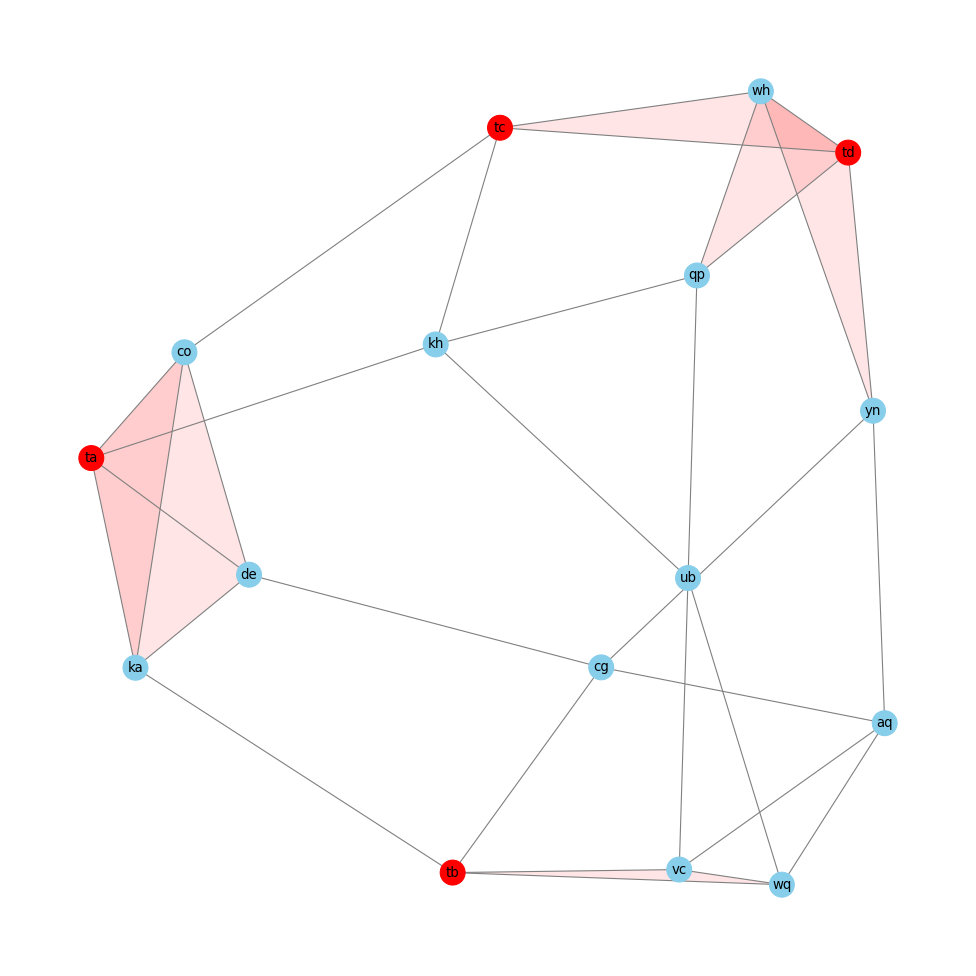

12:27:32.523:aoc2024 - INF: Test passed
12:27:32.525:aoc2024 - INF: All tests passed!


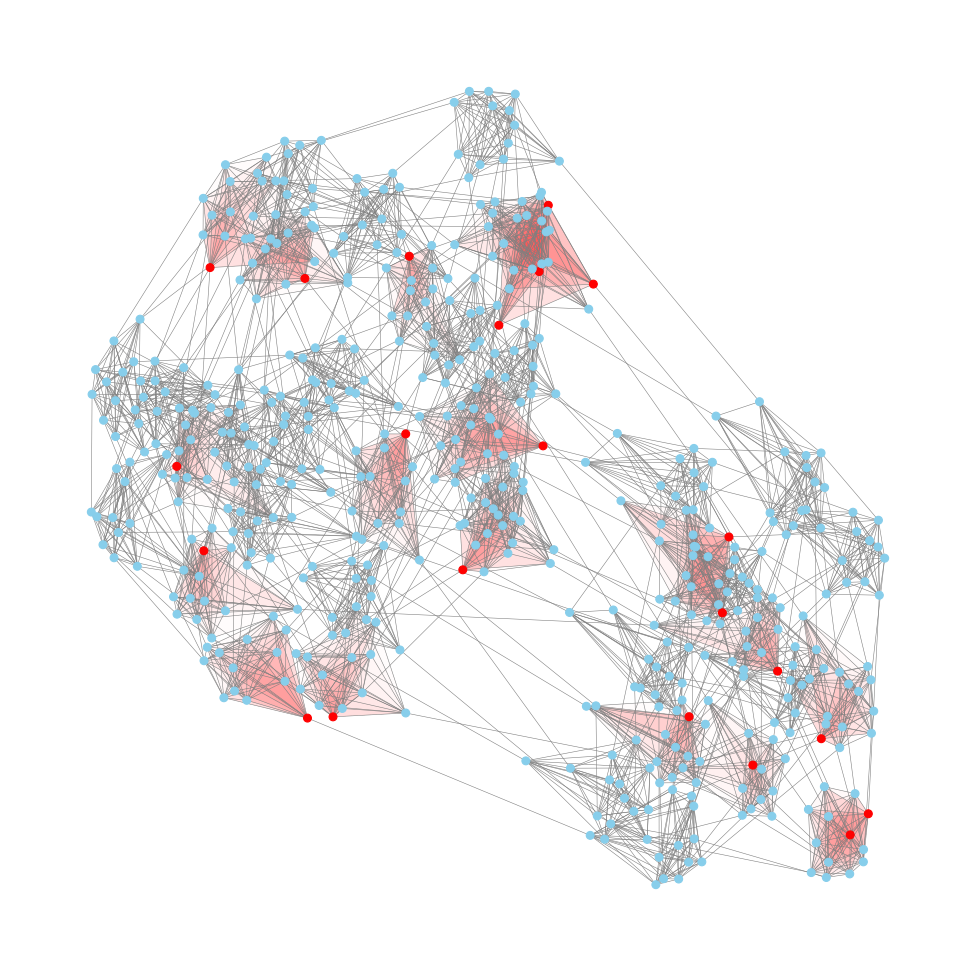

12:27:35.659:aoc2024 - INF: Part 1 soln=1330


CPU times: user 3.19 s, sys: 39.3 ms, total: 3.23 s
Wall time: 3.31 s


In [14]:
%%time
sample_inputs = []
sample_inputs.append("""
kh-tc
qp-kh
de-cg
ka-co
yn-aq
qp-ub
cg-tb
vc-aq
tb-ka
wh-tc
yn-cg
kh-ub
ta-co
de-co
tc-td
tb-wq
wh-td
ta-ka
td-qp
aq-cg
wq-ub
ub-vc
de-ta
wq-aq
wq-vc
wh-yn
ka-de
kh-ta
co-tc
wh-qp
tb-vc
td-yn""")
sample_answers = [7]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part1(curr_input.splitlines(), real=False), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

logger.setLevel(logging.INFO)
soln = solve_part1(input_data)
logger.info(f"Part 1 soln={soln}")

### Day 23 Part 2

We want to find the largest set of computers that are all connected to each other. I.e. the largest clique we can find.

The password to get into the LAN party is the name of every computer at the LAN party, sorted alphabetically, then joined together with commas.

**What is the password to get into the LAN party?**

#### Solution Overview

Easy with NetworkX! The method `find_cliques()` returns all _maximal cliques_. A maximal clique is a clique that cannot be extended by adding more nodes while remaining fully connected. So we can just retrieve all the maximal cliques, and then return the one that is largest.

Since all our nodes are just strings, concatenating the sorted list of nodes is trivial.

#### Visualisation

<img src="https://aoc.just2good.co.uk/assets/images/largest-clique.png" width="480" alt="Largest Clique" />

In [15]:
def solve_part2(data, real=True):
    graph = nx.Graph()
    for line in data:
        if not line.strip():
            continue
        
        a, b = line.split("-")
        graph.add_edge(a, b)
        
    # Find maximal cliques
    # I.e. a clique that cannot be extended by adding more nodes while remaining fully connected
    maximal_cliques = list(nx.find_cliques(graph)) # E.g. [['kh', 'ta'], ['kh', 'ub', 'qp'], ...]
    largest_clique = max(maximal_cliques, key=len) # E.g. ['ta', 'co', 'ka', 'de']
       
    logger.debug(f"{len(largest_clique)=}, {largest_clique=}")
    visualise_graph(graph, real=real, largest_clique=largest_clique)

    return ",".join(sorted(largest_clique))

12:27:45.241:aoc2024 - DBG: len(largest_clique)=4, largest_clique=['co', 'de', 'ta', 'ka']


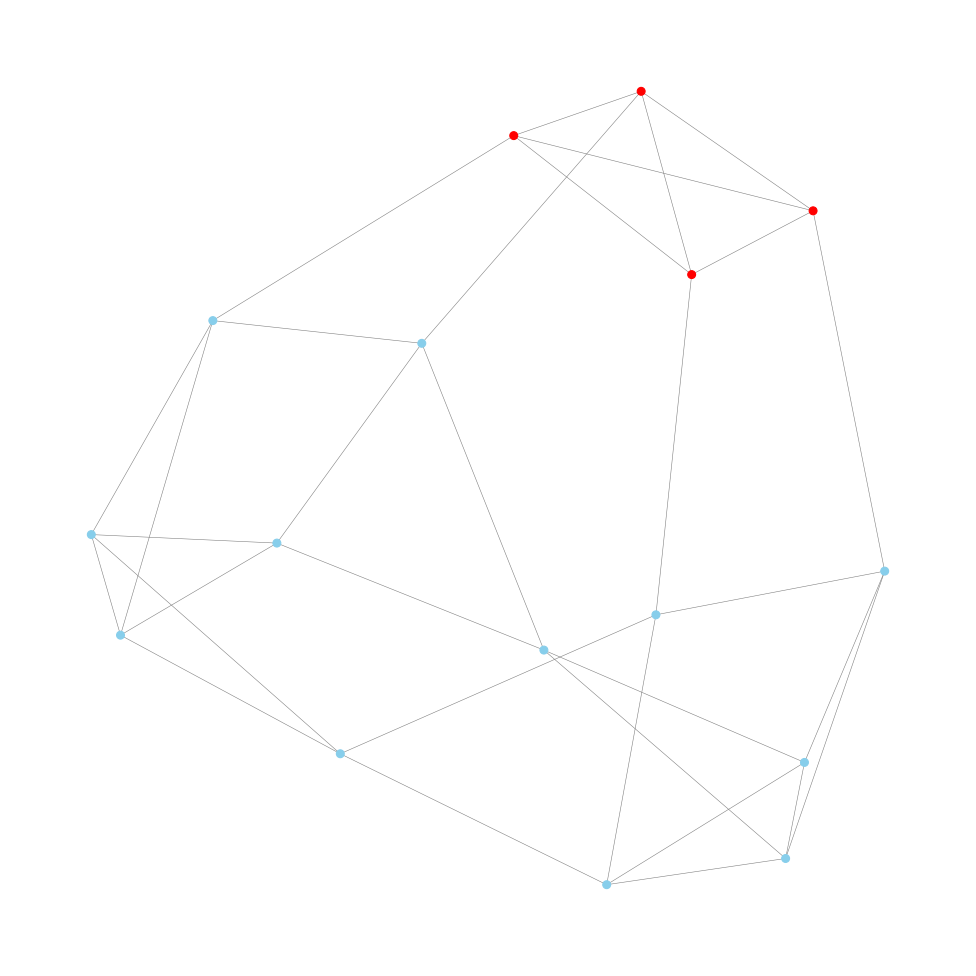

12:27:45.324:aoc2024 - INF: Test passed
12:27:45.326:aoc2024 - INF: Tests passed!


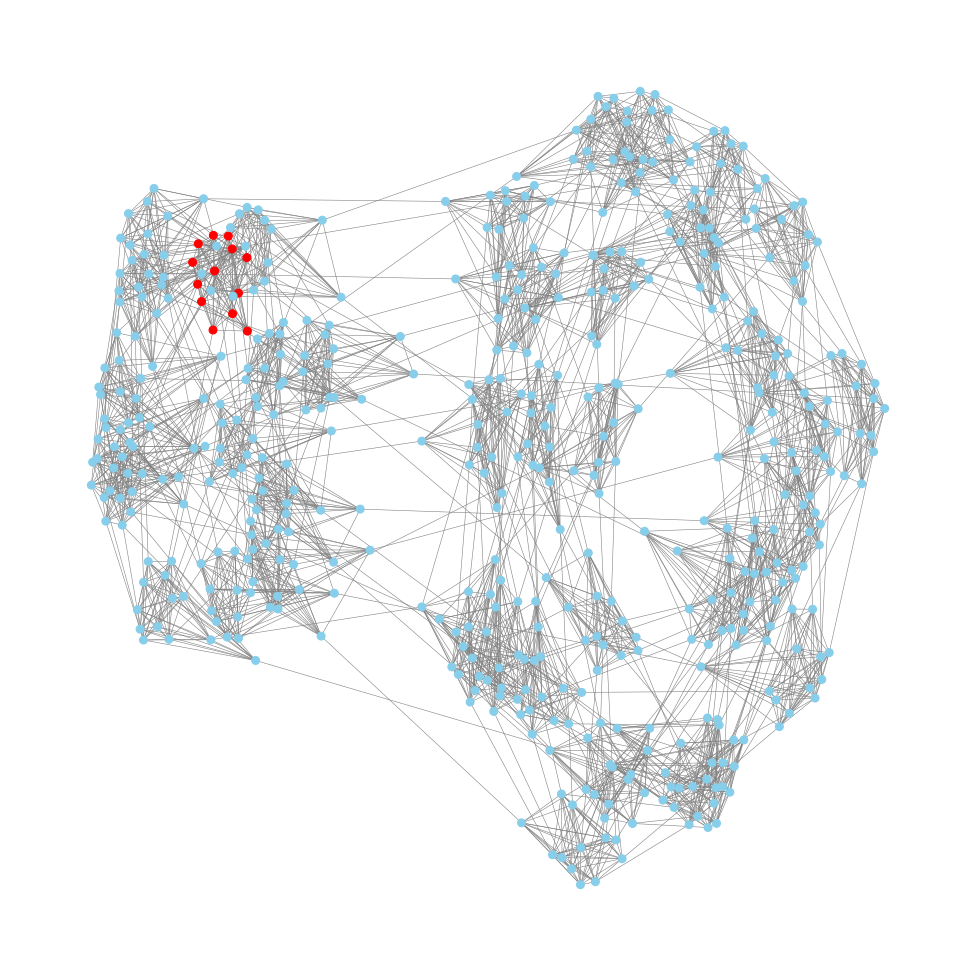

12:27:46.994:aoc2024 - INF: Part 2 soln=hl,io,ku,pk,ps,qq,sh,tx,ty,wq,xi,xj,yp


CPU times: user 1.75 s, sys: 0 ns, total: 1.75 s
Wall time: 1.75 s


In [16]:
%%time
sample_inputs = []
sample_inputs.append("""
kh-tc
qp-kh
de-cg
ka-co
yn-aq
qp-ub
cg-tb
vc-aq
tb-ka
wh-tc
yn-cg
kh-ub
ta-co
de-co
tc-td
tb-wq
wh-td
ta-ka
td-qp
aq-cg
wq-ub
ub-vc
de-ta
wq-aq
wq-vc
wh-yn
ka-de
kh-ta
co-tc
wh-qp
tb-vc
td-yn""")
sample_answers = ["co,de,ka,ta"]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part2(curr_input.splitlines()), curr_ans) # test with sample data
    logger.info("Test passed")    

logger.info("Tests passed!")

logger.setLevel(logging.INFO)
soln = solve_part2(input_data)
logger.info(f"Part 2 soln={soln}")

---
## Day 24: Crossed Wires

In [17]:
DAY = "24" # replace with actual number (without leading digit)
show_day_link(DAY)

#### See [Day 24](https://adventofcode.com/2024/day/24).

In [18]:
d_name = "d" + str(DAY).zfill(2) # e.g. d01
script_name = "aoc" + str(YEAR) + d_name # e.g. aoc2024d01
locations = dc.get_locations(d_name)
logger.setLevel(logging.DEBUG)

# Retrieve input and store in local file
try:
    write_puzzle_input_file(YEAR, DAY, locations)
    with open(locations.input_file, mode="rt") as f:
        input_data = f.read()

    logger.info("Input data:\n%s", dc.top_and_tail(input_data))
except ValueError as e:
    logger.error(e)

12:27:56.918:aoc2024 - DBG: input.txt already exists
12:27:56.923:aoc2024 - INF: Input data:
x00: 1
x01: 0
x02: 0
x03: 1
x04: 1
x05: 0
x06: 0
x07: 0
x08: 0
x09: 0
x10: 0
x11: 1
x12: 0
x13: 1
x14: 1
x15: 1
x16: 1
x17: 0
x18: 0
x19: 1
x20: 0
x21: 0
x22: 1
x23: 1
x24: 1
x25: 0
x26: 1
x27: 1
x28: 0
x29: 1
x30: 0
x31: 1
x32: 0
x33: 1
x34: 0
x35: 1
x36: 1
x37: 0
x38: 1
x39: 1
x40: 1
x41: 1
x42: 0
x43: 1
x44: 1
y00: 1
y01: 0
y02: 0
y03: 1
y04: 1
y05: 1
y06: 0
y07: 0
y08: 0
y09: 1
y10: 0
y11: 0
y12: 0
y13: 1
y14: 1
y15: 0
y16: 1
y17: 0
y18: 1
y19: 1
y20: 1
y21: 0
y22: 0
y23: 1
y24: 1
y25: 1
y26: 0
y27: 1
y28: 0
y29: 1
y30: 0
y31: 0
y32: 0
y33: 1
y34: 1
y35: 1
y36: 1
y37: 0
y38: 0
y39: 0
y40: 0
y41: 1
y42: 0
y43: 1
y44: 1

x36 AND y36 -> rpc
swn OR jrk -> kfm
x36 XOR y36 -> mvv
y28 XOR x28 -> rnh
bfp OR wqc -> rgb
tkc OR mfm -> brs
kmb XOR gfj -> z16
x25 AND y25 -> mdt
mpp AND hfd -> gjp
dhd AND mvb -> vrf
y14 XOR x14 -> qvt
shc OR bkk -> wvr
x29 AND y29 -> gdn
x11 XOR y11 -> jpp
rws OR fts -> 

### Day 24 Part 1

We have a malfunctioning device that uses logic gates.

- We have wires which act as inputs to gates, and outputs from gates.
- We have standard rules for AND, OR, and XOR gates.
- Gates always have two inputs and one output.
- But gates wait until both inputs are received before producing output.
- There are no loops; once the output for a gate is set, it will not change unless the whole system is reset. (TFFT.)
- Each wire is connected to at most one gate output, but can be connected to many gate inputs. E.g.

```text
    tgd ---> +=====+    
             | XOR | ---> z01
    rvg ---> +=====+

    tgd ---> +=====+    
             | XOR | ---> z12
    rvg ---> +=====+
```

- Because gates wait for input, some wires need to start with a value (as inputs to the entire system).

Example data:

```text
x00: 1
x01: 1
x02: 1
y00: 0
y01: 1
y02: 0

x00 AND y00 -> z00
x01 XOR y01 -> z01
x02 OR y02 -> z02
```

- The first section is the fixed input values.
- The second section lists the gates and wires connected to them.

**Simulate the system of gates and wires. What decimal number does it output on the wires starting with z?**

#### Solution Approach

The `z` wires represent the output of the system that we care about. Each wire will be either 1 or 0, and the concatenation will represent a decimal number.

First we'll process the input data.

1. For the wires block, we just create a dict item for each line: `wire: value`
1. For the connections block, note that we can have same connection resulting in more than one wire. E.g. in one of our examples:

```text
tgd XOR rvg -> z01
...
tgd XOR rvg -> z12
```

So, we'll store each line as a dict of `(left, right, gate): set(wires)`. We'll use a `defaultdict(set)` such that we can just add wires to the set without having to worry about creating the set the first time we see a given connection.

To process:

- We need to keep processing the gates until all outputs are set. So we loop for as long as there is a gate output that doesn't yet exist in the `wires` dictionary.
- Inside the loop:
  - If we're missing any wire value, we skip to the next connection.
  - Otherwise, we simply perform the AND / OR / XOR logic, and store the value in the `wires` dictionary. If the output doesn't yet exist in the `wires` dictionary, then we add it.
  - Once all outputs have corresponding `wires`, then all values have been set. Then we can exit the loop.
- To output the required decimal number:
  - First filter all the wires to those that begin with `z`.
  - The concatenate the binary digits, but in z-order. E.g. `z01`, then `z01`, etc.
  - Then, reverse the resulting string, since we're old the first `z` wire is the least significant bit (LSB).
  - Finally, convert the binary string to its decimal value and return


In [21]:
def process_input(data: str) -> tuple[dict[str, int], dict[tuple, set]]:
    """ Input data is in two blocks:
    1. Values for wires
    2. A left wire, a gate, a right wire, and the output wire

    Returns: wires, connections
    """
    gate_regex = re.compile(r"(\w+) (XOR|OR|AND) (\w+) -> (\w+)")
    wires: dict[str,int] = dict()
    operations: dict[tuple, set[str]] = defaultdict(set) # We can have more than one output for a connection
    
    wires_lines, connections_lines = [block.splitlines() for block in data.split("\n\n")]
    
    wires = {wire: int(value) for wire, value in (line.split(": ") for line in wires_lines)}
    logger.debug(f"{wires=}")
    logger.debug(f"{connections_lines=}")
    
    for line in connections_lines:
        match = gate_regex.match(line)
        if not match:
            assert False, f"Failed to match gate: {line}"
        
        left, gate, right, output = match.groups()
        operations[(left, right, gate)].add(output)
    
    return wires, operations

def calculate_output_for_gate(left, right, gate) -> int:
    match gate:
        case "AND":
            return left & right
        case "OR":
            return left | right
        case "XOR":
            return left ^ right
        case _:
            assert False, f"Unknown gate: {gate}"

def process_all_gates(wires: dict[str, int], connections: dict[tuple, set]):
    # Loop for as long as we're missing an output
    while any(output not in wires for outputs in connections.values() 
                                  for output in outputs):
        
        # process each connection
        for (left, right, gate), outputs in connections.items():
            if left not in wires or right not in wires:
                continue # We can't calculate this yet. Try next connection
            
            for output in outputs:
                if output in wires:
                    continue # We already have this output; move on to next connection
                    
                wires[output] = calculate_output_for_gate(wires[left], wires[right], gate)

def get_output_for_wire_type(wires: dict[str, int], type: str):
    wires_for_type = {wire:value for wire, value in wires.items() if wire.startswith(type)}
    wires_for_type = list(sorted(wires_for_type.items(), key=lambda x: x[0])) # E.g. [('z00', 0), ('z01', 1), ...]
    
    output_as_bin_str = ("".join(str(value) for _, value in reversed(wires_for_type))) # We're told z00 is the LSB
    logger.debug(f"{type} output: {output_as_bin_str}")
    return int(output_as_bin_str, 2)    

def solve_part1(data: str):
    wires, connections = process_input(data)
    logger.debug(f"{connections=}")    
    
    process_all_gates(wires, connections)
    return get_output_for_wire_type("z")
        

In [22]:
%%time
sample_inputs = []
sample_inputs.append("""\
x00: 1
x01: 1
x02: 1
y00: 0
y01: 1
y02: 0

x00 AND y00 -> z00
x01 XOR y01 -> z01
x02 OR y02 -> z02""")
sample_inputs.append("""\
x00: 1
x01: 0
x02: 1
x03: 1
x04: 0
y00: 1
y01: 1
y02: 1
y03: 1
y04: 1

ntg XOR fgs -> mjb
y02 OR x01 -> tnw
kwq OR kpj -> z05
x00 OR x03 -> fst
tgd XOR rvg -> z01
vdt OR tnw -> bfw
bfw AND frj -> z10
ffh OR nrd -> bqk
y00 AND y03 -> djm
y03 OR y00 -> psh
bqk OR frj -> z08
tnw OR fst -> frj
gnj AND tgd -> z11
bfw XOR mjb -> z00
x03 OR x00 -> vdt
gnj AND wpb -> z02
x04 AND y00 -> kjc
djm OR pbm -> qhw
nrd AND vdt -> hwm
kjc AND fst -> rvg
y04 OR y02 -> fgs
y01 AND x02 -> pbm
ntg OR kjc -> kwq
psh XOR fgs -> tgd
qhw XOR tgd -> z09
pbm OR djm -> kpj
x03 XOR y03 -> ffh
x00 XOR y04 -> ntg
bfw OR bqk -> z06
nrd XOR fgs -> wpb
frj XOR qhw -> z04
bqk OR frj -> z07
y03 OR x01 -> nrd
hwm AND bqk -> z03
tgd XOR rvg -> z12
tnw OR pbm -> gnj""")
sample_answers = [4, 2024]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part1(curr_input), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

logger.setLevel(logging.INFO)
soln = solve_part1(input_data)
logger.info(f"Part 1 soln={soln}")

12:33:15.576:aoc2024 - DBG: wires={'x00': 1, 'x01': 1, 'x02': 1, 'y00': 0, 'y01': 1, 'y02': 0}
12:33:15.578:aoc2024 - DBG: connections_lines=['x00 AND y00 -> z00', 'x01 XOR y01 -> z01', 'x02 OR y02 -> z02']
12:33:15.579:aoc2024 - DBG: connections=defaultdict(<class 'set'>, {('x00', 'y00', 'AND'): {'z00'}, ('x01', 'y01', 'XOR'): {'z01'}, ('x02', 'y02', 'OR'): {'z02'}})
12:33:15.579:aoc2024 - DBG: output_as_bin_str='100'
12:33:15.580:aoc2024 - INF: Test passed
12:33:15.580:aoc2024 - DBG: wires={'x00': 1, 'x01': 0, 'x02': 1, 'x03': 1, 'x04': 0, 'y00': 1, 'y01': 1, 'y02': 1, 'y03': 1, 'y04': 1}
12:33:15.581:aoc2024 - DBG: connections_lines=['ntg XOR fgs -> mjb', 'y02 OR x01 -> tnw', 'kwq OR kpj -> z05', 'x00 OR x03 -> fst', 'tgd XOR rvg -> z01', 'vdt OR tnw -> bfw', 'bfw AND frj -> z10', 'ffh OR nrd -> bqk', 'y00 AND y03 -> djm', 'y03 OR y00 -> psh', 'bqk OR frj -> z08', 'tnw OR fst -> frj', 'gnj AND tgd -> z11', 'bfw XOR mjb -> z00', 'x03 OR x00 -> vdt', 'gnj AND wpb -> z02', 'x04 AND y00

CPU times: user 2.01 ms, sys: 9.44 ms, total: 11.5 ms
Wall time: 10.1 ms


### Day 24 Part 2

The system we're simultating is **trying to _add_ two binary numbers: x and y**. It:

- Treats the bits on wires starting with `x` as one binary number
- Treats the bits on wires starting with `y` as a second binary number
- Then attempts to add these together, producing the binary output on `z`.

Thus, for any combination of bits on wires starting with `x` and wires starting with `y`, the sum of the two numbers those bits represent should be produced as a binary number on the wires starting with `z`.

E.g.

```text
x00: 1               +        y00: 1
x01: 1                        y01: 0
x02: 0                        y02: 1
x03: 1  1011 = 11             y03: 1  1101 = 13

                     =  z00: 0
                        z01: 0
                        z02: 0
                        z03: 1
                        z04: 1  11000 = 24
 ```

But our system is damaged. There are four pairs of gates where the output wires have been swapped. Correcting these two swaps results in this system that works as intended for any set of initial values on wires that start with x or y.

E.g. we might need to do swaps like this:

<img src="https://aoc.just2good.co.uk/assets/images/gate-pairs.png" width="420" alt="Gate swaps" />

E.g. from:

```text
x00: 0
x01: 1
x02: 0
x03: 1
x04: 0
x05: 1
y00: 0
y01: 0
y02: 1
y03: 1
y04: 0
y05: 1

* x00 AND y00 -> z05
$ x01 AND y01 -> z02
$ x02 AND y02 -> z01
  x03 AND y03 -> z03
  x04 AND y04 -> z04
* x05 AND y05 -> z00
```

to:

```text
* x00 AND y00 -> z00
$ x01 AND y01 -> z01
$ x02 AND y02 -> z02
  x03 AND y03 -> z03
  x04 AND y04 -> z04
* x05 AND y05 -> z05
```

We need to record the swapped output wires of the four pairs, in alphanumeric order. I.e. 8 wires. The gates that need their outputs swapped could be anywhere, not just attached to a wire starting with z.

**What do you get if you sort the names of the eight wires involved in a swap and then join those names with commas?**

We can observe that we have:

- A value `x`, represented as many `x` wires.
- A value `y`, represented as many `y` wires.
- A value `z`, represented as many `z` wires.
- For any combination of bits on wires starting with x and wires starting with y, the sum of the two numbers those bits represent should be produced as a binary number on the wires starting with z.
- A series of functions applied between `x` and `y` wires, using only `AND / OR / XOR` to output to `z` wires. These functions are simulating binary addition.

We could just try all combinations of four swaps, and then test that the outputs add the inputs, as required. Our input data has about 200 rows of gate operations. So, to choose any 8 wires from 200 operations is a "200 Choose 8" problem:

```text
200C8 = 200! / (8! * 192!)
      = 55098960190400
```

This is too big to brute force!

#### Solution Approach

Instead, we need to understand what the input data is telling us. The input data contains many AND, OR and XOR instructions, where each instruction takes two input values and produces an output value. Many of these outputs are intermediate inputs to subsequent instructions.

It turns out that these instructions are demonstrating a _ripple adder circuit_. A ripple carry adder is a series of 1-bit adders, where each adder:

- Takes two 1 bit inputs (let's call them `x` and `y`) and a carry input (C<sub>in</sub>).
- Generates a single _sum_ output.
- Generates a single carry output (C<sub>out</sub>).

So we can think of an adder as taking 3 inputs and having two outputs. One output is the sum of binary digits for this _column_, and the other output is the carry-over digit, to be added to the next column.

For example, we can add two 1-bit numbers as shown below. The initial input carry is 0. But, of course, 1+1 results in a 0 in binary, with 1 carried to the next column.

```text
Carry         1     0
Input x          1
Input y     +    1
            -------
Result        1  0
```

A single adder can be depicted like this:

<img src="https://aoc.just2good.co.uk/assets/images/1-bit-fa.png" width="280px" alt="Full Adder" />

So we can implement a multi-bit ripple adder like this:

<img src="https://aoc.just2good.co.uk/assets/images/ripple-adder.png" width="480px" alt="Ripple Adder" />

And this is how we can generate a single 5-bit number from the addition of two 4-bit numbers.

How do we relate this to the problem? Well, to implement each adder in the ripple carry adder, we need to combine a number of gates. There are a couple of ways this can be done. So let's actually visualise what our instructions are doing, and then we'll know...

#### Visualisation

In [ ]:
op_by_ouput = {}

def get_code_for_wire(wire: str) -> str:
    """ Generate a string representation of the logical operations needed 
    to compute the value of a given wire. Uses recursion to handle dependencies between operations. """
    
    # Base case - exit once we have a wire that requires no further op to calculate
    if wire not in op_by_ouput: # I.e. this wire is not the output of an operation
        return wire
    
    # Otherwise, get the operation required to output to this wire
    left, right, gate = op_by_ouput[wire]
    
    # If the left or right inputs are themselves the result of other operations, 
    # these recursive calls will generate the code for those operations first.
    # Sort so that (a & b) and (b & a) are the same.
    left_code, right_code = sorted((get_code_for_wire(left), get_code_for_wire(right)))
    
    match gate:
        case "AND": gate_code = "&"
        case "OR": gate_code = "|"
        case "XOR": gate_code = "^"

    return f"({left_code} {gate_code} {right_code})"
        
def create_vis(wires: dict):
    """ Creates a visual representation of a circuit using Graphviz. """
    
    dot = graphviz.Digraph(format='png', engine='dot')
    
    # Define gate shapes, colors, and output styles for different types of gate
    gate_styles = {
        "AND": {"shape": "invtrapezium", "fillcolor": "lightblue"},
        "OR": {"shape": "invtriangle", "fillcolor": "lightgreen"},
        "XOR": {"shape": "box", "fillcolor": "lightyellow"},
    }
    
    # Define styles for output nodes based on their initial character
    output_styles = {
        "z": {"fillcolor": "black", "fontcolor": "white"},
        "x": {"fillcolor": "blue", "fontcolor": "white"},
        "y": {"fillcolor": "red", "fontcolor": "white"},
    }
    
    # Add operand nodes (inputs/outputs) as circles
    for wire in wires:
        style = output_styles.get(wire[0], {})  # Get style based on first character
        dot.node(wire, wire, shape='circle', style='filled', **style)

    # Add operations as nodes (gates as boxes)
    for output in op_by_ouput:
        left, right, gate = op_by_ouput[output]

        # Create gate node
        gate_label = f'{gate}'
        gate_name = f'{left}_{right}_{gate}'  # Unique gate name
        gate_style = gate_styles.get(gate, {"shape": "box"})
        dot.node(gate_name, gate_label, style='filled', **gate_style)  # Box shape for operators

        # Connect inputs to gate
        left_style = output_styles.get(left[0], {}) 
        right_style = output_styles.get(right[0], {}) 
        dot.node(left, left, shape='circle', style='filled', **left_style) 
        dot.node(right, right, shape='circle', style='filled', **right_style) 
        dot.edge(left, gate_name)
        dot.edge(right, gate_name)

        # Connect gate to output
        output_style = output_styles.get(output[0], {}) 
        dot.node(output, output, shape='circle', style='filled', **output_style)
        dot.edge(gate_name, output)

    # Render the graph to a file
    output_path = 'adder_operations'
    dot.render(f"{locations.output_dir}/{output_path}")  # Saves the output as a png
    display(Image(f"{locations.output_dir}/{output_path}.png"))

def visualise_operations(data: str):
    wires, operations = process_input(data)
    for (left, right, gate), outputs in operations.items():
        for output in outputs:
            op_by_ouput[output] = (left, right, gate)
    
    create_vis(wires) # Create a graphical representation
    
    # View text-based representation of all wires
    for output in sorted(op_by_ouput.keys()):
        print(f"{output} = {get_code_for_wire(output)}")
    
soln = visualise_operations(input_data)

If we zoom in, we can see how our gates are being combined to create a ripple adder.

<img src="https://aoc.just2good.co.uk/assets/images/2024d24_circuit_vis.png" width="400" alt="Ripple adder gates" />

We can see that:

`z00 = x00 ^ y00`

This makes sense, since if we add two bits `x` and `y`, the _sum_ bit will be 1 if `x` or `y` are 1, but not both. So, the very definition of `XOR`. 

Let's recap how binary addition works. Let's add `101` (5) and `111` (7). The result is `1010` (12):

```text
Column           8 4 2 1
------------------------
Carry             1 1 1 0
Input x            1 0 1    (5)
Input y   +        1 1 1    (7)
          --------------
Result           1 1 0 0    (12)
```

But what about the _carry bit_? The _carry bit_ will be 1 only when both `x` and `y` are 1. And we can see this implemented in our instructions: for each pair `x` and `y`, we see that there is an `AND` gate, and this `AND` gate is **creating the _carry bit_.** The _carry bit_ (let's call it `c00`) is stored as an intermediate value which must be then added to the next pair of numbers - `x01` and `y01`. This is achieved by taking the `XOR` of the `x01`, `y01` and then the `XOR` of the result with the carry bit. This is how we get `z01`. 

But again, we need a carry bit. Unlike the previous case, the new carry bit is created by combining the previous carry bit (`c00`) with our two bits, `x01` and `y01`. So we have three inputs, rather than two. Here, we can set the new carry bit `c01` in one of two ways:

- `(x01 ^ y01) & c01` - two values are true including carry bit - carry over required
- `x01 & y01` - two values are true excluding carry bit - carry over required

So we need an `OR` operation for these two cases, i.e.

`((x01 ^ y01) & c01) | (x01 & y01)`

This sequence then repeats.

If we look at the printed output, there are some obvious issues. In my data, I can immediately see issues with `z06`, `z11` and `z31`. So these are going to be part of the answer.  But what else?

Here's how we can solve it:

- We can run verifications against every `z` output, and check it contains the expected set of rules for a ripple adder.
- 

In [79]:
op_by_ouput = {}

def get_wire_name(char, num):
    """ Return the wire name, given prefix and digit.
    E.g. z + 1 -> z01 
    """
    return char + str(num).zfill(2)

def verify_output_wire(wire, num):
    """ 
    Verify that this wire is created from the correct set of instructions.
    
    Inputs:
    - Wire name
    - Bit value, i.e. bit column
    """
    if wire not in op_by_ouput: 
        return False
    
    left, right, gate = op_by_ouput[wire]
    if gate != "XOR": # z wires are always made by XOR of inputs
        return False
    if num == 0: 
        return sorted([left, right]) == ["x00", "y00"]
    
    # Otherwise recurse
    # Check that left is an intermediate XOR and right is a carry bit
    # Or the other way around
    return verify_intermediate_xor(left, num) and verify_carry_bit(right, num) or \
           verify_intermediate_xor(right, num) and verify_carry_bit(left, num)

def verify_intermediate_xor(wire, num):
    if wire not in op_by_ouput: 
        return False
    
    left, right, gate = op_by_ouput[wire]
    if gate != "XOR": # Operator must be XOR
        return False
    return sorted([left, right]) == [get_wire_name("x", num), get_wire_name("y", num)]

def verify_carry_bit(wire, num):
    if wire not in op_by_ouput: 
        return False
    
    left, right, gate = op_by_ouput[wire]
    if num == 1:
        if gate != "AND": 
            return False
        
        return sorted([left, right]) == ["x00", "y00"]
    
    if gate != "OR": 
        return False
    
    return verify_direct_carry(left, num - 1) and verify_recarry(right, num - 1) or \
           verify_direct_carry(right, num - 1) and verify_recarry(left, num - 1)

def verify_direct_carry(wire, num):
    if wire not in op_by_ouput: 
        return False
    
    left, right, gate = op_by_ouput[wire]
    if gate != "AND": 
        return False
    
    return sorted([left, right]) == [get_wire_name("x", num), get_wire_name("y", num)]

def verify_recarry(wire, num):
    if wire not in op_by_ouput: 
        return False
    
    left, right, gate = op_by_ouput[wire]
    if gate != "AND": 
        return False
    
    return verify_intermediate_xor(left, num) and verify_carry_bit(right, num) or \
           verify_intermediate_xor(right, num) and verify_carry_bit(left, num)

def verify(num):
    """ Verify a z value has been properly created. """
    return verify_output_wire(get_wire_name("z", num), num)

def find_first_fail():
    i = 0
    while True:
        if not verify(i): 
            break
        i += 1
    
    return i

def solve_part2(data: str, swaps_required=4):
    _, operations = process_input(data)
    for (left, right, gate), outputs in operations.items():
        for output in outputs:
            op_by_ouput[output] = (left, right, gate)
    
    swaps = []
    for _ in tqdm(range(swaps_required)):
        first_fail = find_first_fail() # E.g. 6 for z06
        for op_x in op_by_ouput: # E.g. fkp
            for op_y in op_by_ouput: # E.g. z06
                if op_x == op_y: 
                    continue
                
                # Swap these two operations and test if we get more successful verifications
                op_by_ouput[op_x], op_by_ouput[op_y] = op_by_ouput[op_y], op_by_ouput[op_x]
                new_first_fail = find_first_fail()
                if new_first_fail > first_fail:
                    first_fail = new_first_fail
                    break # We've swapped this op_x and op_y. Move on to next op_x.
                
                # Unsuccessful, so swap back
                op_by_ouput[op_x], op_by_ouput[op_y] = op_by_ouput[op_y], op_by_ouput[op_x]
            else:
                continue
            break
        swaps += [op_x, op_y]

    return ",".join(sorted(swaps))


In [ ]:
%%time
logger.setLevel(logging.INFO)
soln = solve_part2(input_data)
logger.info(f"Part 2 soln={soln}")

---
## Day 25: Code Chronicle

In [ ]:
DAY = "25" # replace with actual number (without leading digit)
show_day_link(DAY)

In [ ]:
d_name = "d" + str(DAY).zfill(2) # e.g. d01
script_name = "aoc" + str(YEAR) + d_name # e.g. aoc2024d01
locations = dc.get_locations(d_name)
logger.setLevel(logging.DEBUG)

# Retrieve input and store in local file
try:
    write_puzzle_input_file(YEAR, DAY, locations)
    with open(locations.input_file, mode="rt") as f:
        input_data = f.read()

    logger.info("Input data:\n%s", dc.top_and_tail(input_data))
except ValueError as e:
    logger.error(e)

### Day 25 Part 1

Our input is the schematics of every lock and every key. E.g.

```text
#####
.####
.####
.####
.#.#.
.#...
.....

#####
##.##
.#.##
...##
...#.
...#.
.....

.....
#....
#....
#...#
#.#.#
#.###
#####

.....
.....
#.#..
###..
###.#
###.#
#####

.....
.....
.....
#....
#.#..
#.#.#
#####
```

- Locks have top row filled with `#` and bottom row empty `.`.
- Keys have top row empty `.` and bottom row filled.
- We can represent locks as a list of column heights, e.g. `0,5,3,4,3`.

**How many unique lock/key pairs fit together without overlapping in any column?**

In [254]:
def check_lock_and_key(lock: list[int], key: list[int], height) -> bool:
    """ Check if a key can fit into a lock. 
    True if the heights of all matching lock / key columns don't exceed the lock height """
    for l, k in zip(lock, key):
        if l+k > height:
            return False
    
    return True

def solve_part1(data):
    BLOCK_HEIGHT = 7
    keys = set() # E.g. { (5,0,2,1,3), ... }
    locks = set() # E.g. { (0,5,3,4,3), ... }
    
    blocks = data.split("\n\n")
    for block in blocks:
        lines = block.splitlines()
        assert len(lines) == BLOCK_HEIGHT, f"Expected 7 lines, got {len(lines)}"

        if all(char == "#" for char in lines[0]): # lock
            # Transpose to cols, ignoring first line
            cols = ["".join(col) for col in zip(*lines[1:])] 
            locks.add(tuple(col.count("#") for col in cols))
        else: # key
            # Transpose to cols, ignoring last line
            cols = ["".join(col) for col in zip(*lines[:-1])]
            keys.add(tuple(col.count("#") for col in cols))
            
    logger.debug(f"\n{keys=}\n{locks=}")
    
    success = 0
    for key in keys:
        for lock in locks:
            if check_lock_and_key(lock, key, BLOCK_HEIGHT-2):
                success += 1
                
    return success
    

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""\
#####
.####
.####
.####
.#.#.
.#...
.....

#####
##.##
.#.##
...##
...#.
...#.
.....

.....
#....
#....
#...#
#.#.#
#.###
#####

.....
.....
#.#..
###..
###.#
###.#
#####

.....
.....
.....
#....
#.#..
#.#.#
#####""")
sample_answers = [3]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part1(curr_input), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

logger.setLevel(logging.INFO)
soln = solve_part1(input_data)
logger.info(f"Part 1 soln={soln}")

---
## Day n: title

In [ ]:
DAY = "n" # replace with actual number (without leading digit)
show_day_link(DAY)

In [ ]:
d_name = "d" + str(DAY).zfill(2) # e.g. d01
script_name = "aoc" + str(YEAR) + d_name # e.g. aoc2024d01
locations = dc.get_locations(d_name)
logger.setLevel(logging.DEBUG)

# Retrieve input and store in local file
try:
    write_puzzle_input_file(YEAR, DAY, locations)
    with open(locations.input_file, mode="rt") as f:
        input_data = f.read().splitlines()

    logger.info("Input data:\n%s", dc.top_and_tail(input_data))
except ValueError as e:
    logger.error(e)

### Day n Part 1

Overview...

In [ ]:
def solve_part1(data):
    pass

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""abcdef""")
sample_answers = ["uvwxyz"]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part1(curr_input), curr_ans) # test with sample data
    logger.info("Test passed")

logger.info("All tests passed!")

logger.setLevel(logging.INFO)
soln = solve_part1(input_data)
logger.info(f"Part 1 soln={soln}")

### Day n Part 2

Overview...

In [ ]:
def solve_part2(data):
    pass

In [ ]:
%%time
sample_inputs = []
sample_inputs.append("""abcdef""")
sample_answers = ["uvwxyz"]

logger.setLevel(logging.DEBUG)
for curr_input, curr_ans in zip(sample_inputs, sample_answers):
    validate(solve_part2(curr_input), curr_ans) # test with sample data
    logger.info("Test passed")    

logger.info("Tests passed!")

logger.setLevel(logging.INFO)
soln = solve_part2(input_data)
logger.info(f"Part 2 soln={soln}")